In [1]:
# IV.Telecom churn dataset
#The dataset contains a dictionary to explain the variables. The data contains information on the internet usage of the customers (“internet_data.csv”), demographic detail of the customers (“customer_data.csv”), and the churn data based on tenure, plan, monthly charges etc. (“churn_data.csv”).

In [2]:
#1. From the “internet_data.csv” file, perform cross tabulation of relevant variables and test the significance of their association.

In [3]:
import researchpy as rp
import pandas as pd
data1 = pd.read_excel(r"C:\Users\Heswanth Soor\Documents\Python Scripts\APAUR\telecom churn.xlsx", sheet_name= 'internet_data ')
print(data1.shape[0])
data1.head()

7043


,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [4]:
data1.isna().any()

customerID          False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
dtype: bool

In [5]:
pd.crosstab(data1['MultipleLines'],data1['InternetService'])

InternetService,DSL,Fiber optic,No
MultipleLines,,,
No,1048,1158,1184
No phone service,682,0,0
Yes,691,1938,342


In [6]:
#from above result we can observe that customer who doesnot have a landline phone service ("no phone service") always use DSL(682/682).
#We can further Analyze the data removing this fact

In [7]:
#Removing customers who has "No Phone Service"
data2 = data1[data1['MultipleLines']!="No phone service"]
pd.crosstab(data2['MultipleLines'],data2['InternetService'])

InternetService,DSL,Fiber optic,No
MultipleLines,,,
No,1048,1158,1184
Yes,691,1938,342


In [8]:
#We can observe that the few customers doesnot have an internet connection (even who have mutiples lines of internet connectivity) so removing No interent connectivity customers
data3 = data2[data2['InternetService']!="No"]
pd.crosstab(data3['MultipleLines'],data2['InternetService'])

InternetService,DSL,Fiber optic
MultipleLines,,
No,1048,1158
Yes,691,1938


In [9]:
ctab3, chitest3, expected3 = rp.crosstab(data3['MultipleLines'],data3['InternetService'],margins = False, test = "chi-square",expected_freqs= True)

In [10]:
print(ctab3)
print(chitest3)
print(expected3)

                InternetService            
InternetService             DSL Fiber optic
MultipleLines                              
No                         1048        1158
Yes                         691        1938
                Chi-square test   results
0  Pearson Chi-square ( 1.0) =   234.5888
1                    p-value =     0.0000
2               Cramer's phi =     0.2203
                InternetService            
InternetService             DSL Fiber optic
MultipleLines                              
No                    793.42999  1412.57001
Yes                   945.57001  1683.42999


In [11]:
#From above Observation we can conclude that among the customer who have a phone service and an internet service, people using multiple lines use Fiber optic and who doesnot have multiple lines use DSL
#This can be concluded from the chi square p value and strength from Cramer's Phi

In [12]:
data4 = data1[data1['InternetService']!="No"]
data4.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [13]:
ctab4i, chitest4i, expected4i = rp.crosstab(data4['OnlineSecurity'],data4['InternetService'],margins = False, test = "chi-square",expected_freqs= True)
print(ctab4i)
print(chitest4i)
print(expected4i)

                InternetService            
InternetService             DSL Fiber optic
OnlineSecurity                             
No                         1241        2257
Yes                        1180         839
                Chi-square test   results
0  Pearson Chi-square ( 1.0) =   274.2114
1                    p-value =     0.0000
2               Cramer's phi =     0.2229
                InternetService             
InternetService             DSL  Fiber optic
OnlineSecurity                              
No                  1535.011419  1962.988581
Yes                  885.988581  1133.011419


In [14]:
#Customers who use DSL tend to include online security more compared to as that of Fiber optic

In [15]:
ctab4ii, chitest4ii, expected4ii = rp.crosstab(data4['OnlineBackup'],data4['InternetService'],margins = False, test = "chi-square",expected_freqs= True)
print(ctab4ii)
print(chitest4ii)
print(expected4ii)

                InternetService            
InternetService             DSL Fiber optic
OnlineBackup                               
No                         1335        1753
Yes                        1086        1343
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    1.2059
1                    p-value =    0.2722
2               Cramer's phi =    0.0148
                InternetService             
InternetService             DSL  Fiber optic
OnlineBackup                                
No                  1355.092985  1732.907015
Yes                 1065.907015  1363.092985


In [16]:
#There is no association between type of interent service and whether he would take online backup or not

In [17]:
#As P value is not less than 0.05 we can say that there is no association between whether customer taking online backup or not and type of internet service

In [18]:
ctab4iii, chitest4iii, expected4iii = rp.crosstab(data4['DeviceProtection'],data4['InternetService'],margins = False, test = "chi-square",expected_freqs= True)
print(ctab4iii)
print(chitest4iii)
print(expected4iii)

                 InternetService            
InternetService              DSL Fiber optic
DeviceProtection                            
No                          1356        1739
Yes                         1065        1357
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    0.0140
1                    p-value =    0.9058
2               Cramer's phi =    0.0016
                 InternetService             
InternetService              DSL  Fiber optic
DeviceProtection                             
No                   1358.164763  1736.835237
Yes                  1062.835237  1359.164763


In [19]:
#As P value is not less than 0.05 we can say that there is no association between whether customer taking device protection or not and type of internet service

In [20]:
ctab4iv, chitest4iv, expected4iv = rp.crosstab(data4['TechSupport'],data4['InternetService'],margins = False, test = "chi-square",expected_freqs= True)
print(ctab4iv)
print(chitest4iv)
print(expected4iv)

                InternetService            
InternetService             DSL Fiber optic
TechSupport                                
No                         1243        2230
Yes                        1178         866
                Chi-square test   results
0  Pearson Chi-square ( 1.0) =   249.2678
1                    p-value =     0.0000
2               Cramer's phi =     0.2126
                InternetService             
InternetService             DSL  Fiber optic
TechSupport                                 
No                  1524.040783  1948.959217
Yes                  896.959217  1147.040783


In [21]:
#Customers using fibre optic doesnot use tech support much as compared to using DSL 

In [22]:
ctab4vi, chitest4vi, expected4vi = rp.crosstab(data4['StreamingMovies'],data4['InternetService'],margins = False, test = "chi-square",expected_freqs= True)
print(ctab4vi)
print(chitest4vi)
print(expected4vi)

                InternetService            
InternetService             DSL Fiber optic
StreamingMovies                            
No                         1440        1345
Yes                         981        1751
                Chi-square test   results
0  Pearson Chi-square ( 1.0) =   139.7677
1                    p-value =     0.0000
2               Cramer's phi =     0.1592
                InternetService             
InternetService             DSL  Fiber optic
StreamingMovies                             
No                  1222.128874  1562.871126
Yes                 1198.871126  1533.128874


In [23]:
#3. 	Develop a model to predict customer churn from the “churn_data.csv”. If needed you can append variables from “internet_data.csv” and “customer_data.csv” in your model.

In [24]:
########################################################Month to month#####################################################

In [25]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)
data5 = pd.read_excel(r"C:\Users\Heswanth Soor\Documents\Python Scripts\APAUR\telecom churn.xlsx", sheet_name= 'Final sheet')
data5 = data5[data5['tenure']!=0]
data5.dropna(inplace =  True)
data5 = data5[data5['Contract']=='Month-to-month']
data5.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customer_data.gender,...,customer_data.Partner,customer_data.Dependents,internet_data (2).MultipleLines,internet_data (2).InternetService,internet_data (2).OnlineSecurity,internet_data (2).OnlineBackup,internet_data (2).DeviceProtection,internet_data (2).TechSupport,internet_data (2).StreamingTV,internet_data (2).StreamingMovies
11,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
12,8779-QRDMV,1,No,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,Male,...,No,No,No phone service,DSL,No,No,Yes,No,No,Yes
13,1066-JKSGK,1,Yes,Month-to-month,No,Mailed check,20.15,20.15,Yes,Male,...,No,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
14,8665-UTDHZ,1,No,Month-to-month,No,Electronic check,30.20,30.20,Yes,Male,...,Yes,Yes,No phone service,DSL,No,Yes,No,No,No,No
15,7310-EGVHZ,1,Yes,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No,Male,...,No,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service


In [26]:
data5.shape[0]
#11 values are removed

3875

No     57.290323
Yes    42.709677
Name: Churn, dtype: float64


<AxesSubplot:>

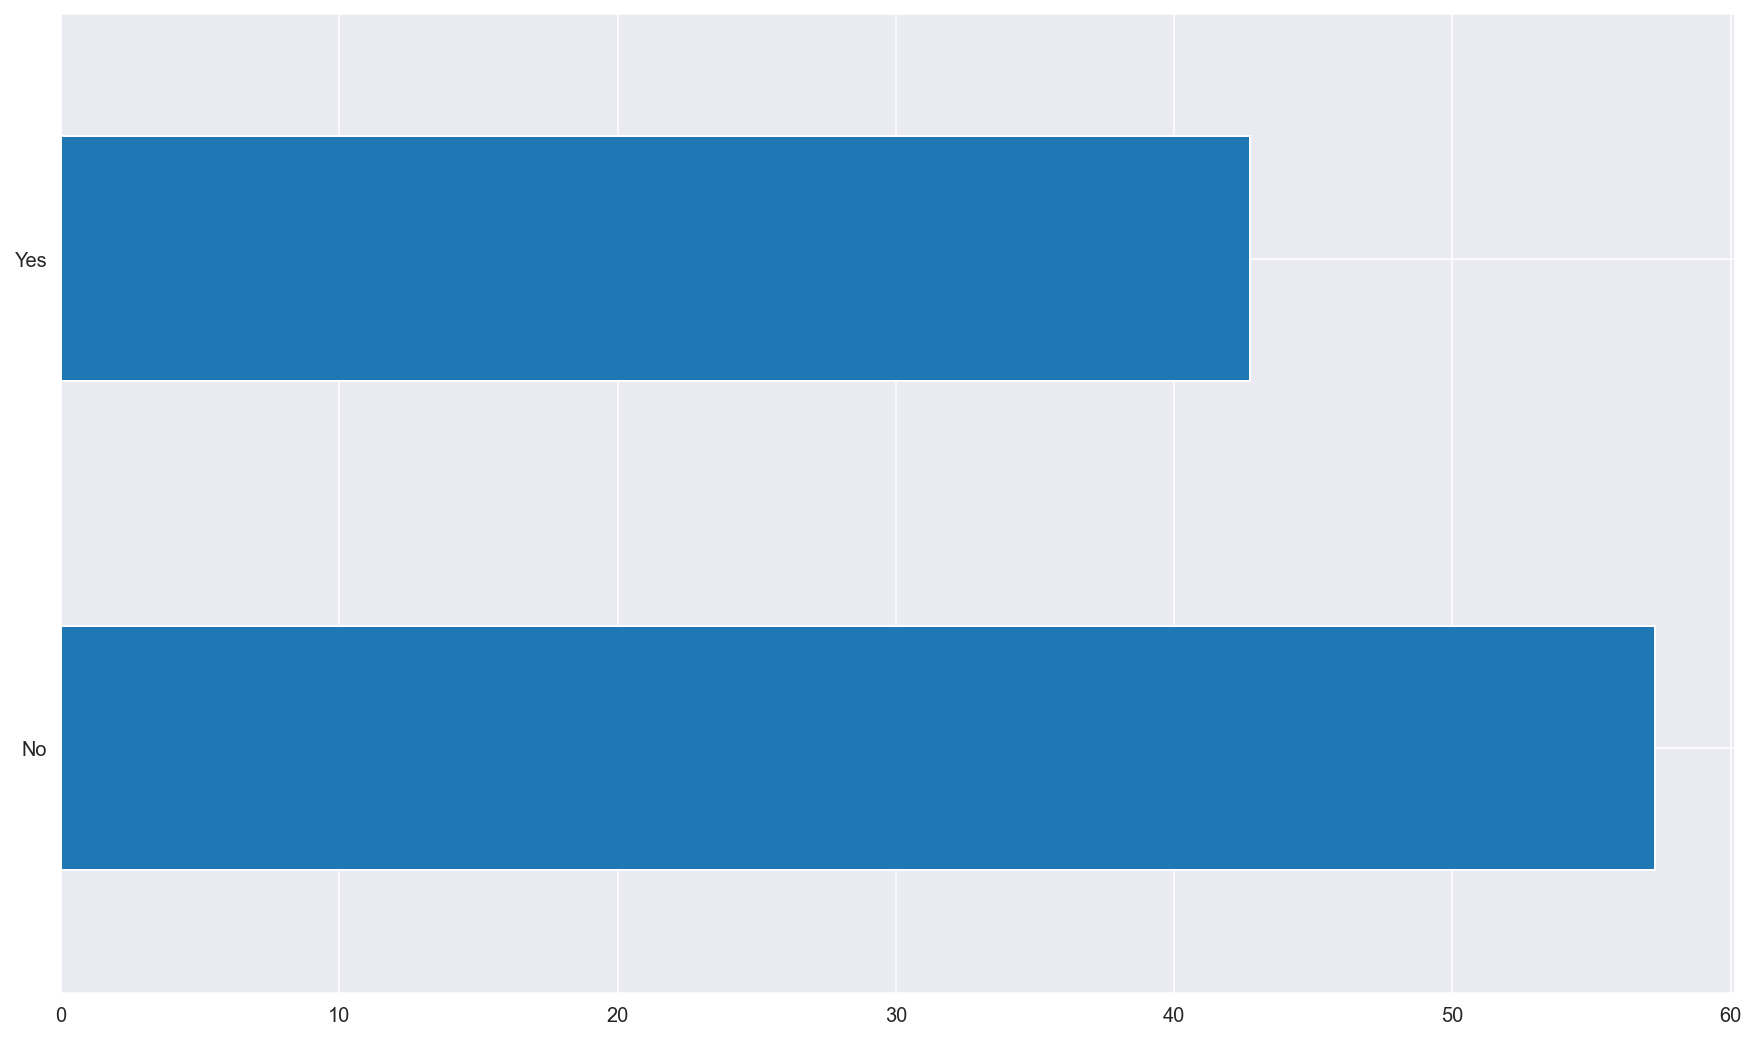

In [27]:
#Checking Balance of the data
churncol = data5['Churn'].value_counts(normalize = True)*100
print(churncol)
churncol.plot(kind = 'barh',)

In [28]:
data5.dtypes

customerID                             object
tenure                                  int64
PhoneService                           object
Contract                               object
PaperlessBilling                       object
PaymentMethod                          object
MonthlyCharges                        float64
TotalCharges                          float64
Churn                                  object
customer_data.gender                   object
customer_data.SeniorCitizen             int64
customer_data.Partner                  object
customer_data.Dependents               object
internet_data (2).MultipleLines        object
internet_data (2).InternetService      object
internet_data (2).OnlineSecurity       object
internet_data (2).OnlineBackup         object
internet_data (2).DeviceProtection     object
internet_data (2).TechSupport          object
internet_data (2).StreamingTV          object
internet_data (2).StreamingMovies      object
dtype: object

In [29]:
#Checking association between churn and other independent variables


Ttest_indResult(statistic=-12.454353532382072, pvalue=6.129694153492267e-35)


<AxesSubplot:xlabel='Churn', ylabel='tenure'>

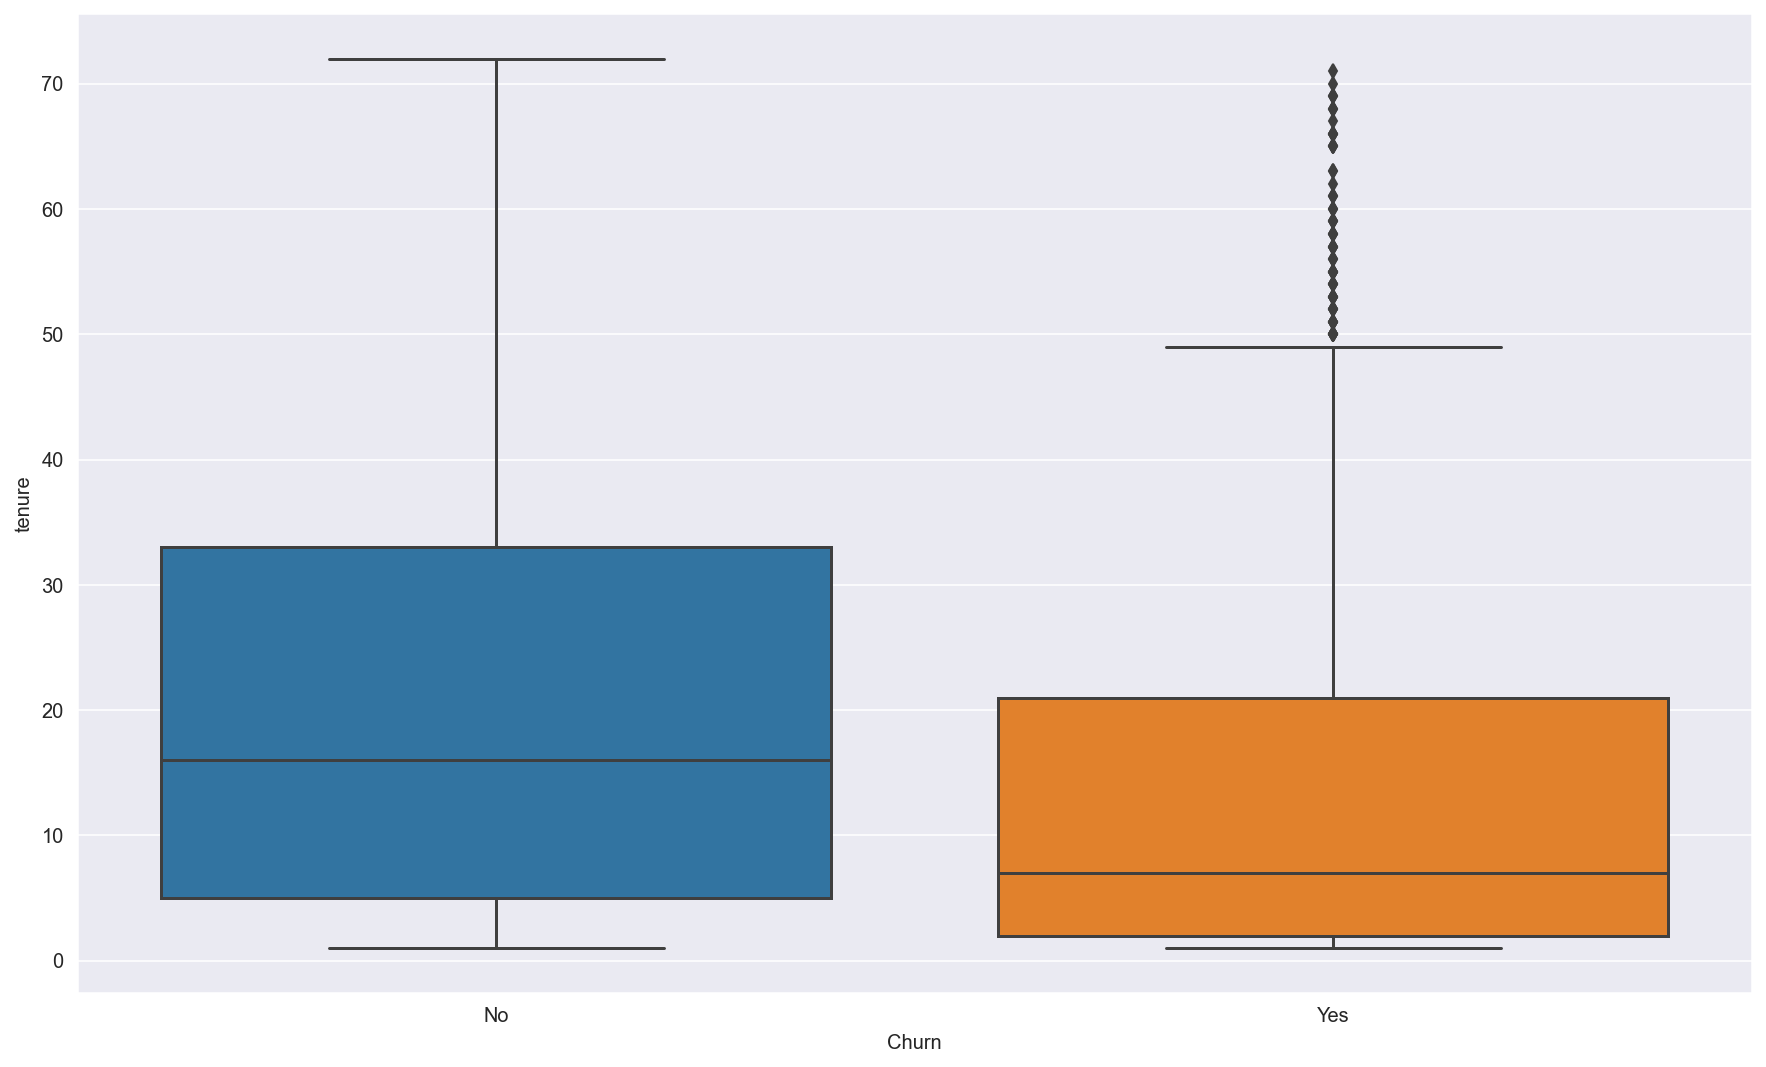

In [30]:
#Churn vs Tenure
#T-test for tenure with churn
from scipy.stats import ttest_ind
cat1 = data5[data5['Churn']=='Yes']
cat2 = data5[data5['Churn']=='No']
print(ttest_ind(cat1['tenure'], cat2['tenure']))
#There is sigificant difference
sns.boxplot(x = data5.Churn, y = data5.tenure)

Ttest_indResult(statistic=13.522461491558971, pvalue=9.560823714514386e-41)


<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

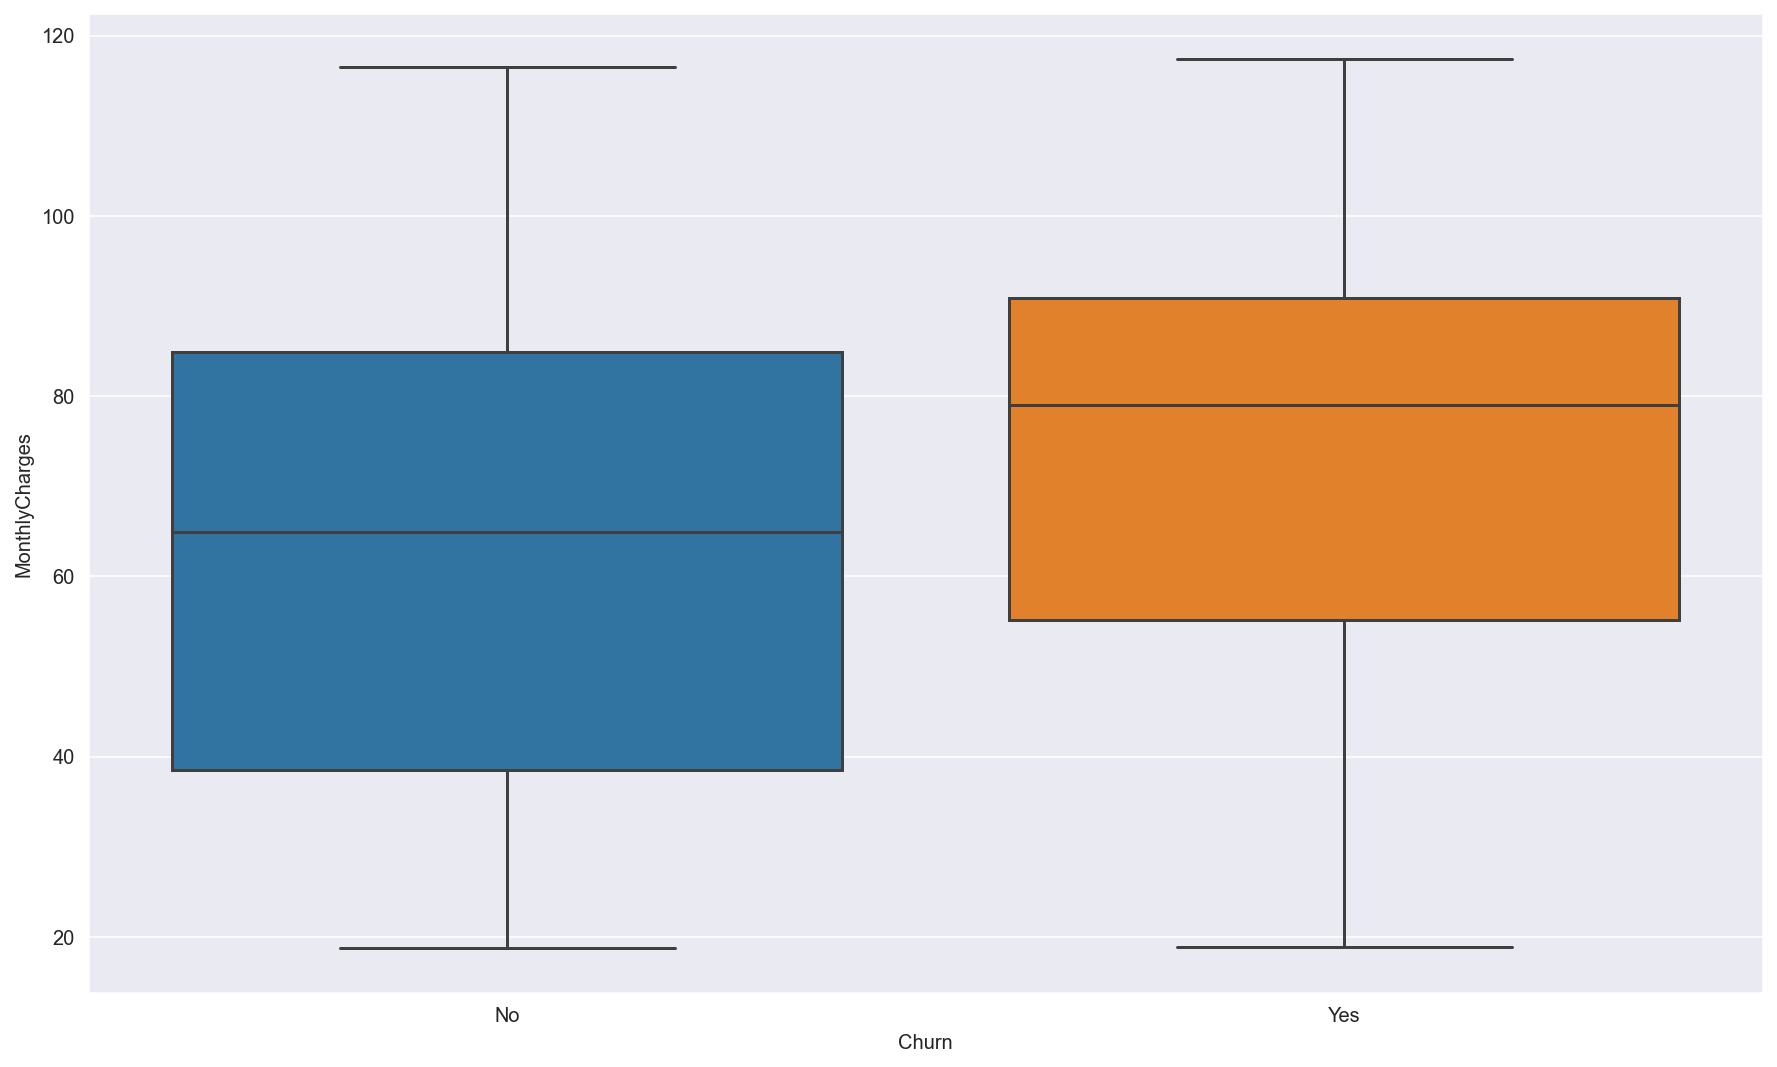

In [31]:
#Churn vsMonthly charges
#T-test for monthly charges with churn
cat1 = data5[data5['Churn']=='Yes']
cat2 = data5[data5['Churn']=='No']
print(ttest_ind(cat1['MonthlyCharges'], cat2['MonthlyCharges']))
#There is sigificant difference
sns.boxplot(x = data5.Churn, y = data5.MonthlyCharges)


             Churn      
Churn           No   Yes
PhoneService            
No             223   153
Yes           1997  1502
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    0.6932
1                    p-value =    0.4051
2               Cramer's phi =    0.0134
                    Churn             
Churn                  No          Yes
PhoneService                          
No             215.411613   160.588387
Yes           2004.588387  1494.411613


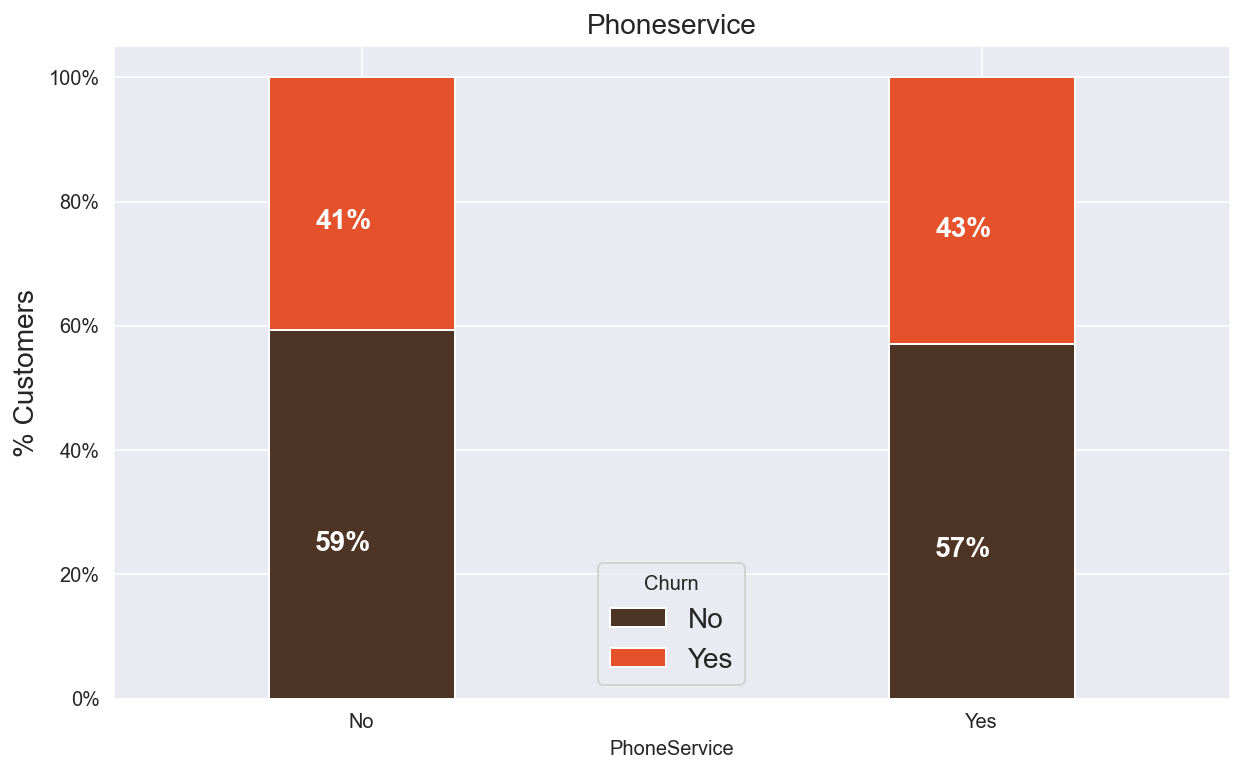

In [32]:
#Churn vs Phone service
#chisq for Phone service with churn
ctab5ii, chitest5ii, expected5ii = rp.crosstab(data5['PhoneService'],data5['Churn'],margins = False, test = "chi-square",expected_freqs= True)
print(ctab5ii)
print(chitest5ii)
print(expected5ii)


import matplotlib.ticker as mtick
colors = ['#4D3425','#E4512B']
contract_churn = data5.groupby(['PhoneService','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0, figsize = (10,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Phoneservice',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)
#There is no siginificant association between phone service and churn

                 Churn      
Churn               No   Yes
PaperlessBilling            
No                 883   406
Yes               1337  1249
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =   99.2396
1                    p-value =    0.0000
2               Cramer's phi =    0.1600
                        Churn             
Churn                      No          Yes
PaperlessBilling                          
No                 738.472258   550.527742
Yes               1481.527742  1104.472258


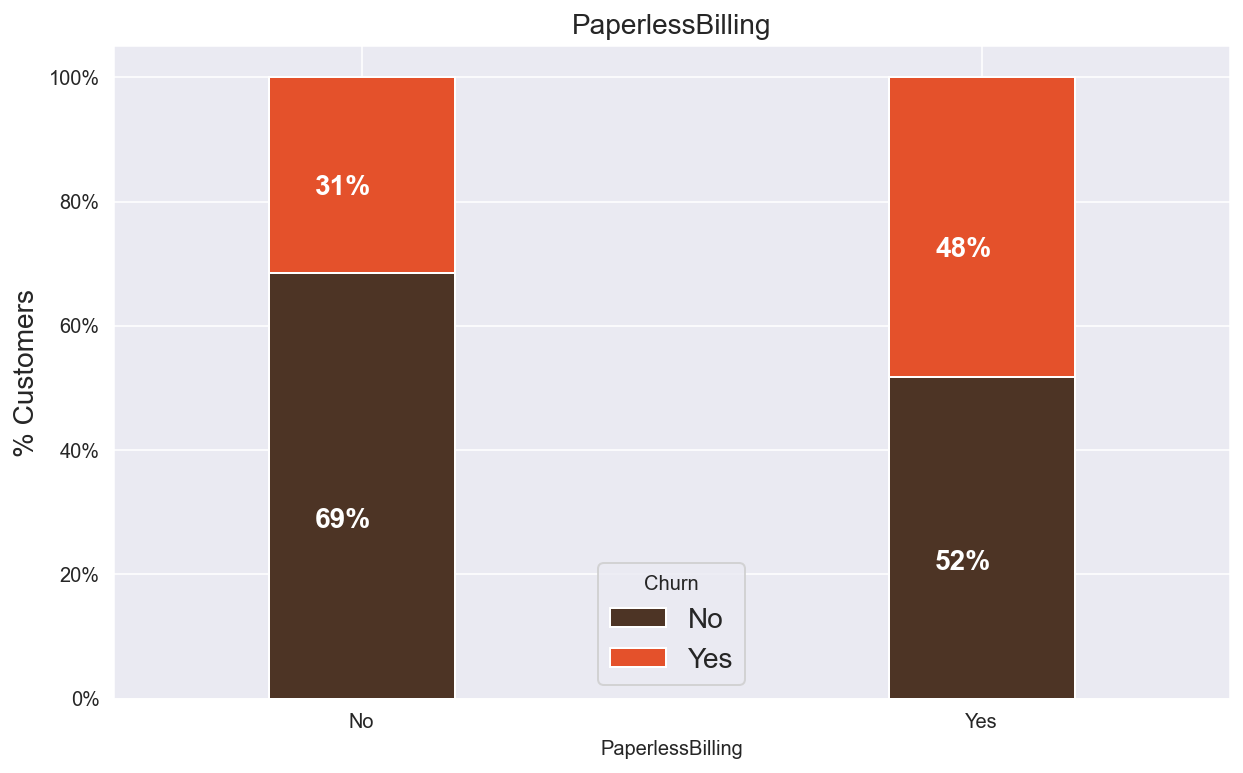

In [33]:
#Churn vs PaperlessBilling
#chisq for PaperlessBilling with churn
ctab5iii, chitest5iii, expected5iii = rp.crosstab(data5['PaperlessBilling'],data5['Churn'],margins = False, test = "chi-square",expected_freqs= True)
print(ctab5iii)
print(chitest5iii)
print(expected5iii)


import matplotlib.ticker as mtick
colors = ['#4D3425','#E4512B']
contract_churn = data5.groupby(['PaperlessBilling','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0, figsize = (10,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('PaperlessBilling',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)
#There is siginificant association between PaperlessBilling and churn



                          Churn     
Churn                        No  Yes
PaymentMethod                       
Bank transfer (automatic)   388  201
Credit card (automatic)     365  178
Electronic check            856  994
Mailed check                611  282
                Chi-square test   results
0  Pearson Chi-square ( 3.0) =   176.6492
1                    p-value =     0.0000
2                 Cramer's V =     0.2135
                                 Churn            
Churn                               No         Yes
PaymentMethod                                     
Bank transfer (automatic)   337.440000  251.560000
Credit card (automatic)     311.086452  231.913548
Electronic check           1059.870968  790.129032
Mailed check                511.602581  381.397419


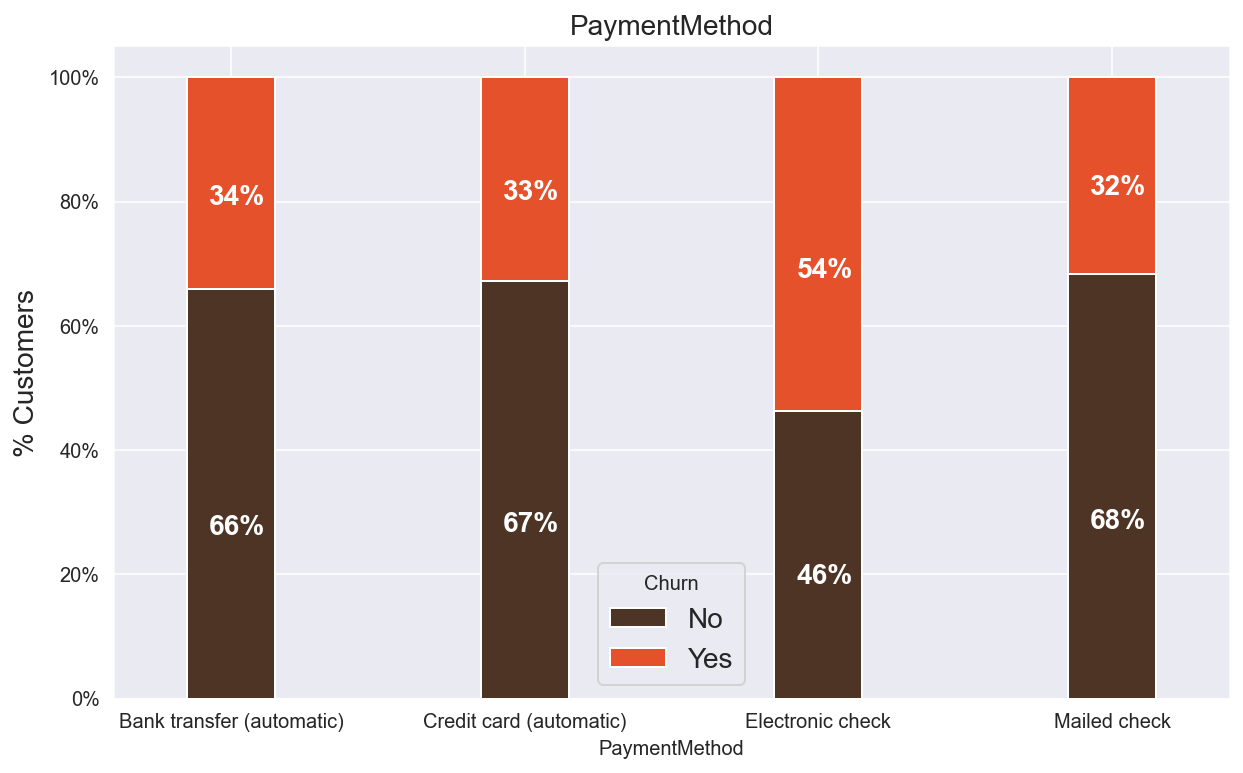

In [34]:
#Churn vs PaymentMethod
#chisq for PaymentMethod with churn
ctab5iv, chitest5iv, expected5iv = rp.crosstab(data5['PaymentMethod'],data5['Churn'],margins = False, test = "chi-square",expected_freqs= True)
print(ctab5iv)
print(chitest5iv)
print(expected5iv)


import matplotlib.ticker as mtick
colors = ['#4D3425','#E4512B']
contract_churn = data5.groupby(['PaymentMethod','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0, figsize = (10,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('PaymentMethod',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)
#There is siginificant association between PaymentMethod and churn



                          PaperlessBilling      
PaperlessBilling                        No   Yes
PaymentMethod                                   
Bank transfer (automatic)              206   383
Credit card (automatic)                161   382
Electronic check                       453  1397
Mailed check                           469   424
                Chi-square test   results
0  Pearson Chi-square ( 3.0) =   217.3285
1                    p-value =     0.0000
2                 Cramer's V =     0.2368
                          PaperlessBilling             
PaperlessBilling                        No          Yes
PaymentMethod                                          
Bank transfer (automatic)       195.928000   393.072000
Credit card (automatic)         180.626323   362.373677
Electronic check                615.393548  1234.606452
Mailed check                    297.052129   595.947871


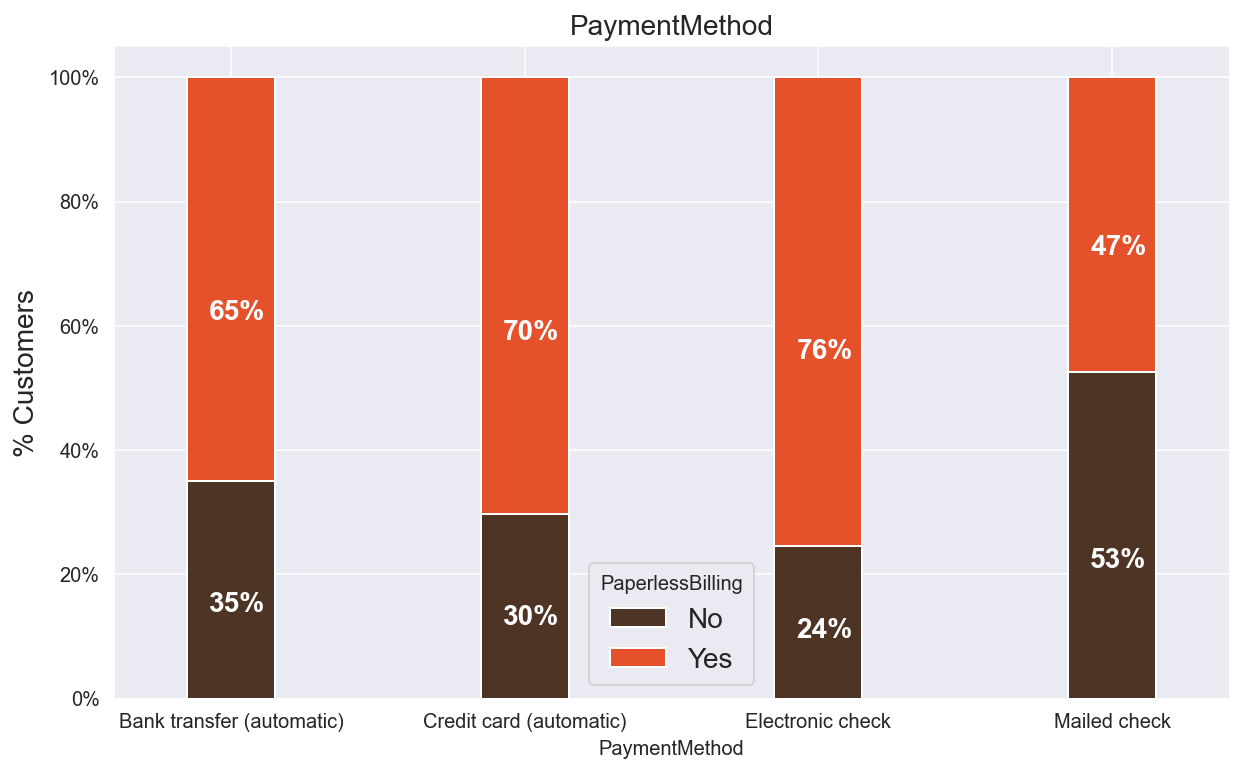

In [35]:
#PaperlessBilling vs PaymentMethod
#chisq for PaymentMethod with PaperlessBilling
ctab5iv, chitest5iv, expected5iv = rp.crosstab(data5['PaymentMethod'],data5['PaperlessBilling'],margins = False, test = "chi-square",expected_freqs= True)
print(ctab5iv)
print(chitest5iv)
print(expected5iv)


import matplotlib.ticker as mtick
colors = ['#4D3425','#E4512B']
contract_churn = data5.groupby(['PaymentMethod','PaperlessBilling']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0, figsize = (10,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'PaperlessBilling')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('PaymentMethod',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)
#There is siginificant association between PaymentMethod and churn

                     Churn     
Churn                   No  Yes
customer_data.gender           
Female                1083  842
Male                  1137  813
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    1.6604
1                    p-value =    0.1975
2               Cramer's phi =    0.0207
                           Churn           
Churn                         No        Yes
customer_data.gender                       
Female                1102.83871  822.16129
Male                  1117.16129  832.83871


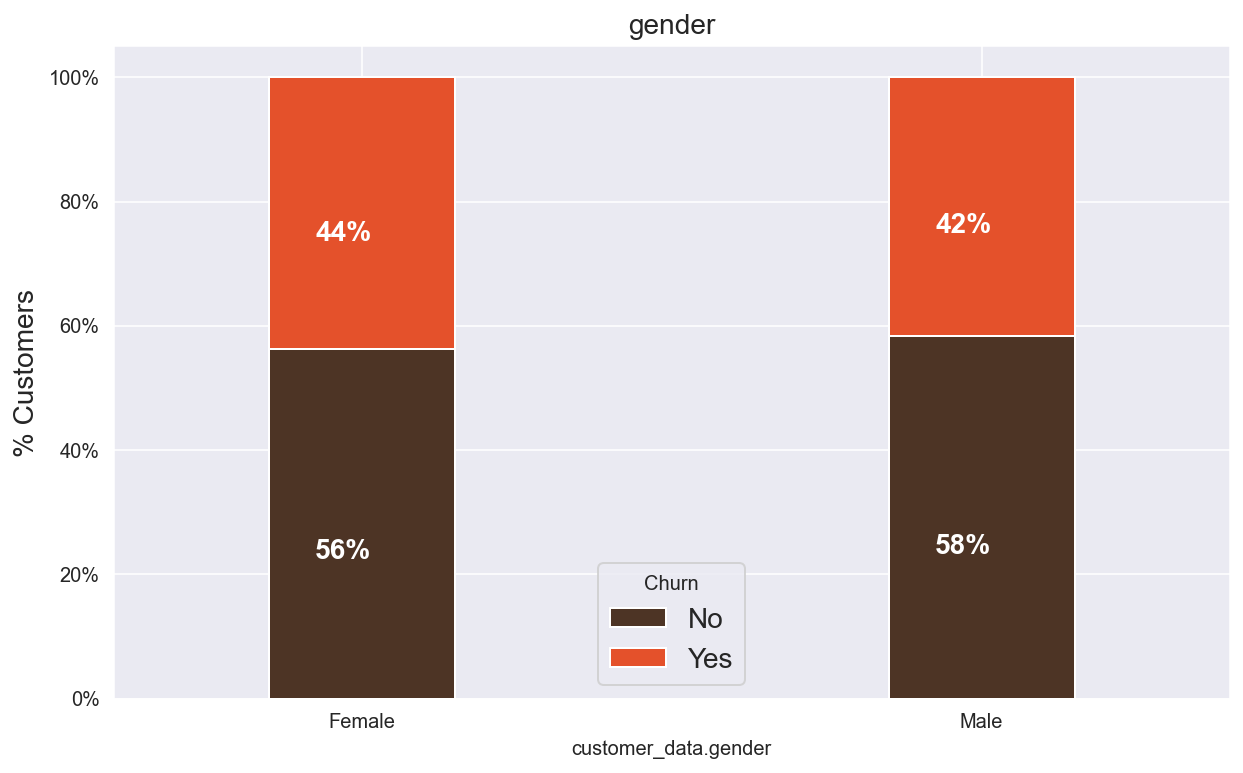

In [36]:
#Churn vs gender 
#chisq for gender with churn
ctab5v, chitest5v, expected5v = rp.crosstab(data5['customer_data.gender'],data5['Churn'],margins = False, test = "chi-square",expected_freqs= True)
print(ctab5v)
print(chitest5v)
print(expected5v)


import matplotlib.ticker as mtick
colors = ['#4D3425','#E4512B']
contract_churn = data5.groupby(['customer_data.gender','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0, figsize = (10,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('gender',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)
#There is no siginificant association between gender and churn



                      Churn      
Churn                    No   Yes
customer_data.Partner            
No                     1380  1115
Yes                     840   540
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =   11.2216
1                    p-value =    0.0008
2               Cramer's phi =    0.0538
                             Churn             
Churn                           No          Yes
customer_data.Partner                          
No                     1429.393548  1065.606452
Yes                     790.606452   589.393548


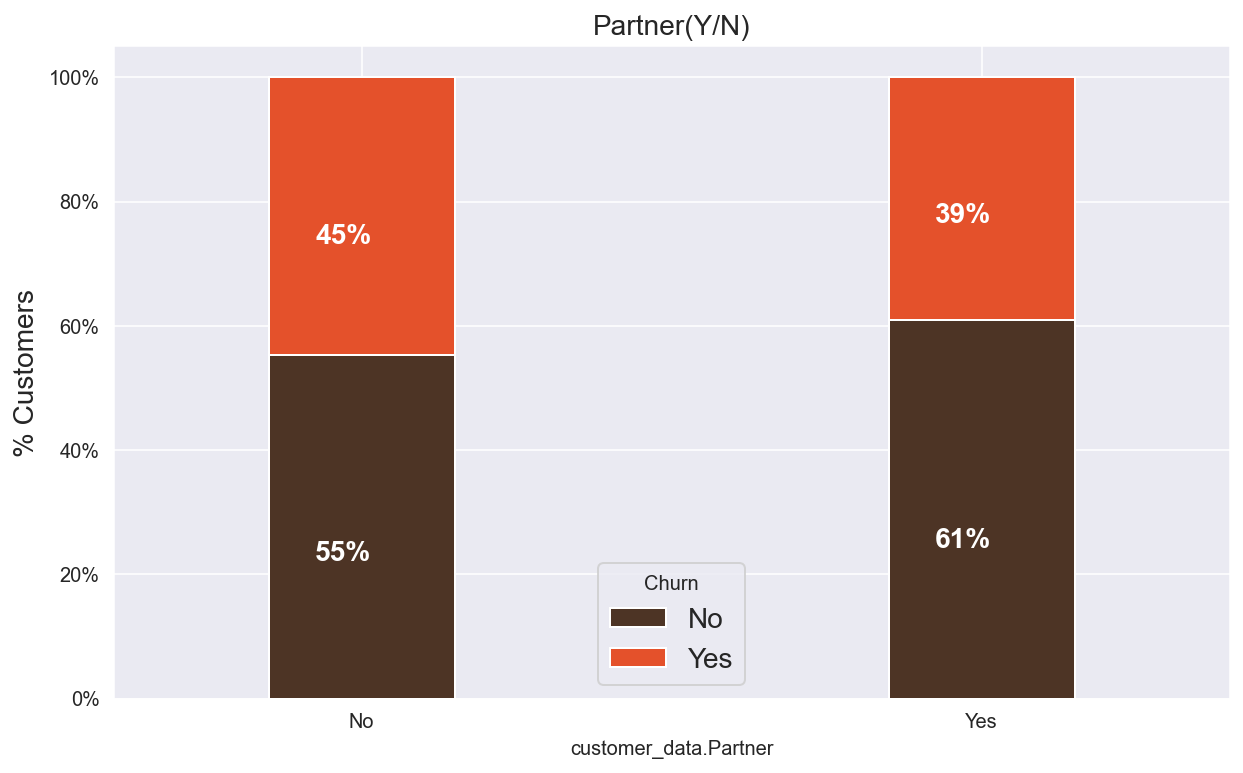

In [37]:
#Churn vs customer_data.Partner
#chisq for customer_data.Partner with churn
ctab5vi, chitest5vi, expected5vi = rp.crosstab(data5['customer_data.Partner'],data5['Churn'],margins = False, test = "chi-square",expected_freqs= True)
print(ctab5vi)
print(chitest5vi)
print(expected5vi)


import matplotlib.ticker as mtick
colors = ['#4D3425','#E4512B']
contract_churn = data5.groupby(['customer_data.Partner','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0, figsize = (10,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Partner(Y/N)',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)
#There is siginificant association between Partner(Y/N) and churn



                         Churn      
Churn                       No   Yes
customer_data.Dependents            
No                        1690  1396
Yes                        530   259
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =   39.5504
1                    p-value =    0.0000
2               Cramer's phi =    0.1010
                                Churn             
Churn                              No          Yes
customer_data.Dependents                          
No                        1767.979355  1318.020645
Yes                        452.020645   336.979355


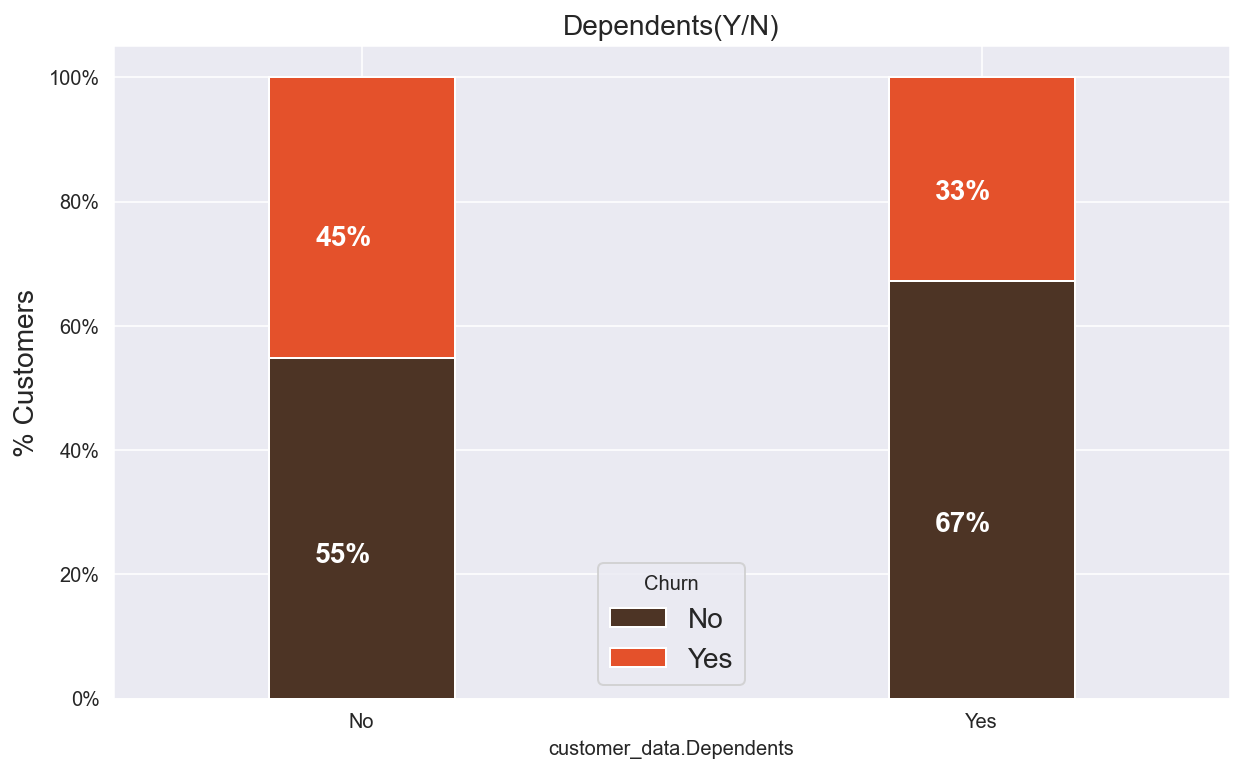

In [38]:
#customer_data.Dependents
#Churn vs customer_data.Dependents
#chisq for customer_data.Dependents with churn
ctab5vii, chitest5vii, expected5vii = rp.crosstab(data5['customer_data.Dependents'],data5['Churn'],margins = False, test = "chi-square",expected_freqs= True)
print(ctab5vii)
print(chitest5vii)
print(expected5vii)


import matplotlib.ticker as mtick
colors = ['#4D3425','#E4512B']
contract_churn = data5.groupby(['customer_data.Dependents','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0, figsize = (10,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Dependents(Y/N)',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)
#There is siginificant association between Dependents(Y/N) and churn



                                Churn     
Churn                              No  Yes
internet_data (2).MultipleLines           
No                               1237  780
No phone service                  223  153
Yes                               760  722
                Chi-square test  results
0  Pearson Chi-square ( 2.0) =   35.9339
1                    p-value =    0.0000
2                 Cramer's V =    0.0963
                                       Churn            
Churn                                     No         Yes
internet_data (2).MultipleLines                         
No                               1155.545806  861.454194
No phone service                  215.411613  160.588387
Yes                               849.042581  632.957419


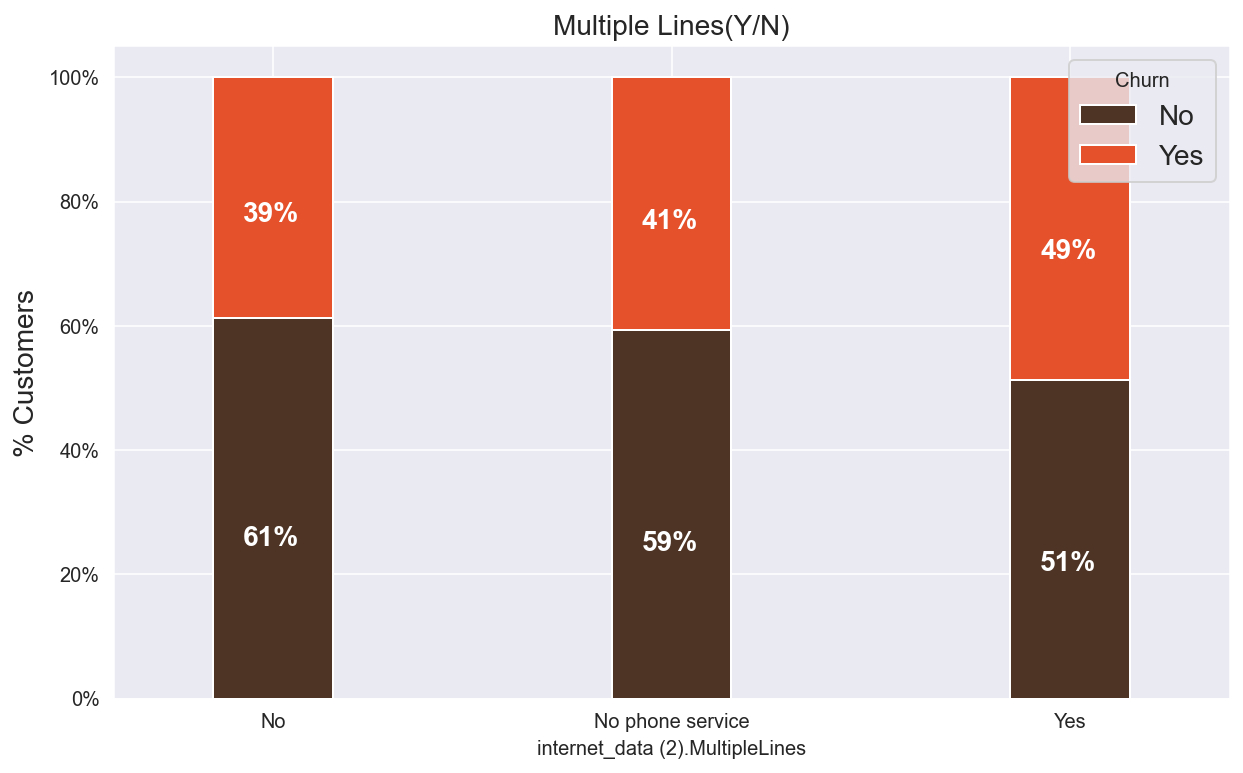

In [39]:
#internet_data (2).MultipleLines
#Churn vs internet_data (2).MultipleLines
#chisq for internet_data (2).MultipleLines with churn
ctab5viii, chitest5viii, expected5viii = rp.crosstab(data5['internet_data (2).MultipleLines'],data5['Churn'],margins = False, test = "chi-square",expected_freqs= True)
print(ctab5viii)
print(chitest5viii)
print(expected5viii)


import matplotlib.ticker as mtick
colors = ['#4D3425','#E4512B']
contract_churn = data5.groupby(['internet_data (2).MultipleLines','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0, figsize = (10,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Multiple Lines(Y/N)',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)
#There is siginificant association between Multiple Lines(Y/N) and churn



                                  Churn      
Churn                                No   Yes
internet_data (2).InternetService            
DSL                                 829   394
Fiber optic                         966  1162
No                                  425    99
                Chi-square test   results
0  Pearson Chi-square ( 2.0) =   299.5797
1                    p-value =     0.0000
2                 Cramer's V =     0.2780
                                         Churn            
Churn                                       No         Yes
internet_data (2).InternetService                         
DSL                                 700.660645  522.339355
Fiber optic                        1219.138065  908.861935
No                                  300.201290  223.798710


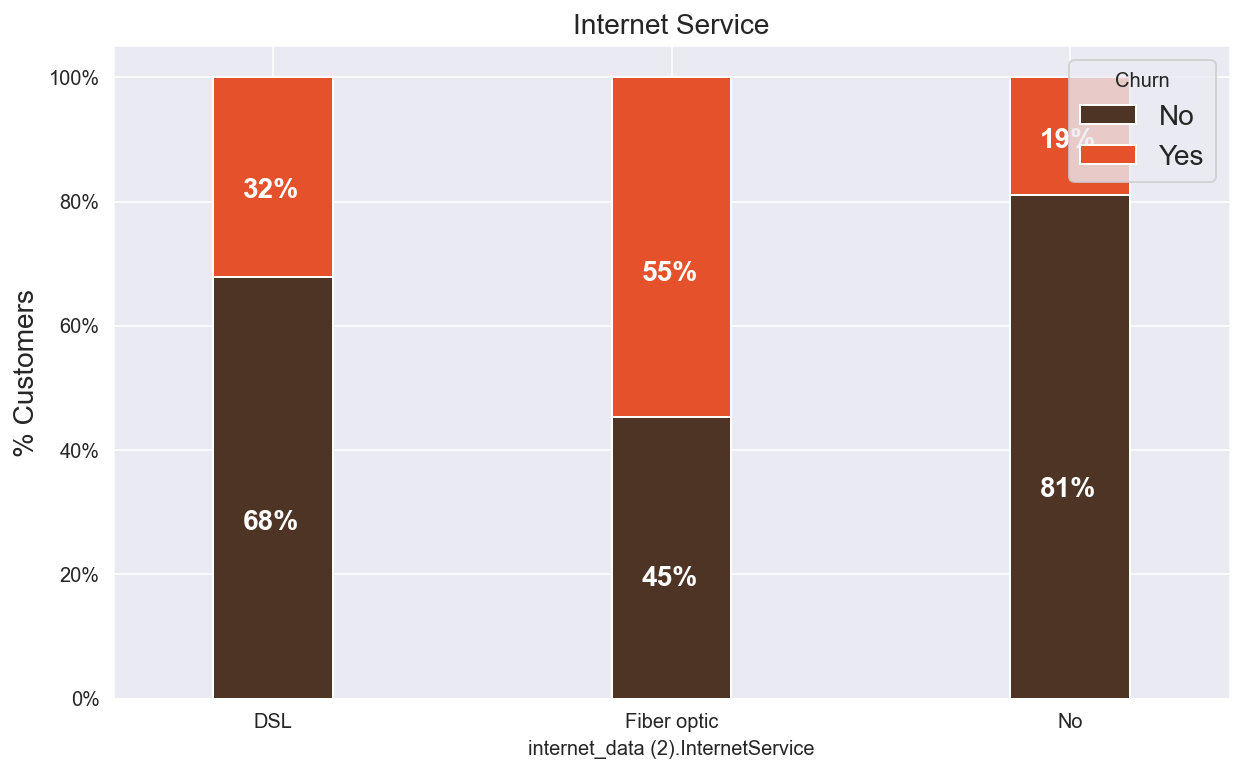

In [40]:
#internet_data (2).InternetService
#Churn vs internet_data (2).InternetService
#chisq for internet_data (2).InternetService
ctab5ix, chitest5ix, expected5ix = rp.crosstab(data5['internet_data (2).InternetService'],data5['Churn'],margins = False, test = "chi-square",expected_freqs= True)
print(ctab5ix)
print(chitest5ix)
print(expected5ix)


import matplotlib.ticker as mtick
colors = ['#4D3425','#E4512B']
contract_churn = data5.groupby(['internet_data (2).InternetService','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0, figsize = (10,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Internet Service',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)
#There is siginificant association between Internet Service and churn



In [41]:
##################################################### we have to segment data based on whether the user has internet service or not###################################

In [42]:
############ Not Having Internet service

In [43]:
#dataN = pd.read_excel(r"C:\Users\Heswanth Soor\Documents\Python Scripts\APAUR\telecom churn.xlsx", sheet_name= 'Final sheet')
#dataN = dataN[dataN['tenure']!=0]
#dataN = dataN[dataN['Contract']== 'Month-to-month']
#data_no_int = dataN[dataN['internet_data (2).InternetService']=="No"]
#data_no_int = data_no_int.iloc[:,1:14]
#data_no_int = pd.get_dummies(data_no_int,columns=['PhoneService','PaperlessBilling','PaymentMethod','customer_data.gender','customer_data.Partner','customer_data.Dependents','internet_data (2).MultipleLines'],drop_first=True)
#data_no_int['Churn'].replace(to_replace='Yes', value=1, inplace=True)
#data_no_int['Churn'].replace(to_replace='No',  value=0, inplace=True)
#data_no_int.tail()


In [44]:
#remove totalcharges column
#data_no_int = data_no_int.drop(['TotalCharges','Contract'],axis=1)
#data_no_int.head()



In [45]:
#list(data_no_int.columns)

In [46]:
#Defining variables for logistic regression
#X = pd.DataFrame(data_no_int[['tenure','MonthlyCharges','customer_data.SeniorCitizen','PaperlessBilling_Yes','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check','customer_data.gender_Male','customer_data.Partner_Yes','customer_data.Dependents_Yes','internet_data (2).MultipleLines_Yes']])
#y = pd.DataFrame(data_no_int[['Churn']])

#print(X.head())
#print(y.head())


In [47]:
#Model fitting
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
#from sklearn import metrics
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=307)
#logreg = LogisticRegression()
#logreg.fit(X_train, y_train)
#logreg.coef_

#y_pred = logreg.predict(X_test)
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [48]:
#print(y_train['Churn'].value_counts())
#print(y_test['Churn'].value_counts())

In [49]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix)

#Overfitting problem due to class imbalance in the dataset

In [50]:
#Doing Oversampling technique (SMOTE) for oversampling the data
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state = 307)
#X_train_new,y_train_new = sm.fit_resample(X_train,y_train)

In [51]:
#logreg.fit(X_train_new, y_train_new)
#y_pred = logreg.predict(X_test)
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [52]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix)

In [53]:
#from sklearn.metrics import classification_report
#print(classification_report(y_test, y_pred))

In [54]:
#import matplotlib.pyplot as plt 
#plt.rc("font", size=14)
#import seaborn as sns
#sns.set(style="white")
#sns.set(style="whitegrid", color_codes=True)
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve
#logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
#fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
#plt.figure()
#plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
#plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic')
#plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
#plt.show()



In [55]:
#Adaboost
#from sklearn.ensemble import AdaBoostClassifier
#model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
#model.fit(X_train,y_train)
#y_pred1 = model.predict(X_test)
#metrics.accuracy_score(y_test, y_pred1)


In [56]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix = confusion_matrix(y_test, y_pred1)
#print(confusion_matrix)

In [57]:
#from sklearn.metrics import classification_report
#print(classification_report(y_test, y_pred1))

In [58]:
#from xgboost import XGBClassifier
#model = XGBClassifier()
#model.fit(X_train, y_train)
#y_pred2= model.predict(X_test)
#metrics.accuracy_score(y_test, y_pred2)

In [59]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix = confusion_matrix(y_test, y_pred2)
#print(confusion_matrix)

In [60]:
#from sklearn.metrics import classification_report
#print(classification_report(y_test, y_pred2))

In [61]:
#Regression Model Output
#import numpy as np
#import statsmodels.api as sm

#X = sm.add_constant(X)

#model = sm.Logit(y, X)
#result = model.fit(method='newton')



In [62]:
#result.summary()

In [63]:
#def stepwise_selection(X, y,SL_in=0.05,SL_out = 0.05):
    #initial_features = X.columns.tolist()
    #best_features = []
    #while (len(initial_features)>0):
        #remaining_features = list(set(initial_features)-set(best_features))
        #new_pval = pd.Series(index=remaining_features)
        #for new_column in remaining_features:
           # model = sm.Logit(y, X[best_features+[new_column]]).fit()
           # new_pval[new_column] = model.pvalues[new_column]
      #  min_p_value = new_pval.min()
       # if(min_p_value<SL_in):
        #    best_features.append(new_pval.idxmin())
         #   while(len(best_features)>0):
          #      best_features_with_constant = X[best_features]
           #     p_values = sm.Logit(y, best_features_with_constant).fit().pvalues[1:]
            #    max_p_value = p_values.max()
             #   if(max_p_value >= SL_out):
              #      excluded_feature = p_values.idxmax()
               #     best_features.remove(excluded_feature)
                #else:
                 #   break 
        #else:
         #   break
    #return best_features

#stepwise_selection(X,y)


In [64]:
#Using only Tenure and Monthly charges as independent variables
#X = pd.DataFrame(data_no_int[['tenure','MonthlyCharges']])
#y = pd.DataFrame(data_no_int[['Churn']])

#print(X.head())
#print(y.head())


In [65]:
#Model fitting
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
#from sklearn import metrics
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=307)
#logreg = LogisticRegression()
#logreg.fit(X_train, y_train)
#logreg.coef_

#y_pred = logreg.predict(X_test)
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [66]:
#print(y_train['Churn'].value_counts())
#print(y_test['Churn'].value_counts())

In [67]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix)

In [68]:
#Doing Oversampling technique (SMOTE) for oversampling the data
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state = 307)
#X_train_new,y_train_new = sm.fit_resample(X_train,y_train)

In [69]:
#logreg.fit(X_train_new, y_train_new)
#y_pred = logreg.predict(X_test)
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


In [70]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix)

#from sklearn.metrics import classification_report
#print(classification_report(y_test, y_pred))
#import matplotlib.pyplot as plt 
#plt.rc("font", size=14)
#import seaborn as sns
#sns.set(style="white")
#sns.set(style="whitegrid", color_codes=True)
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve
#logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
#fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
#plt.figure()
#plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
#plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic')
#plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
#plt.show()


In [71]:
#Regression Model Output
#import numpy as np
#import statsmodels.api as sm

#X = sm.add_constant(X)

#model = sm.Logit(y, X)
#result = model.fit(method='newton')
#result.summary()

In [72]:
##################################################### we have to segment data based on whether the user has internet service or not###################################

In [73]:
############ Having Internet service

In [74]:
dataN = pd.read_excel(r"C:\Users\Heswanth Soor\Documents\Python Scripts\APAUR\telecom churn.xlsx", sheet_name= 'Final sheet')
dataN = dataN[dataN['tenure']!=0]
dataN = dataN[dataN['Contract']== 'Month-to-month']
data_yes_int = dataN[dataN['internet_data (2).InternetService']!="No"]
data_yes_int = data_yes_int.iloc[:,1:]
data_yes_int = pd.get_dummies(data_yes_int,columns=['PaperlessBilling','PaymentMethod','customer_data.gender','customer_data.Partner','customer_data.Dependents','internet_data (2).MultipleLines','internet_data (2).InternetService','internet_data (2).OnlineSecurity','internet_data (2).OnlineBackup','internet_data (2).DeviceProtection','internet_data (2).TechSupport','internet_data (2).StreamingTV','internet_data (2).StreamingMovies'],drop_first=True)
data_yes_int['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data_yes_int['Churn'].replace(to_replace='No',  value=0, inplace=True)
data_yes_int.head()

,tenure,PhoneService,Contract,MonthlyCharges,TotalCharges,Churn,customer_data.SeniorCitizen,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,customer_data.Dependents_Yes,internet_data (2).MultipleLines_No phone service,internet_data (2).MultipleLines_Yes,internet_data (2).InternetService_Fiber optic,internet_data (2).OnlineSecurity_Yes,internet_data (2).OnlineBackup_Yes,internet_data (2).DeviceProtection_Yes,internet_data (2).TechSupport_Yes,internet_data (2).StreamingTV_Yes,internet_data (2).StreamingMovies_Yes
11,1,No,Month-to-month,29.85,29.85,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0
12,1,No,Month-to-month,39.65,39.65,1,1,1,0,1,...,0,1,0,0,0,0,1,0,0,1
14,1,No,Month-to-month,30.20,30.20,1,0,0,0,1,...,1,1,0,0,0,1,0,0,0,0
16,1,Yes,Month-to-month,45.25,45.25,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,1,Yes,Month-to-month,49.05,49.05,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [75]:
#remove totalcharges column
data_yes_int = data_yes_int.drop(['TotalCharges','PhoneService','Contract'],axis=1)
data_yes_int.head()


,tenure,MonthlyCharges,Churn,customer_data.SeniorCitizen,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customer_data.gender_Male,customer_data.Partner_Yes,customer_data.Dependents_Yes,internet_data (2).MultipleLines_No phone service,internet_data (2).MultipleLines_Yes,internet_data (2).InternetService_Fiber optic,internet_data (2).OnlineSecurity_Yes,internet_data (2).OnlineBackup_Yes,internet_data (2).DeviceProtection_Yes,internet_data (2).TechSupport_Yes,internet_data (2).StreamingTV_Yes,internet_data (2).StreamingMovies_Yes
11,1,29.85,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0
12,1,39.65,1,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1
14,1,30.20,1,0,0,0,1,0,1,1,1,1,0,0,0,1,0,0,0,0
16,1,45.25,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
17,1,49.05,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0


In [76]:
list(data_yes_int.columns)

['tenure',
 'MonthlyCharges',
 'Churn',
 'customer_data.SeniorCitizen',
 'PaperlessBilling_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'customer_data.gender_Male',
 'customer_data.Partner_Yes',
 'customer_data.Dependents_Yes',
 'internet_data (2).MultipleLines_No phone service',
 'internet_data (2).MultipleLines_Yes',
 'internet_data (2).InternetService_Fiber optic',
 'internet_data (2).OnlineSecurity_Yes',
 'internet_data (2).OnlineBackup_Yes',
 'internet_data (2).DeviceProtection_Yes',
 'internet_data (2).TechSupport_Yes',
 'internet_data (2).StreamingTV_Yes',
 'internet_data (2).StreamingMovies_Yes']

In [77]:
#Defining variables for logistic regression
X1 = pd.DataFrame(data_yes_int[['tenure','MonthlyCharges','customer_data.SeniorCitizen','PaperlessBilling_Yes','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check','customer_data.gender_Male','customer_data.Partner_Yes','customer_data.Dependents_Yes','internet_data (2).MultipleLines_No phone service','internet_data (2).MultipleLines_Yes','internet_data (2).InternetService_Fiber optic','internet_data (2).OnlineSecurity_Yes','internet_data (2).OnlineBackup_Yes','internet_data (2).DeviceProtection_Yes','internet_data (2).TechSupport_Yes','internet_data (2).StreamingTV_Yes','internet_data (2).StreamingMovies_Yes']])
y1 = pd.DataFrame(data_yes_int[['Churn']])

print(X1.head())
print(y1.head())

    tenure  MonthlyCharges  customer_data.SeniorCitizen  PaperlessBilling_Yes  \
11       1           29.85                            0                     1   
12       1           39.65                            1                     1   
14       1           30.20                            0                     0   
16       1           45.25                            1                     0   
17       1           49.05                            0                     0   

    PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
11                                      0                               1   
12                                      0                               1   
14                                      0                               1   
16                                      0                               0   
17                                      0                               0   

    PaymentMethod_Mailed check  customer_data.gend

In [78]:
#Model fitting
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X1_train, y1_train)
logreg.coef_

y1_pred = logreg.predict(X1_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X1_test, y1_test)))

Accuracy of logistic regression classifier on test set: 0.65


C:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
print(y1_train['Churn'].value_counts())
print(y1_test['Churn'].value_counts())

0    1261
1    1084
Name: Churn, dtype: int64
0    534
1    472
Name: Churn, dtype: int64


In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y1_test, y1_pred)
print(confusion_matrix)

[[355 179]
 [170 302]]


In [81]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67       534
           1       0.63      0.64      0.63       472

    accuracy                           0.65      1006
   macro avg       0.65      0.65      0.65      1006
weighted avg       0.65      0.65      0.65      1006



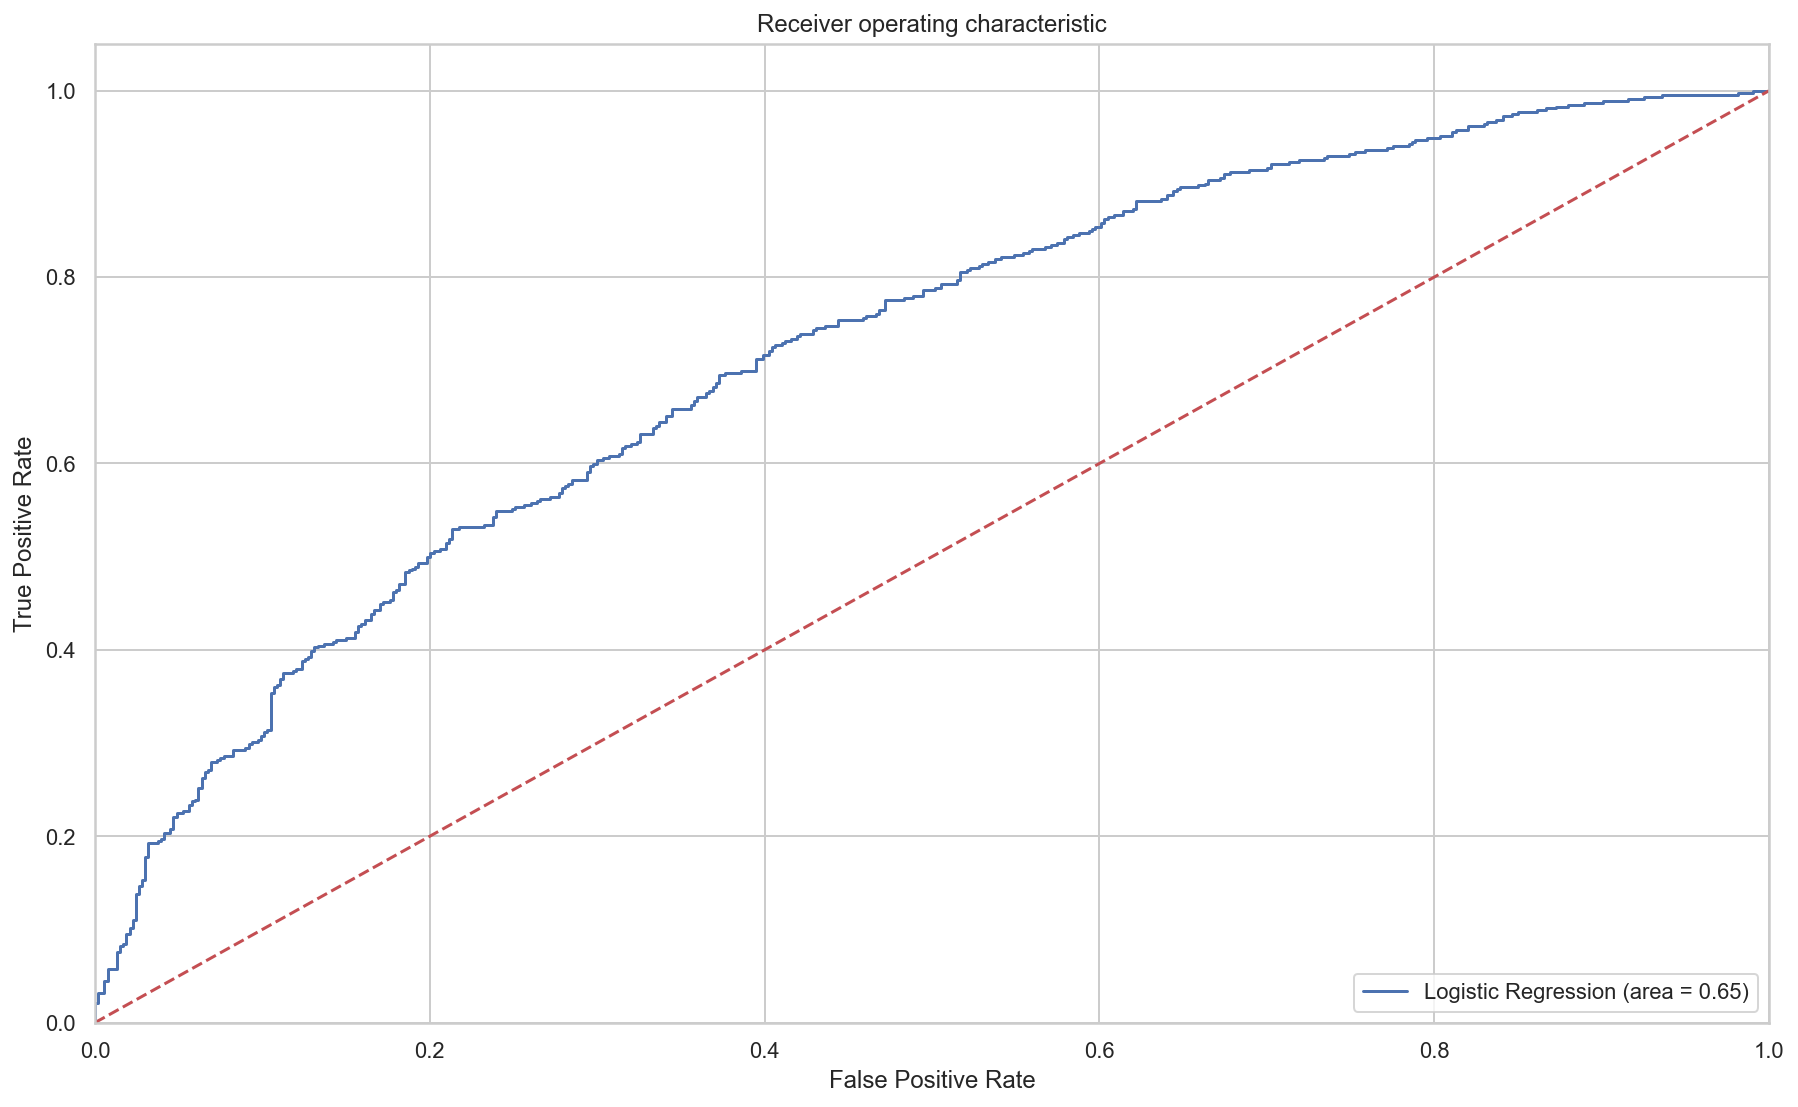

In [82]:
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y1_test, logreg.predict(X1_test))
fpr, tpr, thresholds = roc_curve(y1_test, logreg.predict_proba(X1_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [83]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X1_train, y1_train)
y1_pred2= model.predict(X1_test)
metrics.accuracy_score(y1_test, y1_pred2)

0.6332007952286283

In [84]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X1_train, y1_train)

# Make predictions
prediction_test = model_rf.predict(X1_test)
print (metrics.accuracy_score(y1_test, prediction_test))

<ipython-input-84-efd2e45d0b9d>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X1_train, y1_train)
C:\ANACONDA\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.6660039761431411


In [85]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X1_train,y1_train)
y1_pred1 = model.predict(X1_test)
metrics.accuracy_score(y1_test, y1_pred1)

C:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6630218687872763

In [86]:
#Regression Model Output
import numpy as np
import statsmodels.api as sm

X1 = sm.add_constant(X1)

model = sm.Logit(y1, X1)
result = model.fit(method='newton')
result.summary()

Optimization terminated successfully.
         Current function value: 0.594326
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3351
Model:                          Logit   Df Residuals:                     3331
Method:                           MLE   Df Model:                           19
Date:                Thu, 22 Dec 2022   Pseudo R-squ.:                  0.1394
Time:                        05:37:20   Log-Likelihood:                -1991.6
converged:                       True   LL-Null:                       -2314.2
Covariance Type:            nonrobust   LLR p-value:                1.402e-124
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                0.3634      1.720      0.211      0.833      -3.008       3.735
tenure                                              -0.0397      0.003    -13.996      0.000      -0.045      -0.034
MonthlyCharges                                      -0.0217      0.038     -0.571      0.568      -0.096       0.053
customer_data.SeniorCitizen                          0.2678      0.095      2.821      0.005       0.082       0.454
PaperlessBilling_Yes                                 0.3489      0.089      3.925      0.000       0.175       0.523
PaymentMethod_Credit card (automatic)               -0.0528      0.143     -0.368      0.713      -0.334       0.228
PaymentMethod_Electronic check                       0.3172      0.114      2.788      0.005       0.094       0.540
PaymentMethod_Mailed check                          -0.0420      0.141     -0.297      0.766      -0.319       0.235
customer_data.gender_Male                           -0.0627      0.077     -0.818      0.413      -0.213       0.088
customer_data.Partner_Yes                           -0.0101      0.091     -0.111      0.911      -0.189       0.169
customer_data.Dependents_Yes                        -0.1098      0.111     -0.993      0.321      -0.327       0.107
internet_data (2).MultipleLines_No phone service     0.1957      0.777      0.252      0.801      -1.327       1.718
internet_data (2).MultipleLines_Yes                  0.4788      0.211      2.271      0.023       0.066       0.892
internet_data (2).InternetService_Fiber optic        1.4714      0.956      1.539      0.124      -0.403       3.346
internet_data (2).OnlineSecurity_Yes                -0.2760      0.213     -1.295      0.195      -0.694       0.142
internet_data (2).OnlineBackup_Yes                  -0.0512      0.209     -0.245      0.806      -0.460       0.358
internet_data (2).DeviceProtection_Yes               0.1565      0.209      0.750      0.453      -0.253       0.565
internet_data (2).TechSupport_Yes                   -0.3526      0.216     -1.633      0.103      -0.776       0.071
internet_data (2).StreamingTV_Yes                    0.4552      0.390      1.168      0.243      -0.309       1.219
internet_data (2).StreamingMovies_Yes                0.4167      0.391      1.065      0.287      -0.350       1.184
====================================================================================================================
"""

In [87]:
def stepwise_selection(X1, y1,SL_in=0.05,SL_out = 0.05):
    initial_features = X1.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.Logit(y1, X1[best_features+[new_column]]).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = X1[best_features]
                p_values = sm.Logit(y1, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

stepwise_selection(X1,y1)


Optimization terminated successfully.
         Current function value: 0.690398
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 2
Optimization terminated successfully.
         Current function value: 0.684076
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.677836
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.691191
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.690782
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.693118
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.690450
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.693140
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693140
  

<ipython-input-87-2452c1fe0cde>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-87-2452c1fe0cde>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Optimization terminated successfully.
         Current function value: 0.663557
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.668038
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.666185
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.653474
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.624349
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.653907
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.647854
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.667712
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.644844
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.662597
  

<ipython-input-87-2452c1fe0cde>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-87-2452c1fe0cde>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Optimization terminated successfully.
         Current function value: 0.617990
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615406
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615798
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.617151
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.614022
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.609981
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.611548
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.613687
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.611788
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.613833
  

<ipython-input-87-2452c1fe0cde>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-87-2452c1fe0cde>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Optimization terminated successfully.
         Current function value: 0.608143
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.608874
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.609136
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.608876
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607475
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606337
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607342
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605590
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605922
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606846
  

<ipython-input-87-2452c1fe0cde>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-87-2452c1fe0cde>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Optimization terminated successfully.
         Current function value: 0.606724
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605590
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604564
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605430
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603112
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604893
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604448
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603743
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605577
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605409
  

<ipython-input-87-2452c1fe0cde>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-87-2452c1fe0cde>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-87-2452c1fe0cde>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Optimization terminated successfully.
         Current function value: 0.596452
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596762
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597213
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597522
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597498
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595944
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597517
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597186
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595944
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595944
  

<ipython-input-87-2452c1fe0cde>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-87-2452c1fe0cde>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


['tenure',
 'internet_data (2).InternetService_Fiber optic',
 'internet_data (2).OnlineSecurity_Yes',
 'internet_data (2).TechSupport_Yes',
 'PaymentMethod_Electronic check',
 'internet_data (2).StreamingTV_Yes',
 'internet_data (2).MultipleLines_Yes',
 'MonthlyCharges',
 'PaperlessBilling_Yes',
 'internet_data (2).StreamingMovies_Yes',
 'customer_data.SeniorCitizen',
 'internet_data (2).MultipleLines_No phone service']

In [88]:
#Defining variables for logistic regression
#Defining variables for logistic regression
X1 = pd.DataFrame(data_yes_int[['tenure','customer_data.SeniorCitizen','PaperlessBilling_Yes','PaymentMethod_Electronic check','internet_data (2).MultipleLines_No phone service','internet_data (2).MultipleLines_Yes','internet_data (2).InternetService_Fiber optic','internet_data (2).OnlineSecurity_Yes','internet_data (2).TechSupport_Yes','internet_data (2).StreamingTV_Yes','internet_data (2).StreamingMovies_Yes']])
y1 = pd.DataFrame(data_yes_int[['Churn']])

print(X1.head())
print(y1.head())


    tenure  customer_data.SeniorCitizen  PaperlessBilling_Yes  \
11       1                            0                     1   
12       1                            1                     1   
14       1                            0                     0   
16       1                            1                     0   
17       1                            0                     0   

    PaymentMethod_Electronic check  \
11                               1   
12                               1   
14                               1   
16                               0   
17                               0   

    internet_data (2).MultipleLines_No phone service  \
11                                                 1   
12                                                 1   
14                                                 1   
16                                                 0   
17                                                 0   

    internet_data (2).MultipleLines_Yes  \


In [89]:
#Model fitting
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X1_train, y1_train)
logreg.coef_

y1_pred = logreg.predict(X1_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X1_test, y1_test)))


Accuracy of logistic regression classifier on test set: 0.65


C:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [90]:
print(y1_train['Churn'].value_counts())
print(y1_test['Churn'].value_counts())


0    1261
1    1084
Name: Churn, dtype: int64
0    534
1    472
Name: Churn, dtype: int64


In [91]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y1_test, y1_pred)
print(confusion_matrix)


[[355 179]
 [171 301]]


In [92]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, y1_pred))


              precision    recall  f1-score   support

           0       0.67      0.66      0.67       534
           1       0.63      0.64      0.63       472

    accuracy                           0.65      1006
   macro avg       0.65      0.65      0.65      1006
weighted avg       0.65      0.65      0.65      1006



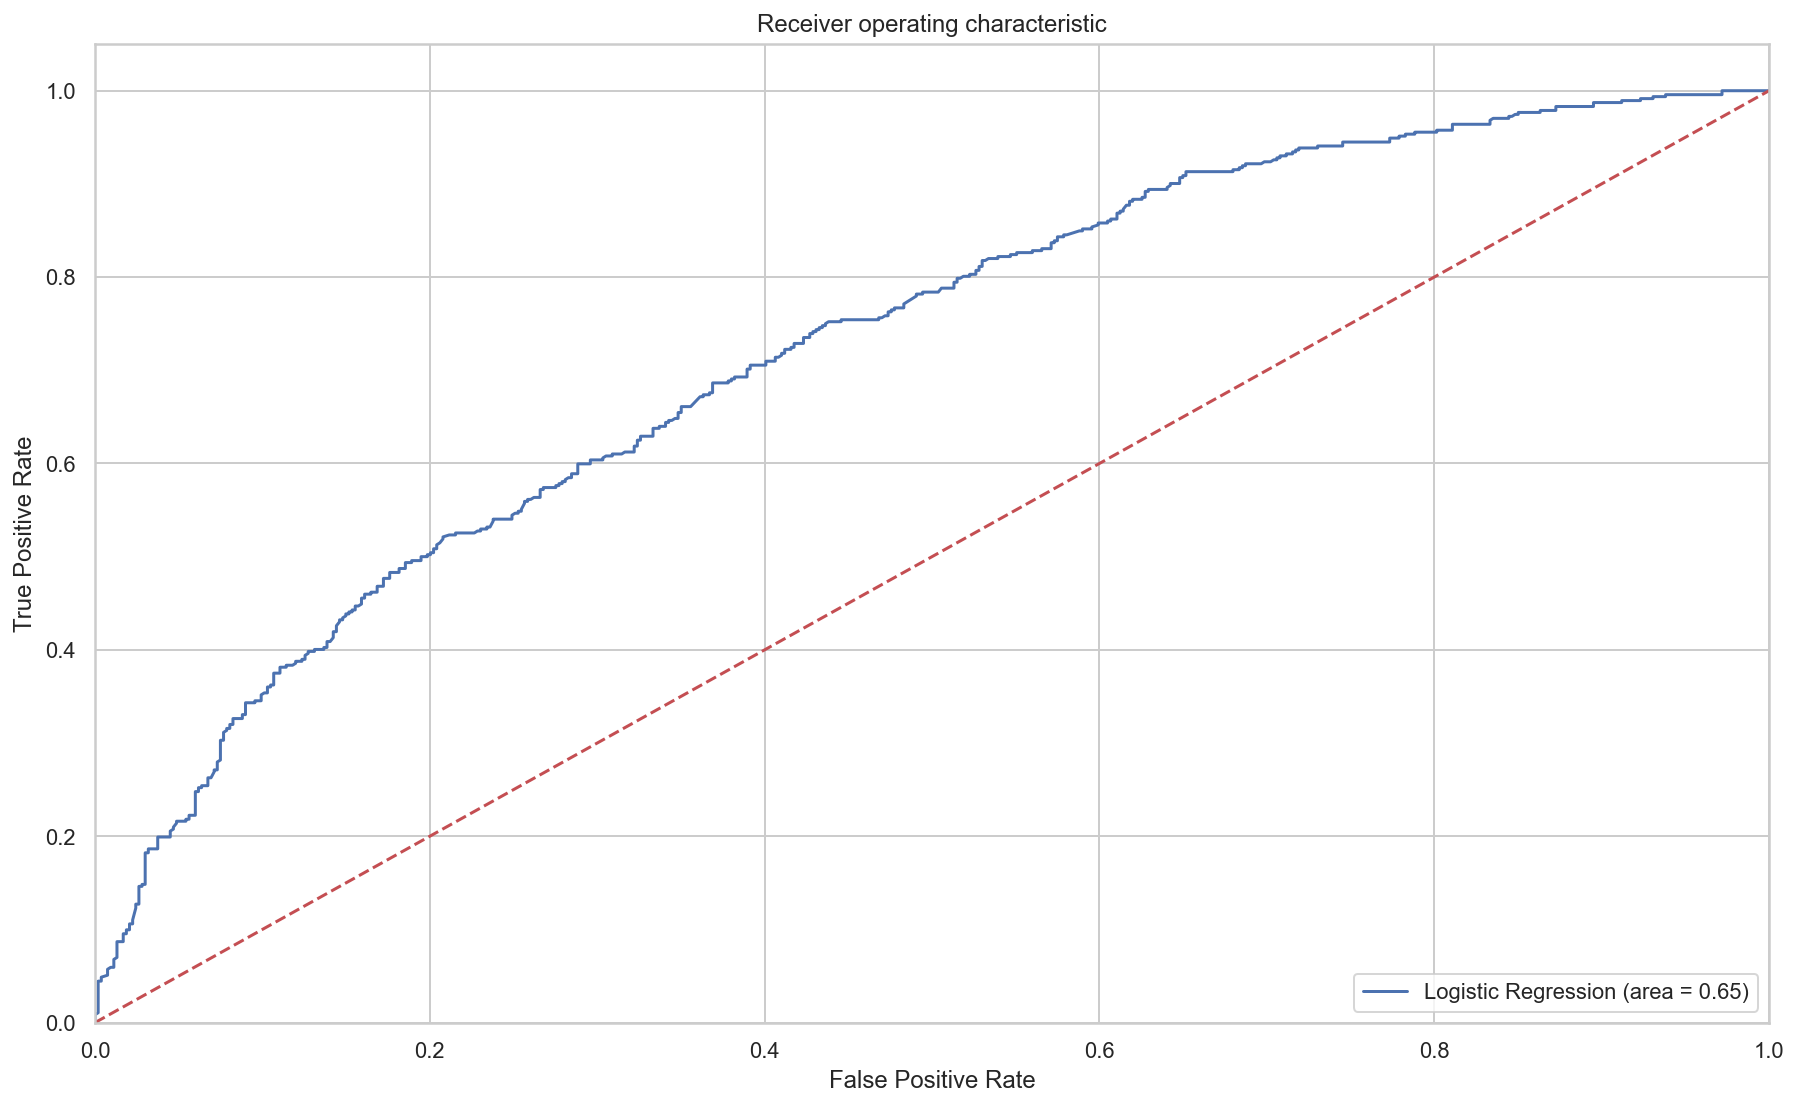

In [93]:
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y1_test, logreg.predict(X1_test))
fpr, tpr, thresholds = roc_curve(y1_test, logreg.predict_proba(X1_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [94]:
#Regression Model Output
import numpy as np
import statsmodels.api as sm

X1 = sm.add_constant(X1)

model = sm.Logit(y1, X1)
result = model.fit(method='newton')
result.summary()


Optimization terminated successfully.
         Current function value: 0.595233
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3351
Model:                          Logit   Df Residuals:                     3339
Method:                           MLE   Df Model:                           11
Date:                Thu, 22 Dec 2022   Pseudo R-squ.:                  0.1381
Time:                        05:37:23   Log-Likelihood:                -1994.6
converged:                       True   LL-Null:                       -2314.2
Covariance Type:            nonrobust   LLR p-value:                5.838e-130
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.7255      0.108     -6.696      0.000      -0.938      -0.513
tenure                                              -0.0410      0.003    -15.587      0.000      -0.046      -0.036
customer_data.SeniorCitizen                          0.2836      0.093      3.052      0.002       0.101       0.466
PaperlessBilling_Yes                                 0.3483      0.088      3.936      0.000       0.175       0.522
PaymentMethod_Electronic check                       0.3489      0.079      4.406      0.000       0.194       0.504
internet_data (2).MultipleLines_No phone service     0.6312      0.142      4.441      0.000       0.353       0.910
internet_data (2).MultipleLines_Yes                  0.3683      0.091      4.069      0.000       0.191       0.546
internet_data (2).InternetService_Fiber optic        0.9409      0.103      9.179      0.000       0.740       1.142
internet_data (2).OnlineSecurity_Yes                -0.3891      0.100     -3.909      0.000      -0.584      -0.194
internet_data (2).TechSupport_Yes                   -0.4649      0.102     -4.579      0.000      -0.664      -0.266
internet_data (2).StreamingTV_Yes                    0.2394      0.088      2.727      0.006       0.067       0.412
internet_data (2).StreamingMovies_Yes                0.2082      0.088      2.378      0.017       0.037       0.380
====================================================================================================================
"""

In [95]:
#####################################################One Year #############################################################

In [96]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)
data5 = pd.read_excel(r"C:\Users\Heswanth Soor\Documents\Python Scripts\APAUR\telecom churn.xlsx", sheet_name= 'Final sheet')
data5 = data5[data5['tenure']!=0]
data5.dropna(inplace =  True)
data5 = data5[data5['Contract']=='One year']
data5.head()


,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customer_data.gender,...,customer_data.Partner,customer_data.Dependents,internet_data (2).MultipleLines,internet_data (2).InternetService,internet_data (2).OnlineSecurity,internet_data (2).OnlineBackup,internet_data (2).DeviceProtection,internet_data (2).TechSupport,internet_data (2).StreamingTV,internet_data (2).StreamingMovies
32,6469-MRVET,1,Yes,One year,Yes,Electronic check,20.20,20.20,No,Male,...,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
105,5562-BETPV,1,Yes,One year,No,Mailed check,19.65,19.65,No,Male,...,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
116,8985-OOPOS,1,Yes,One year,No,Credit card (automatic),74.10,74.10,No,Female,...,No,No,No,DSL,No,No,Yes,Yes,Yes,Yes
143,2967-MXRAV,1,Yes,One year,No,Mailed check,18.80,18.80,No,Male,...,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
266,2239-CFOUJ,1,Yes,One year,No,Mailed check,20.40,20.40,No,Male,...,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service


In [97]:
data5.shape[0]

1472

No     88.722826
Yes    11.277174
Name: Churn, dtype: float64


<AxesSubplot:>

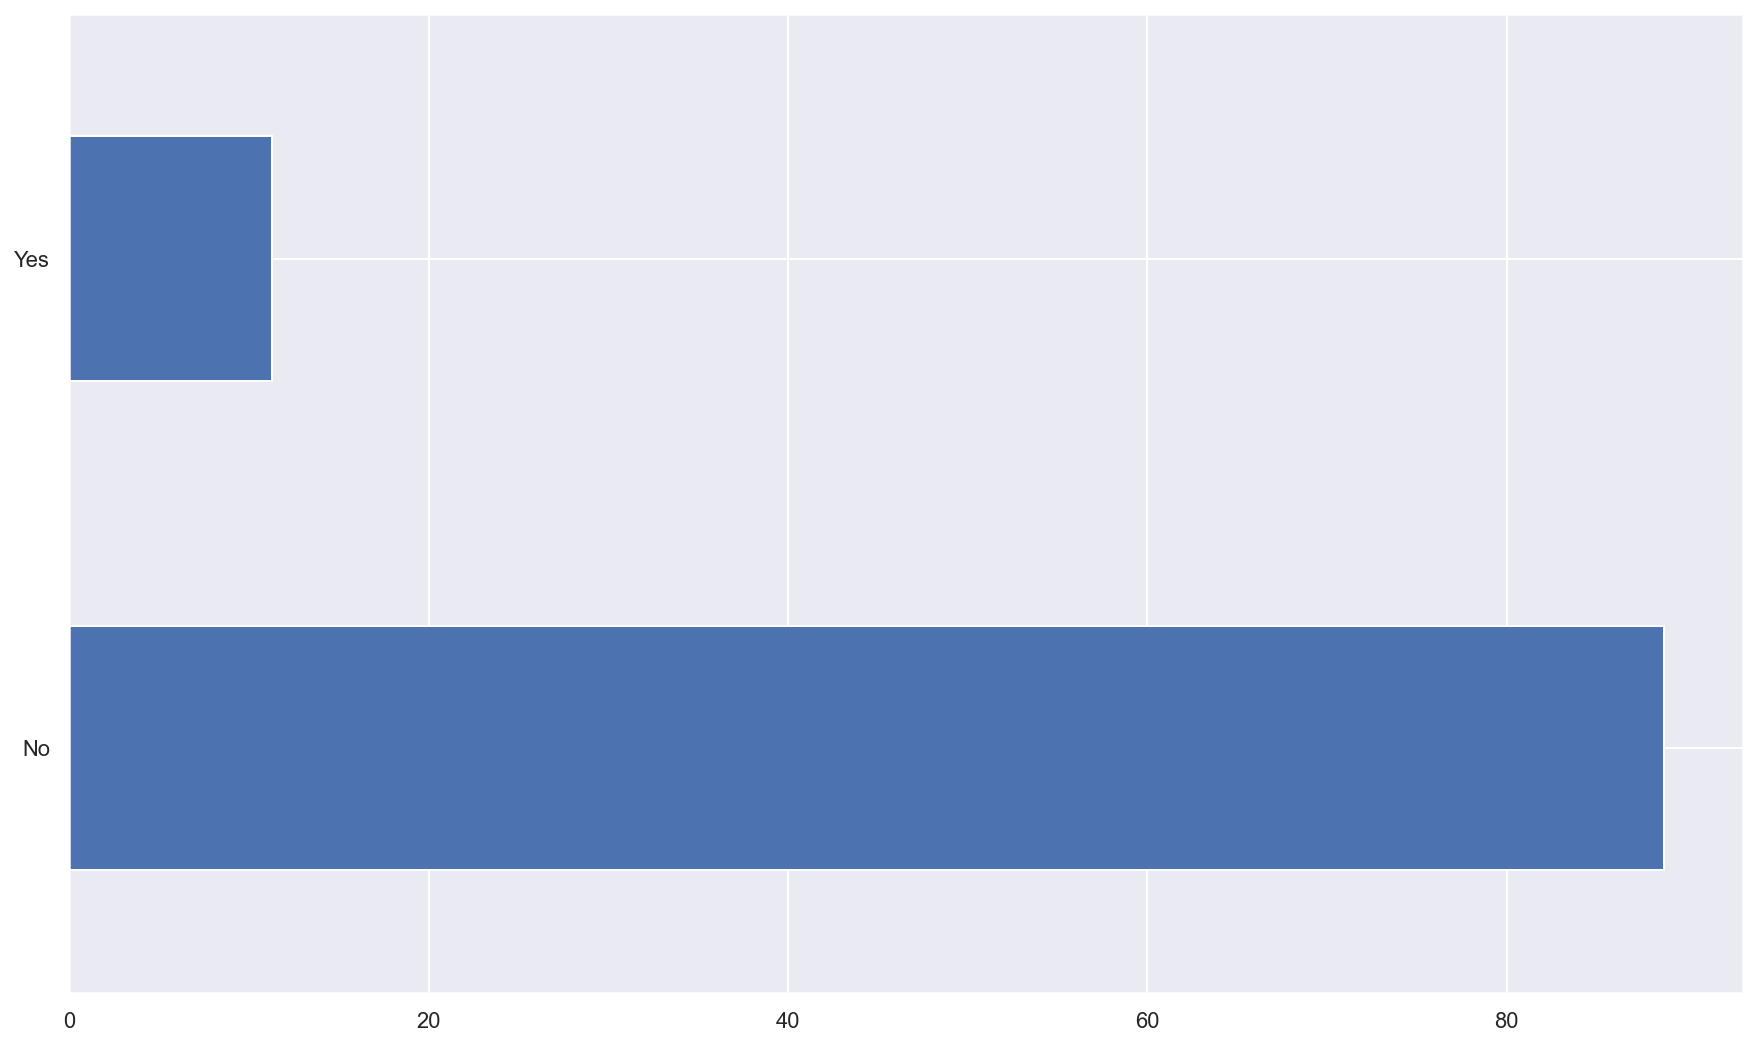

In [98]:
churncol = data5['Churn'].value_counts(normalize = True)*100
print(churncol)
churncol.plot(kind = 'barh',)


In [99]:
#Checking association between churn and other independent variables

Ttest_indResult(statistic=2.0820910824143306, pvalue=0.03750675560900268)


<AxesSubplot:xlabel='Churn', ylabel='tenure'>

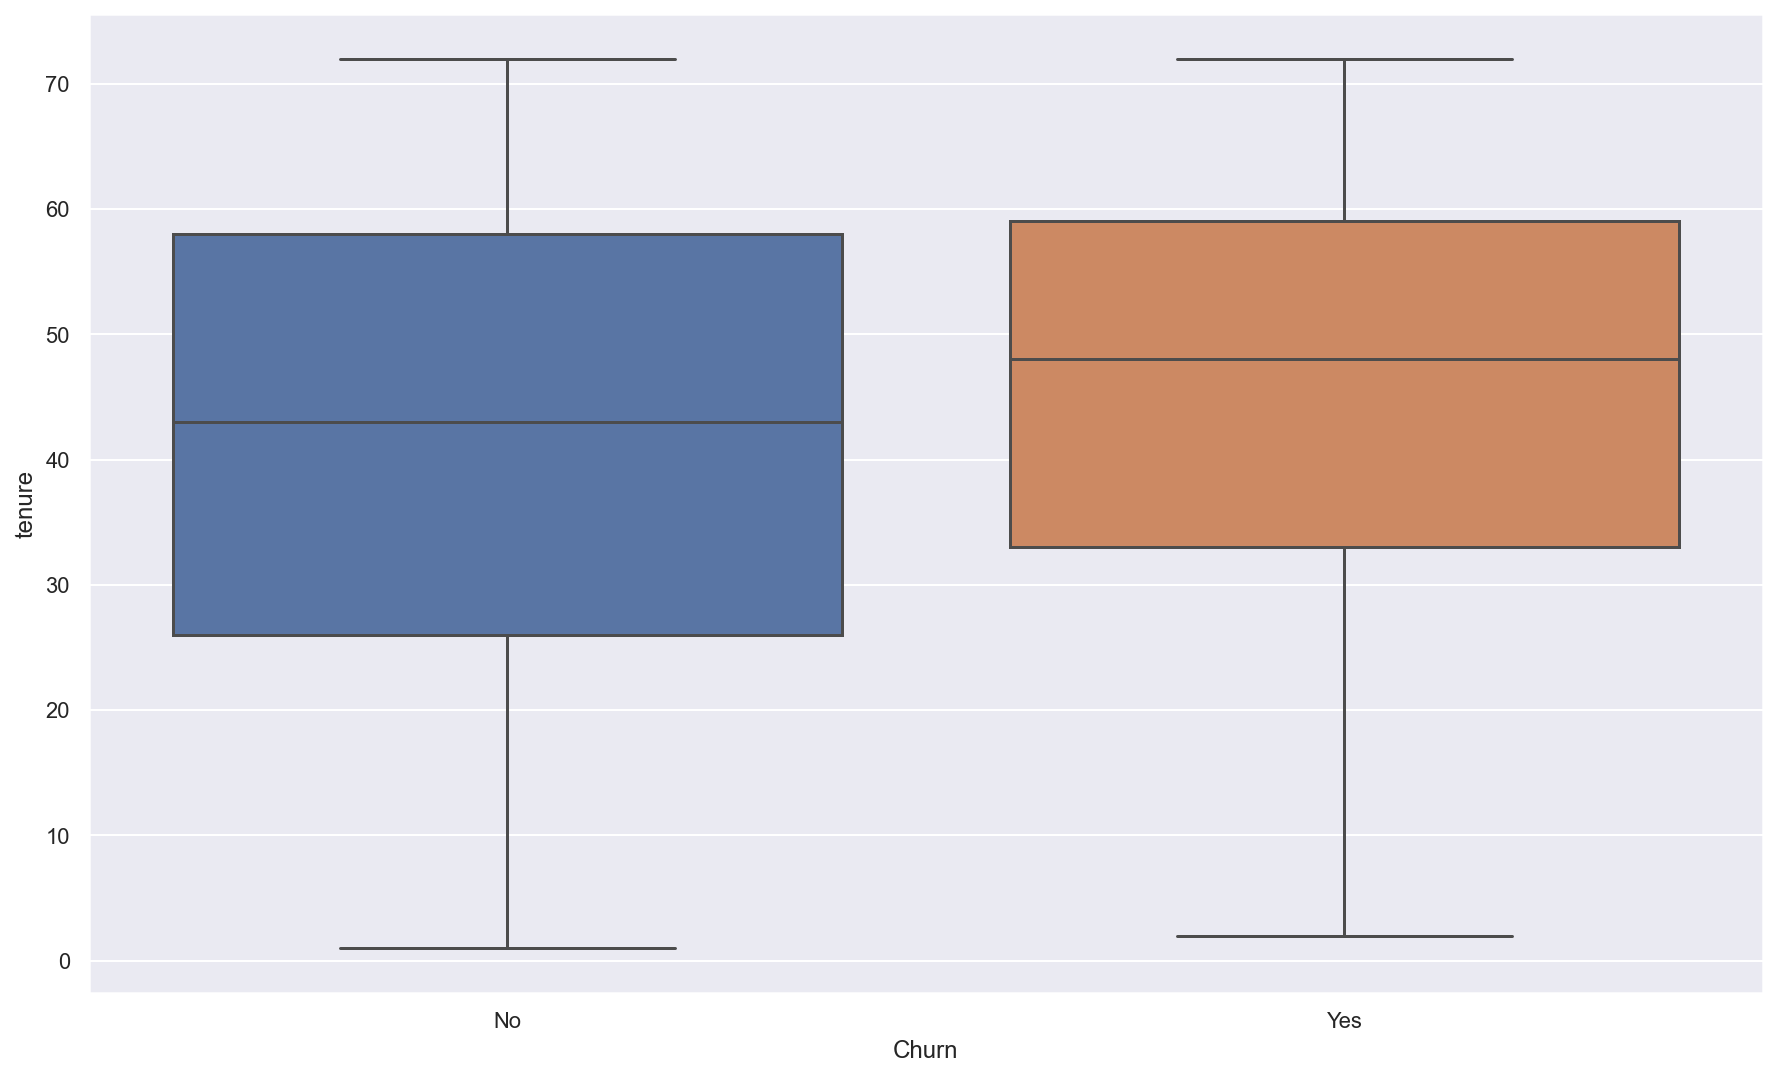

In [100]:
#Churn vs Tenure
#T-test for tenure with churn
from scipy.stats import ttest_ind
cat1 = data5[data5['Churn']=='Yes']
cat2 = data5[data5['Churn']=='No']
print(ttest_ind(cat1['tenure'], cat2['tenure']))
#There is sigificant difference
sns.boxplot(x = data5.Churn, y = data5.tenure)


Ttest_indResult(statistic=8.802908965812557, pvalue=3.6685099074962935e-18)


<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

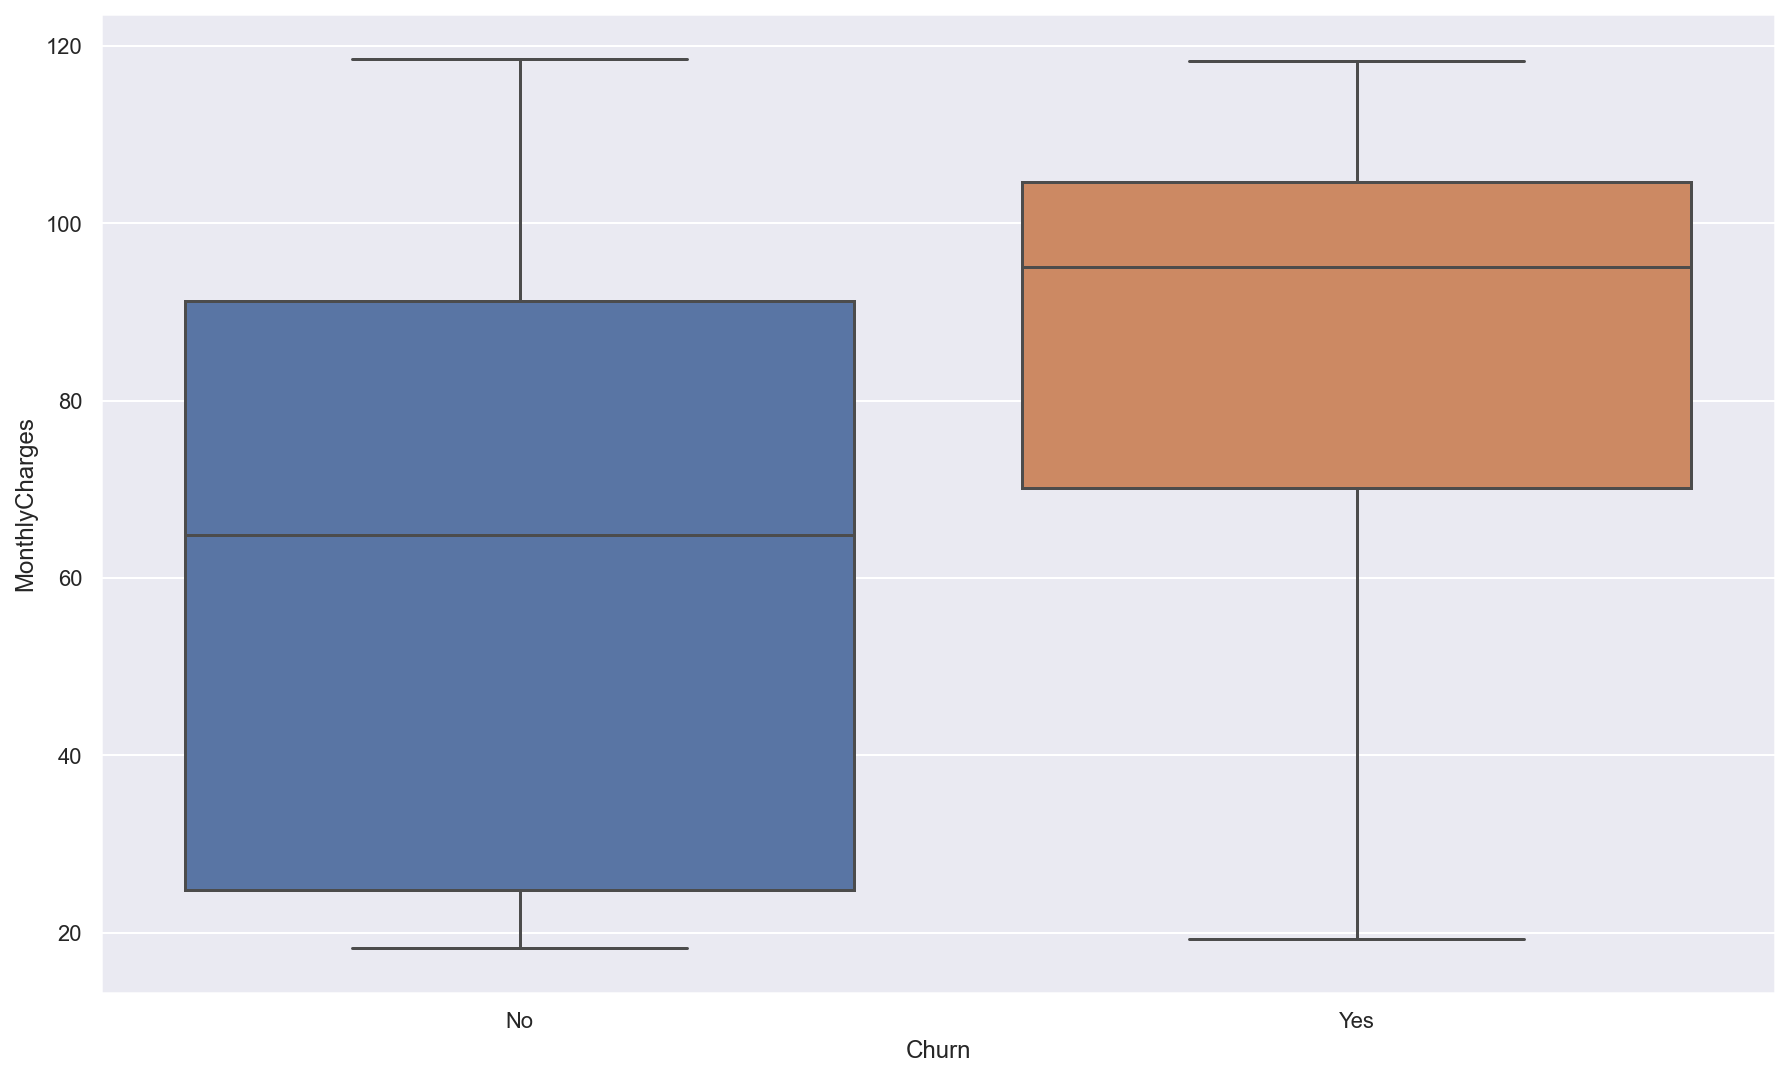

In [101]:
#Churn vsMonthly charges
#T-test for monthly charges with churn
cat1 = data5[data5['Churn']=='Yes']
cat2 = data5[data5['Churn']=='No']
print(ttest_ind(cat1['MonthlyCharges'], cat2['MonthlyCharges']))
#There is sigificant difference
sns.boxplot(x = data5.Churn, y = data5.MonthlyCharges)


             Churn     
Churn           No  Yes
PhoneService           
No             131   14
Yes           1175  152
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    0.4229
1                    p-value =    0.5155
2               Cramer's phi =    0.0170
                    Churn            
Churn                  No         Yes
PhoneService                         
No             128.648098   16.351902
Yes           1177.351902  149.648098


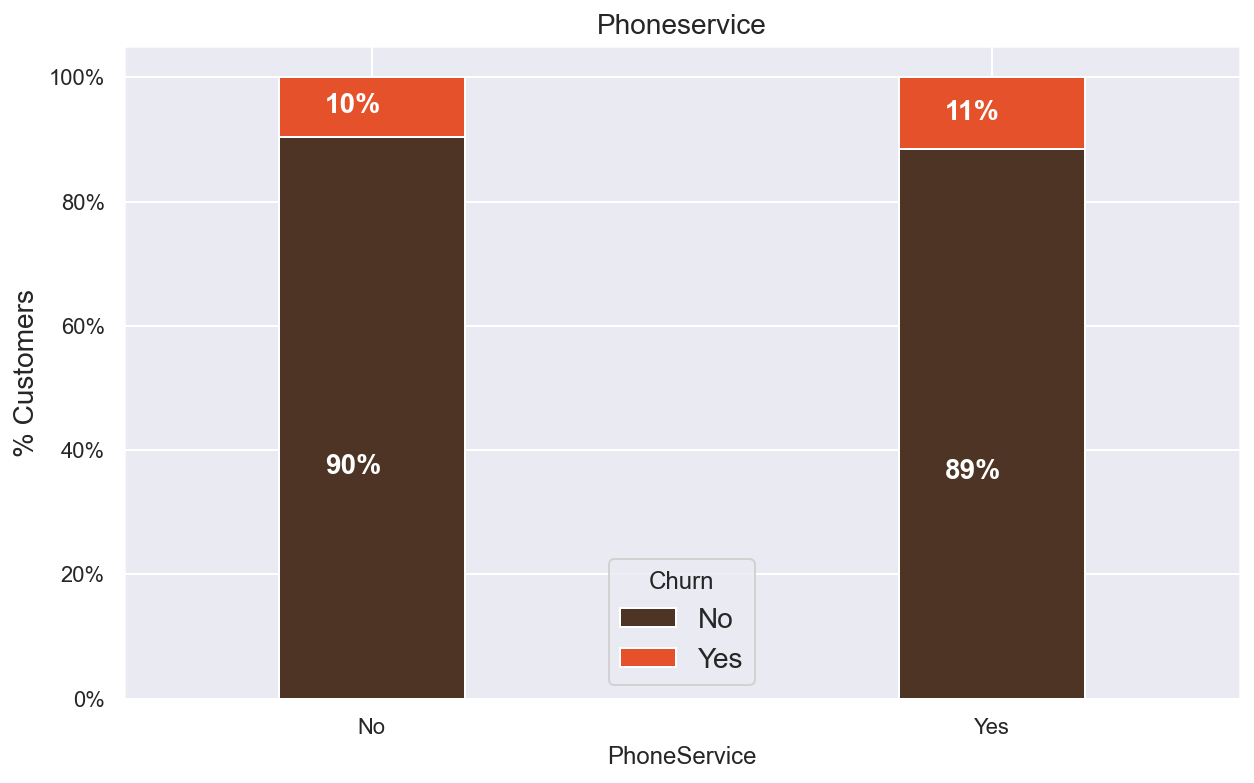

In [102]:
#Churn vs Phone service
#chisq for Phone service with churn
ctab5ii, chitest5ii, expected5ii = rp.crosstab(data5['PhoneService'],data5['Churn'],margins = False, test = "chi-square",expected_freqs= True)
print(ctab5ii)
print(chitest5ii)
print(expected5ii)


import matplotlib.ticker as mtick
colors = ['#4D3425','#E4512B']
contract_churn = data5.groupby(['PhoneService','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0, figsize = (10,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Phoneservice',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)
#There is no siginificant association between phone service and churn


                 Churn     
Churn               No  Yes
PaperlessBilling           
No                 625   48
Yes                681  118
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =   21.2900
1                    p-value =    0.0000
2               Cramer's phi =    0.1203
                      Churn          
Churn                    No       Yes
PaperlessBilling                     
No                597.10462  75.89538
Yes               708.89538  90.10462


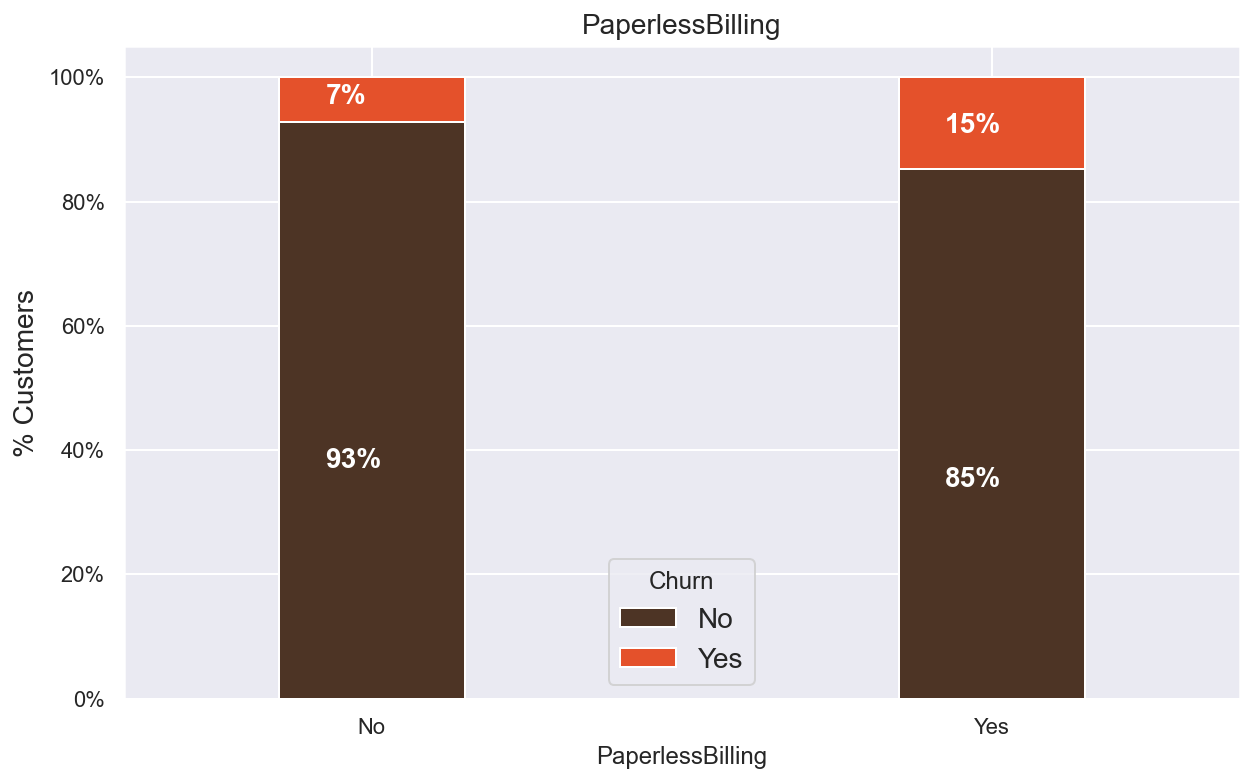

In [103]:
#Churn vs PaperlessBilling
#chisq for PaperlessBilling with churn
ctab5iii, chitest5iii, expected5iii = rp.crosstab(data5['PaperlessBilling'],data5['Churn'],margins = False, test = "chi-square",expected_freqs= True)
print(ctab5iii)
print(chitest5iii)
print(expected5iii)


import matplotlib.ticker as mtick
colors = ['#4D3425','#E4512B']
contract_churn = data5.groupby(['PaperlessBilling','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0, figsize = (10,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('PaperlessBilling',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)
#There is siginificant association between PaperlessBilling and churn


                          Churn    
Churn                        No Yes
PaymentMethod                      
Bank transfer (automatic)   353  38
Credit card (automatic)     357  41
Electronic check            283  64
Mailed check                313  23
                Chi-square test  results
0  Pearson Chi-square ( 3.0) =   25.7365
1                    p-value =    0.0000
2                 Cramer's V =    0.1322
                                Churn           
Churn                              No        Yes
PaymentMethod                                   
Bank transfer (automatic)  346.906250  44.093750
Credit card (automatic)    353.116848  44.883152
Electronic check           307.868207  39.131793
Mailed check               298.108696  37.891304


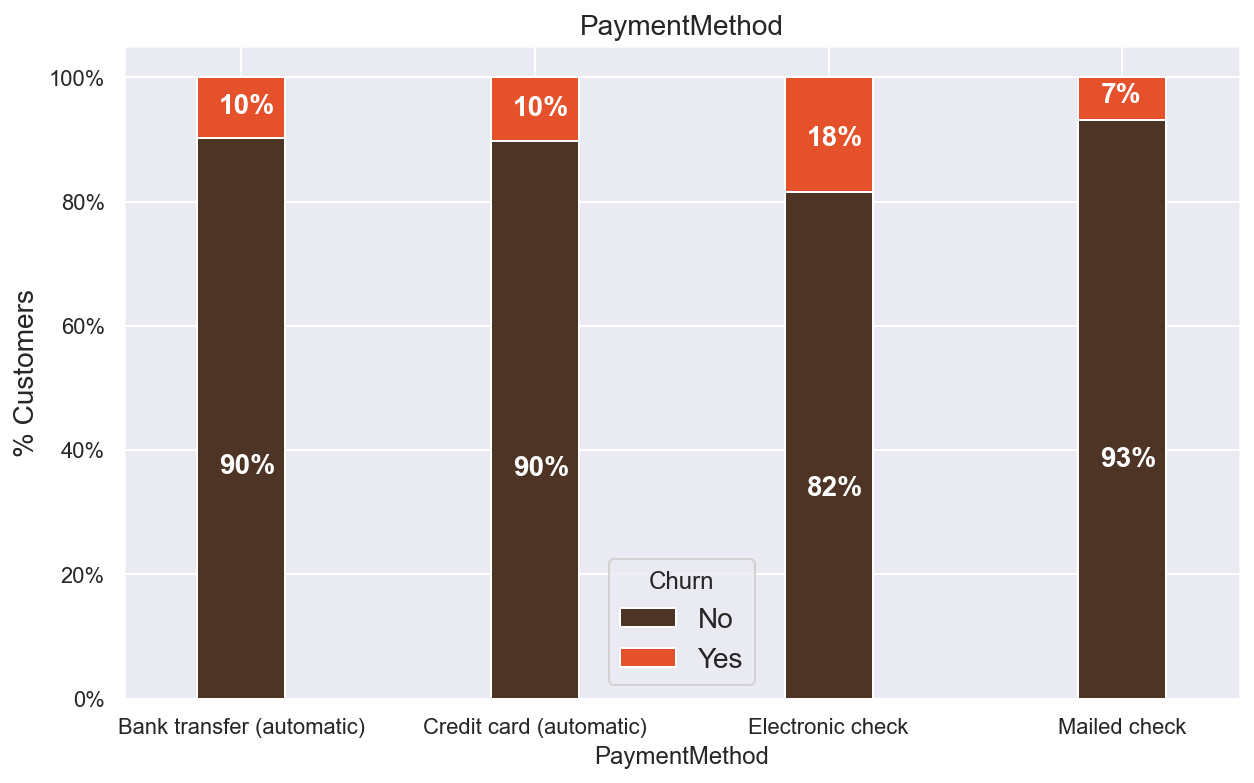

In [104]:
#Churn vs PaymentMethod
#chisq for PaymentMethod with churn
ctab5iv, chitest5iv, expected5iv = rp.crosstab(data5['PaymentMethod'],data5['Churn'],margins = False, test = "chi-square",expected_freqs= True)
print(ctab5iv)
print(chitest5iv)
print(expected5iv)


import matplotlib.ticker as mtick
colors = ['#4D3425','#E4512B']
contract_churn = data5.groupby(['PaymentMethod','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0, figsize = (10,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('PaymentMethod',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)
#There is siginificant association between PaymentMethod and churn


                     Churn    
Churn                   No Yes
customer_data.gender          
Female                 643  75
Male                   663  91
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    0.9686
1                    p-value =    0.3250
2               Cramer's phi =    0.0257
                           Churn           
Churn                         No        Yes
customer_data.gender                       
Female                637.029891  80.970109
Male                  668.970109  85.029891


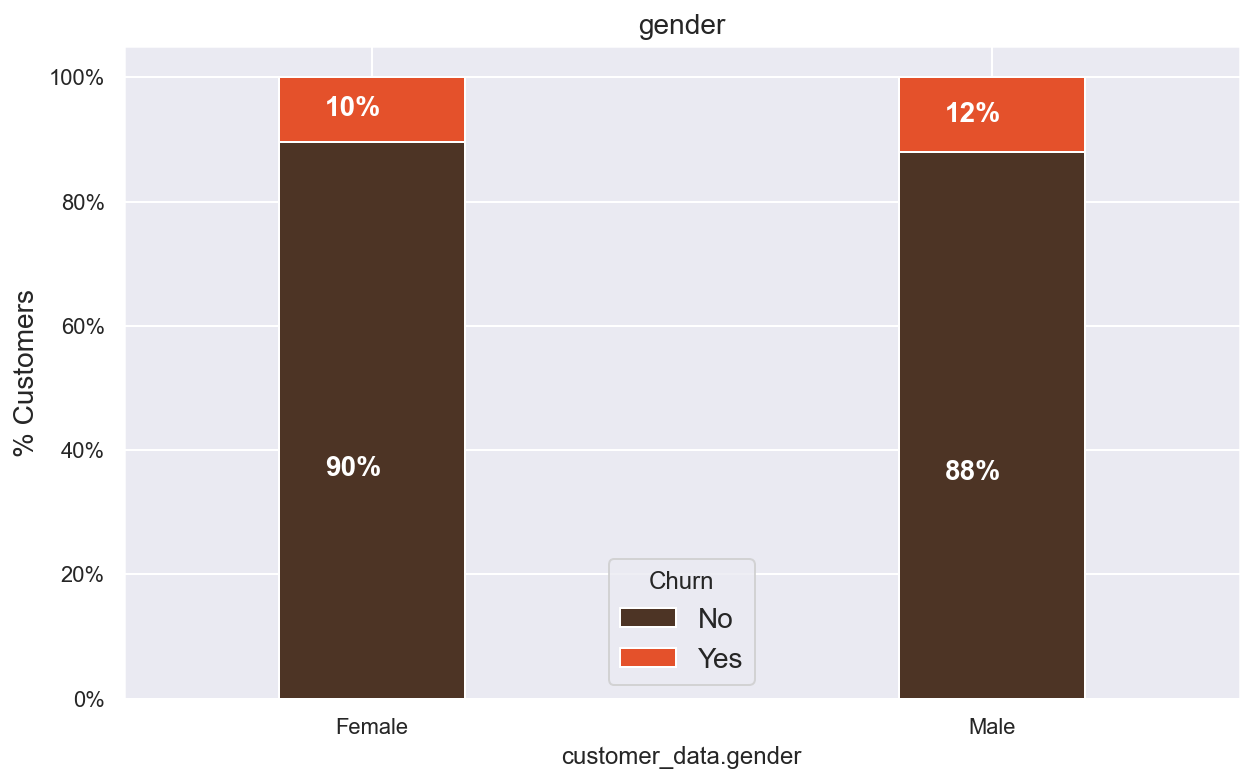

In [105]:
#Churn vs gender 
#chisq for gender with churn
ctab5v, chitest5v, expected5v = rp.crosstab(data5['customer_data.gender'],data5['Churn'],margins = False, test = "chi-square",expected_freqs= True)
print(ctab5v)
print(chitest5v)
print(expected5v)


import matplotlib.ticker as mtick
colors = ['#4D3425','#E4512B']
contract_churn = data5.groupby(['customer_data.gender','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0, figsize = (10,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('gender',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)
#There is no siginificant association between gender and churn


                      Churn    
Churn                    No Yes
customer_data.Partner          
No                      575  68
Yes                     731  98
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    0.5619
1                    p-value =    0.4535
2               Cramer's phi =    0.0195
                            Churn           
Churn                          No        Yes
customer_data.Partner                       
No                     570.487772  72.512228
Yes                    735.512228  93.487772


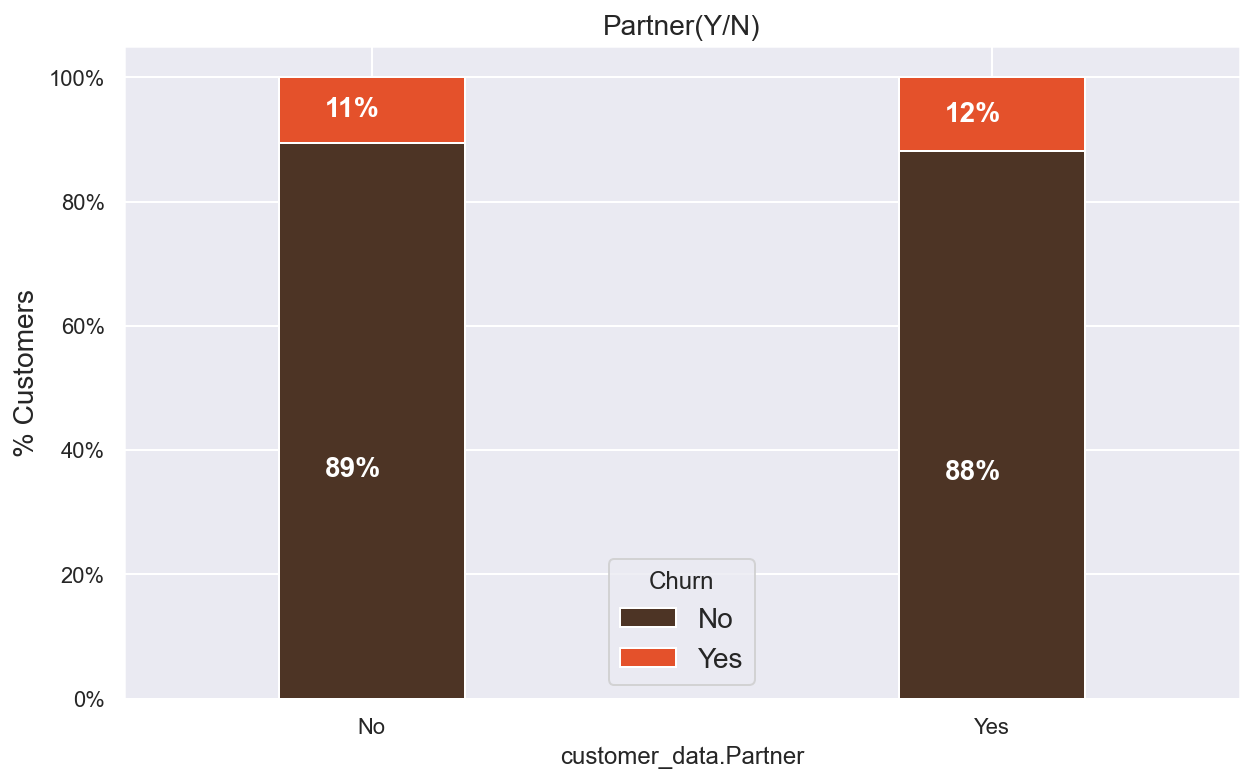

In [106]:
#Churn vs customer_data.Partner
#chisq for customer_data.Partner with churn
ctab5vi, chitest5vi, expected5vi = rp.crosstab(data5['customer_data.Partner'],data5['Churn'],margins = False, test = "chi-square",expected_freqs= True)
print(ctab5vi)
print(chitest5vi)
print(expected5vi)


import matplotlib.ticker as mtick
colors = ['#4D3425','#E4512B']
contract_churn = data5.groupby(['customer_data.Partner','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0, figsize = (10,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Partner(Y/N)',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)
#There is no siginificant association between Partner(Y/N) and churn


                         Churn     
Churn                       No  Yes
customer_data.Dependents           
No                         825  117
Yes                        481   49
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    3.4174
1                    p-value =    0.0645
2               Cramer's phi =    0.0482
                               Churn            
Churn                             No         Yes
customer_data.Dependents                        
No                        835.769022  106.230978
Yes                       470.230978   59.769022


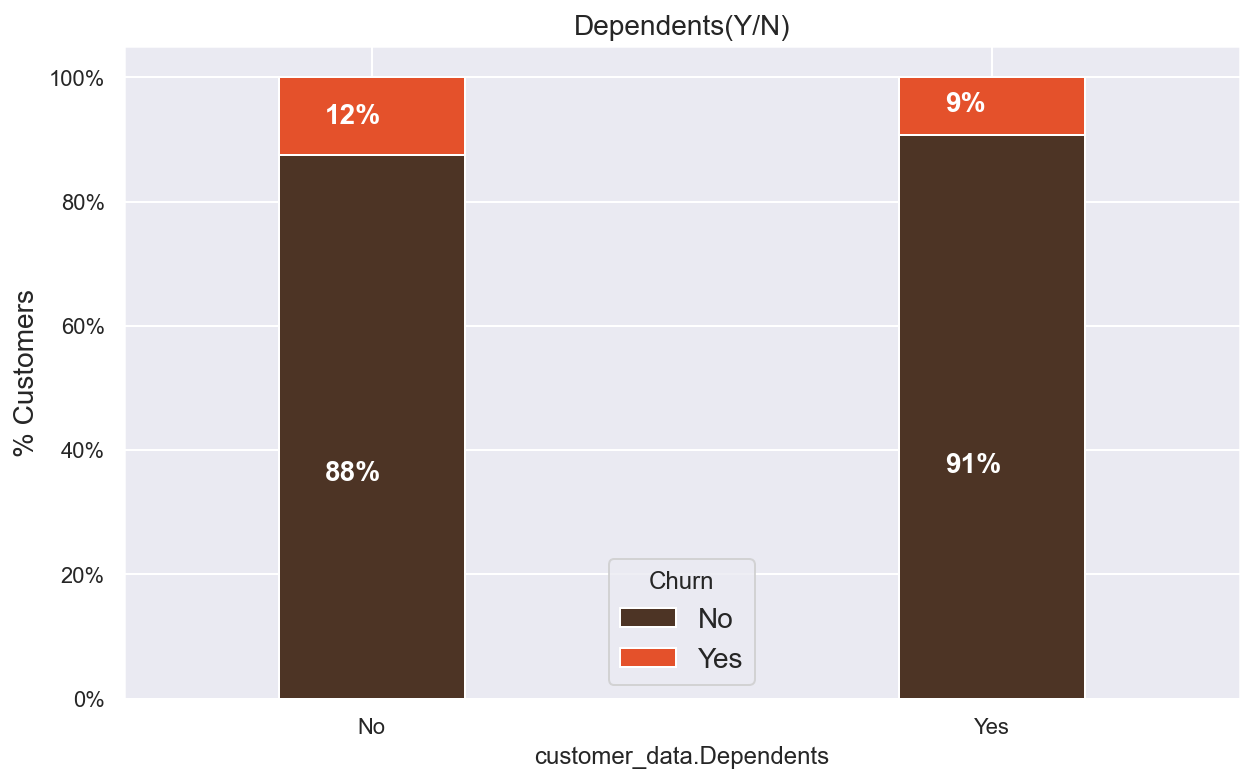

In [107]:
#customer_data.Dependents
#Churn vs customer_data.Dependents
#chisq for customer_data.Dependents with churn
ctab5vii, chitest5vii, expected5vii = rp.crosstab(data5['customer_data.Dependents'],data5['Churn'],margins = False, test = "chi-square",expected_freqs= True)
print(ctab5vii)
print(chitest5vii)
print(expected5vii)


import matplotlib.ticker as mtick
colors = ['#4D3425','#E4512B']
contract_churn = data5.groupby(['customer_data.Dependents','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0, figsize = (10,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Dependents(Y/N)',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)
#There is no siginificant association between Dependents(Y/N) and churn


                                Churn    
Churn                              No Yes
internet_data (2).MultipleLines          
No                                652  59
No phone service                  131  14
Yes                               523  93
                Chi-square test  results
0  Pearson Chi-square ( 2.0) =   15.6727
1                    p-value =    0.0004
2                 Cramer's V =    0.1032
                                      Churn           
Churn                                    No        Yes
internet_data (2).MultipleLines                       
No                               630.819293  80.180707
No phone service                 128.648098  16.351902
Yes                              546.532609  69.467391


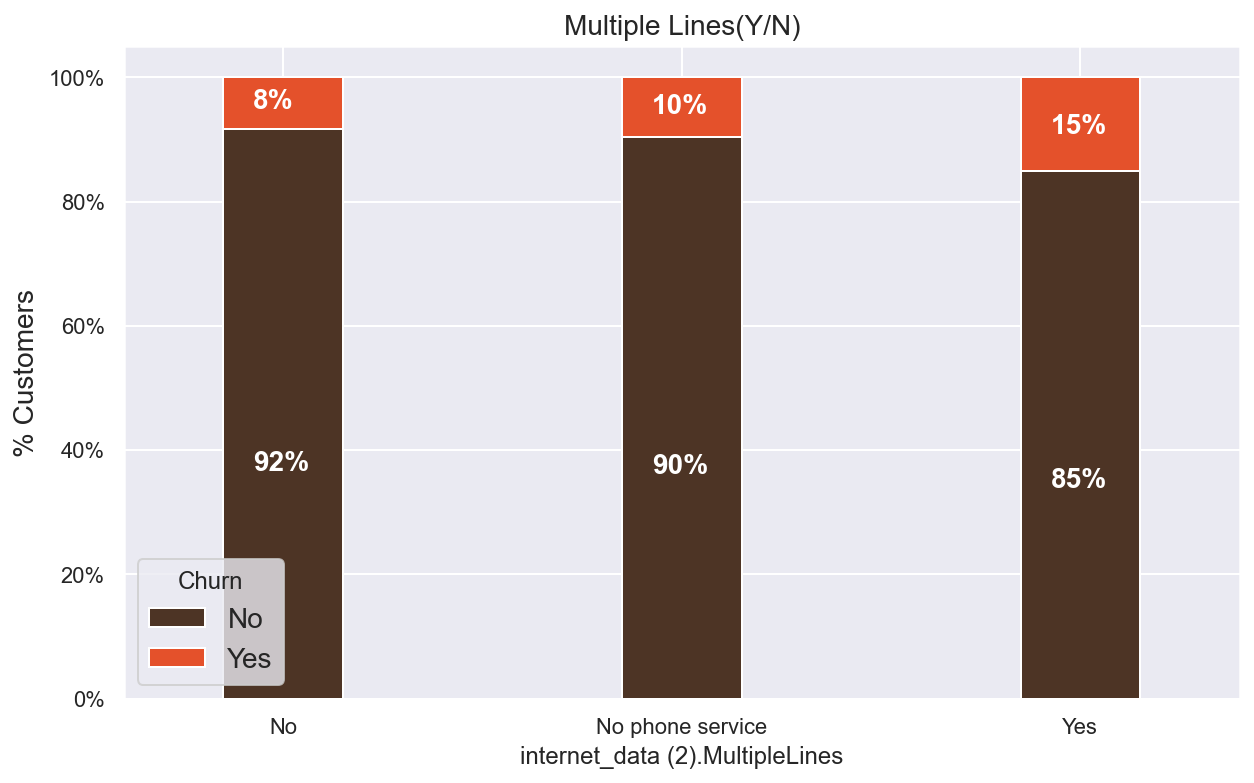

In [108]:
#internet_data (2).MultipleLines
#Churn vs internet_data (2).MultipleLines
#chisq for internet_data (2).MultipleLines with churn
ctab5viii, chitest5viii, expected5viii = rp.crosstab(data5['internet_data (2).MultipleLines'],data5['Churn'],margins = False, test = "chi-square",expected_freqs= True)
print(ctab5viii)
print(chitest5viii)
print(expected5viii)


import matplotlib.ticker as mtick
colors = ['#4D3425','#E4512B']
contract_churn = data5.groupby(['internet_data (2).MultipleLines','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0, figsize = (10,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Multiple Lines(Y/N)',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)
#There is siginificant association between Multiple Lines(Y/N) and churn


                                  Churn     
Churn                                No  Yes
internet_data (2).InternetService           
DSL                                 517   53
Fiber optic                         435  104
No                                  354    9
                Chi-square test  results
0  Pearson Chi-square ( 2.0) =   64.9437
1                    p-value =    0.0000
2                 Cramer's V =    0.2100
                                        Churn           
Churn                                      No        Yes
internet_data (2).InternetService                       
DSL                                505.720109  64.279891
Fiber optic                        478.216033  60.783967
No                                 322.063859  40.936141


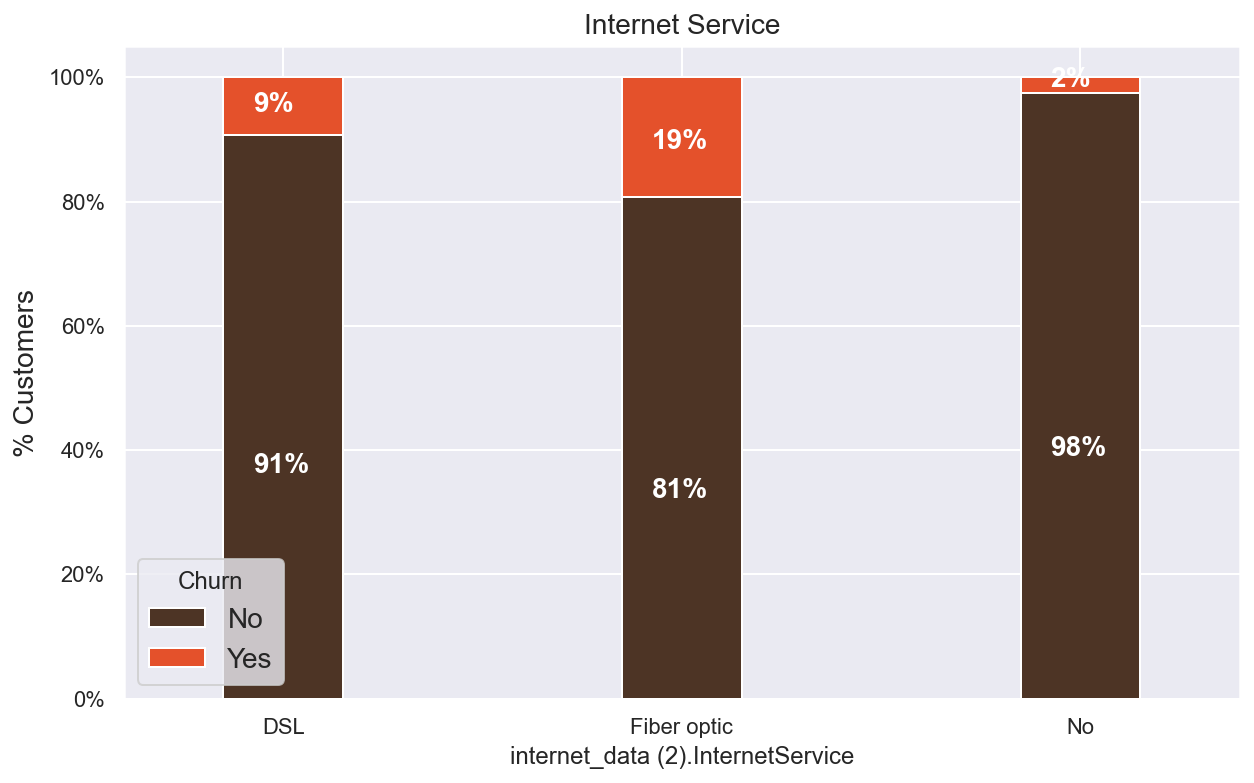

In [109]:
#internet_data (2).InternetService
#Churn vs internet_data (2).InternetService
#chisq for internet_data (2).InternetService
ctab5ix, chitest5ix, expected5ix = rp.crosstab(data5['internet_data (2).InternetService'],data5['Churn'],margins = False, test = "chi-square",expected_freqs= True)
print(ctab5ix)
print(chitest5ix)
print(expected5ix)


import matplotlib.ticker as mtick
colors = ['#4D3425','#E4512B']
contract_churn = data5.groupby(['internet_data (2).InternetService','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0, figsize = (10,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Internet Service',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)
#There is siginificant association between Internet Service and churn


In [110]:
##################################################### we have to segment data based on whether the user has internet service or not###################################

In [111]:
############ Not Having Internet service

In [112]:
#dataN = pd.read_excel(r"C:\Users\Heswanth Soor\Documents\Python Scripts\APAUR\telecom churn.xlsx", sheet_name= 'Final sheet')
#dataN = dataN[dataN['tenure']!=0]
#dataN = dataN[dataN['Contract']== 'One year']
#data_no_int = dataN[dataN['internet_data (2).InternetService']=="No"]
#data_no_int = data_no_int.iloc[:,1:14]
#data_no_int = pd.get_dummies(data_no_int,columns=['PhoneService','PaperlessBilling','PaymentMethod','customer_data.gender','customer_data.Partner','customer_data.Dependents','internet_data (2).MultipleLines'],drop_first=True)
#data5 = pd.get_dummies(data5,columns=['PhoneService','Contract','PaperlessBilling','PaymentMethod','customer_data.gender','customer_data.SeniorCitizen','customer_data.Partner','customer_data.Dependents','internet_data (2).MultipleLines','internet_data (2).InternetService'],drop_first=True)
#data_no_int['Churn'].replace(to_replace='Yes', value=1, inplace=True)
#data_no_int['Churn'].replace(to_replace='No',  value=0, inplace=True)
#data_no_int.tail()


In [113]:
#remove totalcharges column
#data_no_int = data_no_int.drop(['TotalCharges','Contract'],axis=1)
#data_no_int.head()


In [114]:
#Defining variables for logistic regression
#X = pd.DataFrame(data_no_int[['tenure','MonthlyCharges','customer_data.SeniorCitizen','PaperlessBilling_Yes','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check','customer_data.gender_Male','customer_data.Partner_Yes','customer_data.Dependents_Yes','internet_data (2).MultipleLines_Yes']])
#y = pd.DataFrame(data_no_int[['Churn']])

#print(X.head())
#print(y.head())


In [115]:
#Model fitting
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
#from sklearn import metrics
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=307)
#logreg = LogisticRegression()
#logreg.fit(X_train, y_train)
#logreg.coef_

#y_pred = logreg.predict(X_test)
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


In [116]:
#print(y_train['Churn'].value_counts())
#print(y_test['Churn'].value_counts())


In [117]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix)
#Overfitting problem due to class imbalance in the dataset


In [118]:
#Doing Oversampling technique (SMOTE) for oversampling the data
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state = 307)
#X_train_new,y_train_new = sm.fit_resample(X_train,y_train)


In [119]:
#logreg.fit(X_train_new, y_train_new)
#y_pred = logreg.predict(X_test)
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


In [120]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix)


In [121]:
#from sklearn.metrics import classification_report
#print(classification_report(y_test, y_pred))


In [122]:
#import matplotlib.pyplot as plt 
#plt.rc("font", size=14)
#import seaborn as sns
#sns.set(style="white")
#sns.set(style="whitegrid", color_codes=True)
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve
#logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
#fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
#plt.figure()
#plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
#plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic')
#plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
#plt.show()


In [123]:
#Adaboost
#from sklearn.ensemble import AdaBoostClassifier
#model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
#model.fit(X_train,y_train)
#y_pred1 = model.predict(X_test)
#metrics.accuracy_score(y_test, y_pred1)


In [124]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix = confusion_matrix(y_test, y_pred1)
#print(confusion_matrix)


In [125]:
#from sklearn.metrics import classification_report
#print(classification_report(y_test, y_pred1))


In [126]:
#Regression Model Output
#import numpy as np
#import statsmodels.api as sm

#X = sm.add_constant(X)

#model = sm.Logit(y, X)
#result = model.fit(method='newton')
#result.summary()


In [127]:
#the model doesnot fit well and also the count/percentage of customers leaving is very low

In [128]:
############ Having Internet service

In [129]:
dataN = pd.read_excel(r"C:\Users\Heswanth Soor\Documents\Python Scripts\APAUR\telecom churn.xlsx", sheet_name= 'Final sheet')
dataN = dataN[dataN['tenure']!=0]
dataN = dataN[dataN['Contract']== 'One year']
data_yes_int = dataN[dataN['internet_data (2).InternetService']!="No"]
data_yes_int = data_yes_int.iloc[:,1:]
data_yes_int = pd.get_dummies(data_yes_int,columns=['PaperlessBilling','PaymentMethod','customer_data.gender','customer_data.Partner','customer_data.Dependents','internet_data (2).MultipleLines','internet_data (2).InternetService','internet_data (2).OnlineSecurity','internet_data (2).OnlineBackup','internet_data (2).DeviceProtection','internet_data (2).TechSupport','internet_data (2).StreamingTV','internet_data (2).StreamingMovies'],drop_first=True)
data_yes_int['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data_yes_int['Churn'].replace(to_replace='No',  value=0, inplace=True)
data_yes_int.head()


,tenure,PhoneService,Contract,MonthlyCharges,TotalCharges,Churn,customer_data.SeniorCitizen,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,customer_data.Dependents_Yes,internet_data (2).MultipleLines_No phone service,internet_data (2).MultipleLines_Yes,internet_data (2).InternetService_Fiber optic,internet_data (2).OnlineSecurity_Yes,internet_data (2).OnlineBackup_Yes,internet_data (2).DeviceProtection_Yes,internet_data (2).TechSupport_Yes,internet_data (2).StreamingTV_Yes,internet_data (2).StreamingMovies_Yes
116,1,Yes,One year,74.10,74.10,0,0,0,1,0,...,0,0,0,0,0,0,1,1,1,1
547,1,No,One year,25.85,25.85,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
909,3,Yes,One year,69.95,220.45,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,1
1165,4,Yes,One year,105.65,443.90,1,0,1,0,1,...,0,0,0,1,0,1,1,1,1,1
1269,5,Yes,One year,70.00,347.40,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,1


In [130]:
#remove totalcharges column
data_yes_int = data_yes_int.drop(['TotalCharges','PhoneService','Contract'],axis=1)
data_yes_int.head()


,tenure,MonthlyCharges,Churn,customer_data.SeniorCitizen,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customer_data.gender_Male,customer_data.Partner_Yes,customer_data.Dependents_Yes,internet_data (2).MultipleLines_No phone service,internet_data (2).MultipleLines_Yes,internet_data (2).InternetService_Fiber optic,internet_data (2).OnlineSecurity_Yes,internet_data (2).OnlineBackup_Yes,internet_data (2).DeviceProtection_Yes,internet_data (2).TechSupport_Yes,internet_data (2).StreamingTV_Yes,internet_data (2).StreamingMovies_Yes
116,1,74.10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1
547,1,25.85,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
909,3,69.95,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1
1165,4,105.65,1,0,1,0,1,0,0,0,0,0,0,1,0,1,1,1,1,1
1269,5,70.00,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,1


In [131]:
#Defining variables for logistic regression
X1 = pd.DataFrame(data_yes_int[['tenure','MonthlyCharges','customer_data.SeniorCitizen','PaperlessBilling_Yes','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check','customer_data.gender_Male','customer_data.Partner_Yes','customer_data.Dependents_Yes','internet_data (2).MultipleLines_No phone service','internet_data (2).MultipleLines_Yes','internet_data (2).InternetService_Fiber optic','internet_data (2).OnlineSecurity_Yes','internet_data (2).OnlineBackup_Yes','internet_data (2).DeviceProtection_Yes','internet_data (2).TechSupport_Yes','internet_data (2).StreamingTV_Yes','internet_data (2).StreamingMovies_Yes']])
y1 = pd.DataFrame(data_yes_int[['Churn']])

print(X1.head())
print(y1.head())


      tenure  MonthlyCharges  customer_data.SeniorCitizen  \
116        1           74.10                            0   
547        1           25.85                            0   
909        3           69.95                            0   
1165       4          105.65                            0   
1269       5           70.00                            0   

      PaperlessBilling_Yes  PaymentMethod_Credit card (automatic)  \
116                      0                                      1   
547                      0                                      0   
909                      1                                      0   
1165                     1                                      0   
1269                     1                                      0   

      PaymentMethod_Electronic check  PaymentMethod_Mailed check  \
116                                0                           0   
547                                0                           1   
909           

In [132]:
#Model fitting
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X1_train, y1_train)
logreg.coef_

y1_pred = logreg.predict(X1_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X1_test, y1_test)))


Accuracy of logistic regression classifier on test set: 0.89


C:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [133]:
print(y1_train['Churn'].value_counts())
print(y1_test['Churn'].value_counts())


0    656
1    120
Name: Churn, dtype: int64
0    296
1     37
Name: Churn, dtype: int64


In [134]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y1_test, y1_pred)
print(confusion_matrix)
#overfitting problem

[[296   0]
 [ 37   0]]


In [135]:
#Doing Oversampling technique (SMOTE) for oversampling the data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 307)
X1_train_new,y1_train_new = sm.fit_resample(X1_train,y1_train)


In [136]:
logreg.fit(X1_train_new, y1_train_new)
y1_pred = logreg.predict(X1_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X1_test, y1_test)))


Accuracy of logistic regression classifier on test set: 0.79


C:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[249  47]
 [ 24  13]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.88       296
           1       0.22      0.35      0.27        37

    accuracy                           0.79       333
   macro avg       0.56      0.60      0.57       333
weighted avg       0.83      0.79      0.81       333



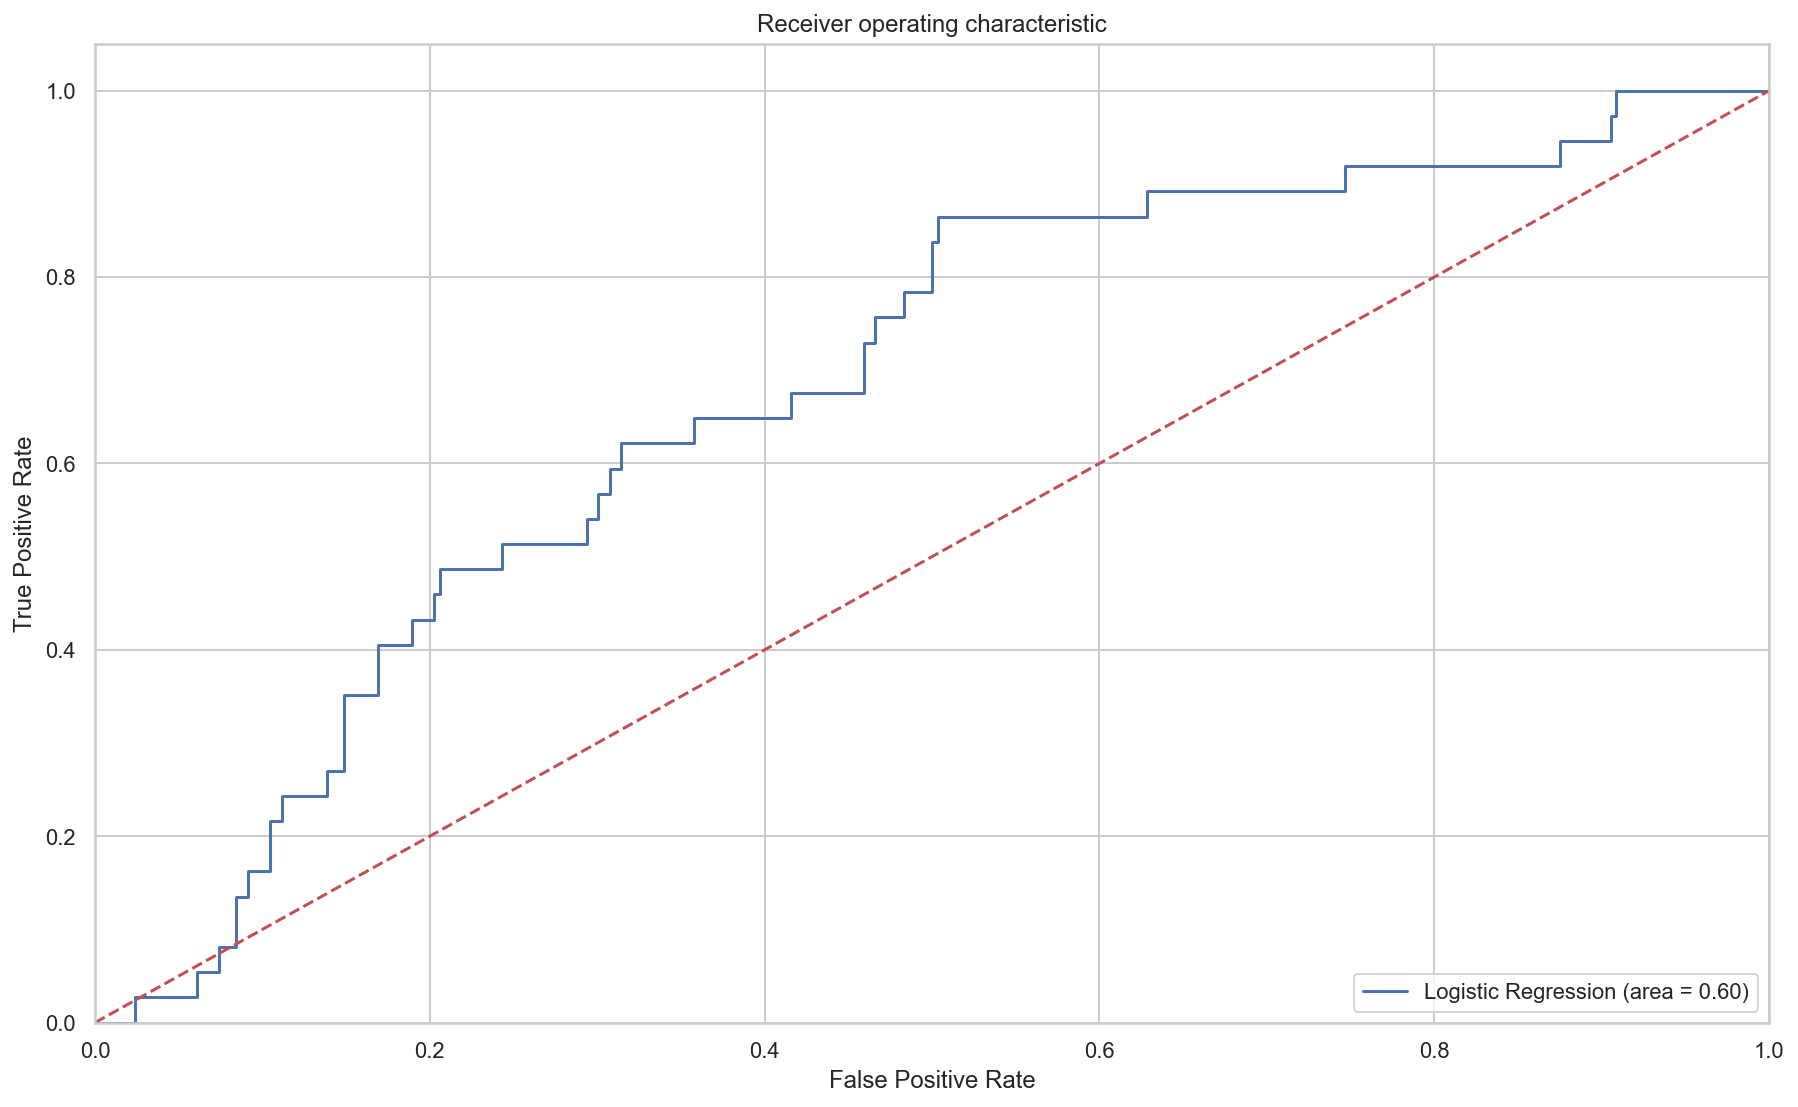

In [137]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y1_test, y1_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y1_test, y1_pred))
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y1_test, logreg.predict(X1_test))
fpr, tpr, thresholds = roc_curve(y1_test, logreg.predict_proba(X1_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [138]:
#Regression Model Output
import numpy as np
import statsmodels.api as sm

X1 = sm.add_constant(X1)

model = sm.Logit(y1, X1)
result = model.fit(method='newton')
result.summary()


Optimization terminated successfully.
         Current function value: 0.373531
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 1109
Model:                          Logit   Df Residuals:                     1089
Method:                           MLE   Df Model:                           19
Date:                Thu, 22 Dec 2022   Pseudo R-squ.:                 0.08404
Time:                        05:37:35   Log-Likelihood:                -414.25
converged:                       True   LL-Null:                       -452.25
Covariance Type:            nonrobust   LLR p-value:                 8.963e-09
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.5507      3.285     -0.776      0.438      -8.990       3.889
tenure                                              -0.0137      0.006     -2.130      0.033      -0.026      -0.001
MonthlyCharges                                      -0.0108      0.072     -0.149      0.882      -0.153       0.131
customer_data.SeniorCitizen                         -0.0309      0.244     -0.127      0.899      -0.509       0.448
PaperlessBilling_Yes                                 0.2908      0.207      1.402      0.161      -0.116       0.697
PaymentMethod_Credit card (automatic)                0.2279      0.257      0.885      0.376      -0.277       0.733
PaymentMethod_Electronic check                       0.5102      0.240      2.126      0.033       0.040       0.980
PaymentMethod_Mailed check                           0.4037      0.321      1.258      0.208      -0.225       1.033
customer_data.gender_Male                            0.2904      0.182      1.597      0.110      -0.066       0.647
customer_data.Partner_Yes                            0.1082      0.204      0.529      0.597      -0.292       0.509
customer_data.Dependents_Yes                        -0.2514      0.217     -1.159      0.246      -0.677       0.174
internet_data (2).MultipleLines_No phone service    -0.1977      1.475     -0.134      0.893      -3.089       2.693
internet_data (2).MultipleLines_Yes                  0.1433      0.423      0.339      0.735      -0.685       0.972
internet_data (2).InternetService_Fiber optic        0.7859      1.835      0.428      0.669      -2.812       4.383
internet_data (2).OnlineSecurity_Yes                -0.2002      0.414     -0.483      0.629      -1.012       0.611
internet_data (2).OnlineBackup_Yes                   0.2314      0.414      0.558      0.577      -0.581       1.044
internet_data (2).DeviceProtection_Yes              -0.1018      0.405     -0.251      0.802      -0.896       0.692
internet_data (2).TechSupport_Yes                    0.1015      0.412      0.246      0.806      -0.707       0.910
internet_data (2).StreamingTV_Yes                    0.6079      0.755      0.805      0.421      -0.872       2.088
internet_data (2).StreamingMovies_Yes                1.0370      0.754      1.375      0.169      -0.442       2.516
====================================================================================================================
"""

In [139]:
def stepwise_selection(X1, y1,SL_in=0.05,SL_out = 0.05):
    initial_features = X1.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.Logit(y1, X1[best_features+[new_column]]).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = X1[best_features]
                p_values = sm.Logit(y1, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

stepwise_selection(X1,y1)


Optimization terminated successfully.
         Current function value: 0.638420
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.570944
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.539425
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.545937
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.644024
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.531033
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.567690
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594642
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572508
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.538596
  

<ipython-input-139-2452c1fe0cde>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-139-2452c1fe0cde>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-139-2452c1fe0cde>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Optimization terminated successfully.
         Current function value: 0.386808
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.389398
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.389750
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.389822
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.389354
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.389773
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.385463
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.385437
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.387632
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.389450
  

<ipython-input-139-2452c1fe0cde>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-139-2452c1fe0cde>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-139-2452c1fe0cde>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Optimization terminated successfully.
         Current function value: 0.382558
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.382310
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.382177
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.380434
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.378574
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.380267
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.380302
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.380380
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.379238
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.380142
  

<ipython-input-139-2452c1fe0cde>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


['const',
 'internet_data (2).StreamingMovies_Yes',
 'internet_data (2).InternetService_Fiber optic',
 'internet_data (2).StreamingTV_Yes',
 'tenure',
 'PaymentMethod_Electronic check']

In [140]:
#Refitting
#Defining variables for logistic regression
X1 = pd.DataFrame(data_yes_int[['internet_data (2).StreamingMovies_Yes','internet_data (2).InternetService_Fiber optic','internet_data (2).StreamingTV_Yes','tenure','PaymentMethod_Electronic check']])
y1 = pd.DataFrame(data_yes_int[['Churn']])

print(X1.head())
print(y1.head())


      internet_data (2).StreamingMovies_Yes  \
116                                       1   
547                                       0   
909                                       1   
1165                                      1   
1269                                      1   

      internet_data (2).InternetService_Fiber optic  \
116                                               0   
547                                               0   
909                                               0   
1165                                              1   
1269                                              0   

      internet_data (2).StreamingTV_Yes  tenure  \
116                                   1       1   
547                                   0       1   
909                                   1       3   
1165                                  1       4   
1269                                  1       5   

      PaymentMethod_Electronic check  
116                                0  
5

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.4, random_state=0)
logreg = LogisticRegression()
logreg.fit(X1_train, y1_train)
logreg.coef_
y1_pred = logreg.predict(X1_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X1_test, y1_test)))


Accuracy of logistic regression classifier on test set: 0.89


C:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [142]:
print(y1_train['Churn'].value_counts())
print(y1_test['Churn'].value_counts())


0    558
1    107
Name: Churn, dtype: int64
0    394
1     50
Name: Churn, dtype: int64


In [143]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y1_test, y1_pred)
print(confusion_matrix)


[[394   0]
 [ 50   0]]


In [144]:
#Doing Oversampling technique (SMOTE) for oversampling the data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 307)
X1_train_new,y1_train_new = sm.fit_resample(X1_train,y1_train)


In [145]:
logreg.fit(X1_train_new, y1_train_new)
y1_pred = logreg.predict(X1_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X1_test, y1_test)))


Accuracy of logistic regression classifier on test set: 0.48


C:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[172 222]
 [  8  42]]
              precision    recall  f1-score   support

           0       0.96      0.44      0.60       394
           1       0.16      0.84      0.27        50

    accuracy                           0.48       444
   macro avg       0.56      0.64      0.43       444
weighted avg       0.87      0.48      0.56       444



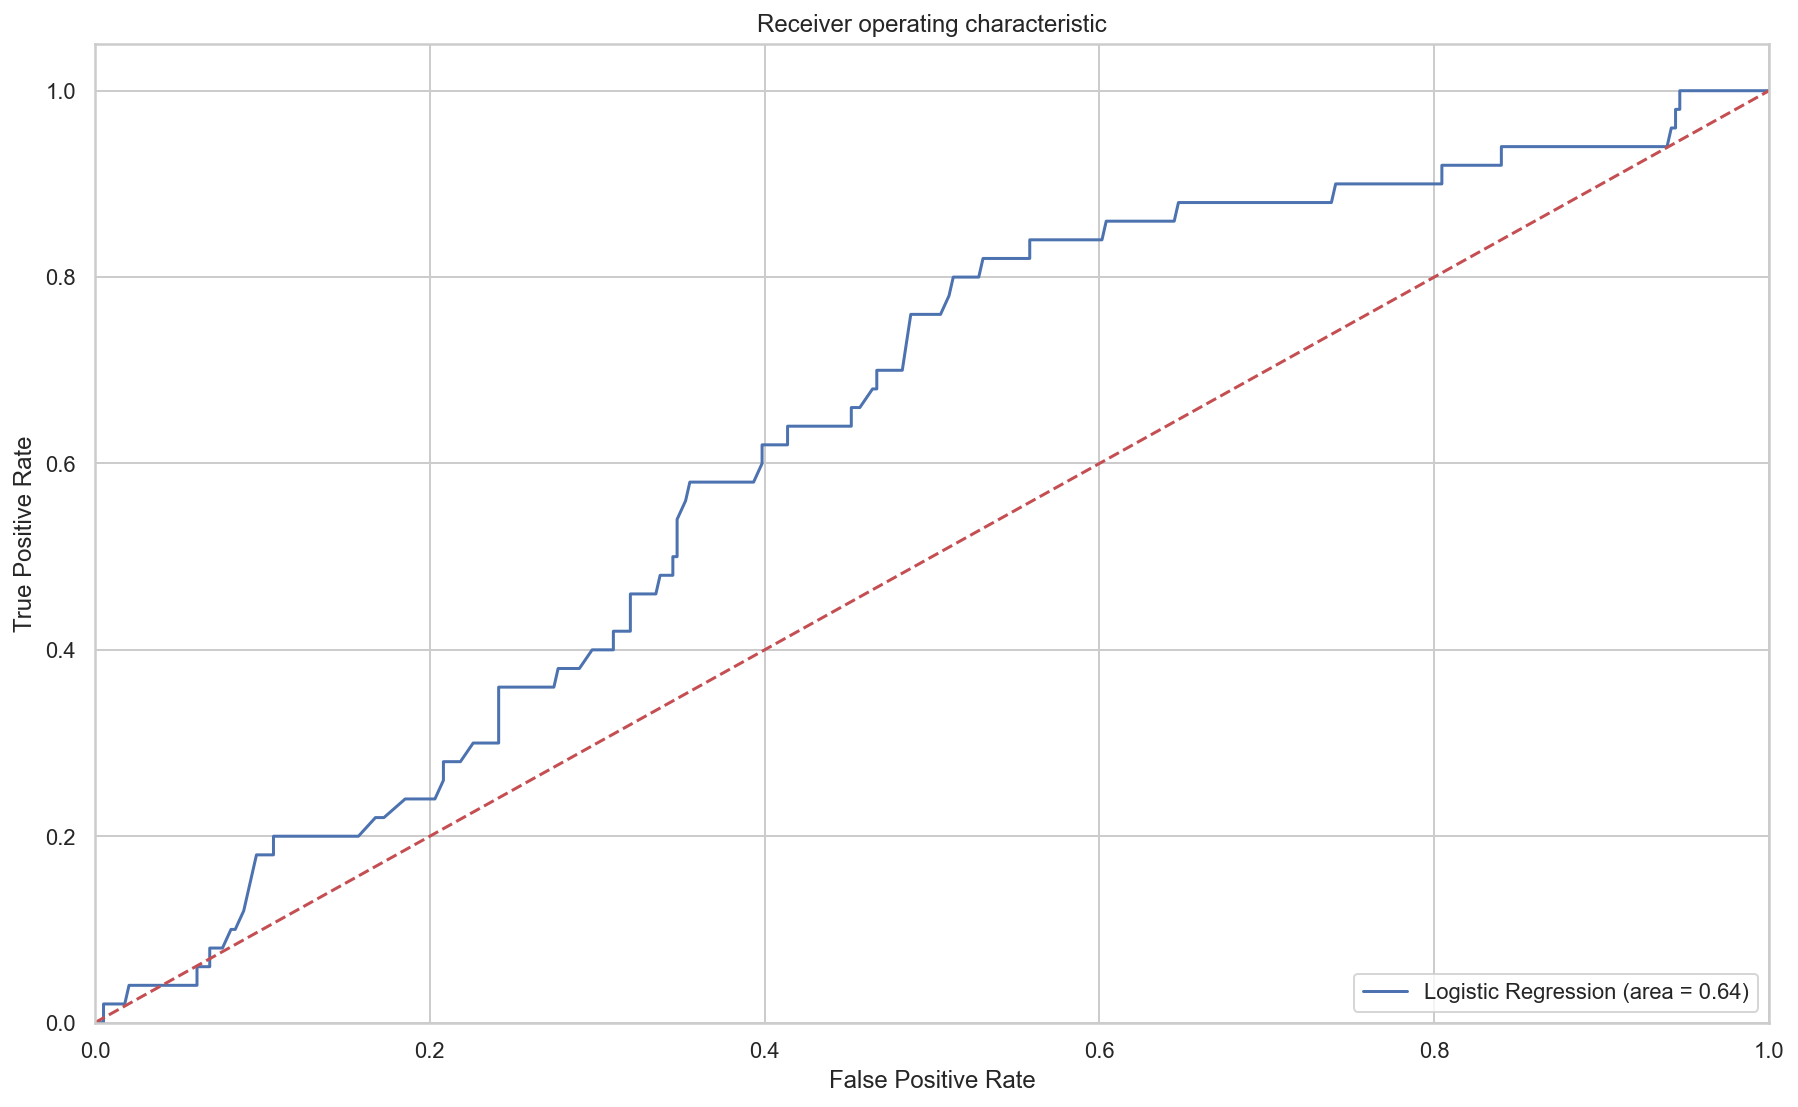

In [146]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y1_test, y1_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y1_test, y1_pred))
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y1_test, logreg.predict(X1_test))
fpr, tpr, thresholds = roc_curve(y1_test, logreg.predict_proba(X1_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [147]:
#Regression Model Output
import numpy as np
import statsmodels.api as sm

X1 = sm.add_constant(X1)

model = sm.Logit(y1, X1)
result = model.fit(method='newton')
result.summary()


Optimization terminated successfully.
         Current function value: 0.378574
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 1109
Model:                          Logit   Df Residuals:                     1103
Method:                           MLE   Df Model:                            5
Date:                Thu, 22 Dec 2022   Pseudo R-squ.:                 0.07167
Time:                        05:37:36   Log-Likelihood:                -419.84
converged:                       True   LL-Null:                       -452.25
Covariance Type:            nonrobust   LLR p-value:                 1.218e-12
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.6948      0.303     -8.884      0.000      -3.289      -2.100
internet_data (2).StreamingMovies_Yes             0.9166      0.233      3.933      0.000       0.460       1.373
internet_data (2).InternetService_Fiber optic     0.5788      0.206      2.811      0.005       0.175       0.982
internet_data (2).StreamingTV_Yes                 0.5266      0.219      2.408      0.016       0.098       0.955
tenure                                           -0.0120      0.006     -2.161      0.031      -0.023      -0.001
PaymentMethod_Electronic check                    0.3813      0.186      2.051      0.040       0.017       0.746
=================================================================================================================
"""

In [148]:
#######################################################Two year############################################################

In [149]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)
data5 = pd.read_excel(r"C:\Users\Heswanth Soor\Documents\Python Scripts\APAUR\telecom churn.xlsx", sheet_name= 'Final sheet')
data5 = data5[data5['tenure']!=0]
data5.dropna(inplace =  True)
data5 = data5[data5['Contract']=='Two year']
data5.head()


,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customer_data.gender,...,customer_data.Partner,customer_data.Dependents,internet_data (2).MultipleLines,internet_data (2).InternetService,internet_data (2).OnlineSecurity,internet_data (2).OnlineBackup,internet_data (2).DeviceProtection,internet_data (2).TechSupport,internet_data (2).StreamingTV,internet_data (2).StreamingMovies
251,8559-WNQZS,1,Yes,Two year,No,Mailed check,20.45,20.45,No,Male,...,No,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
536,1099-GODLO,1,Yes,Two year,No,Mailed check,20.35,20.35,No,Female,...,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
746,4854-SSLTN,2,Yes,Two year,No,Mailed check,59.50,130.50,No,Male,...,Yes,Yes,No,DSL,Yes,Yes,No,Yes,No,No
884,0323-XWWTN,3,Yes,Two year,Yes,Mailed check,26.40,121.25,No,Male,...,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
953,1407-DIGZV,3,Yes,Two year,No,Mailed check,19.10,52.00,No,Female,...,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service


In [150]:
data5.shape[0]

1685

No     97.151335
Yes     2.848665
Name: Churn, dtype: float64


<AxesSubplot:>

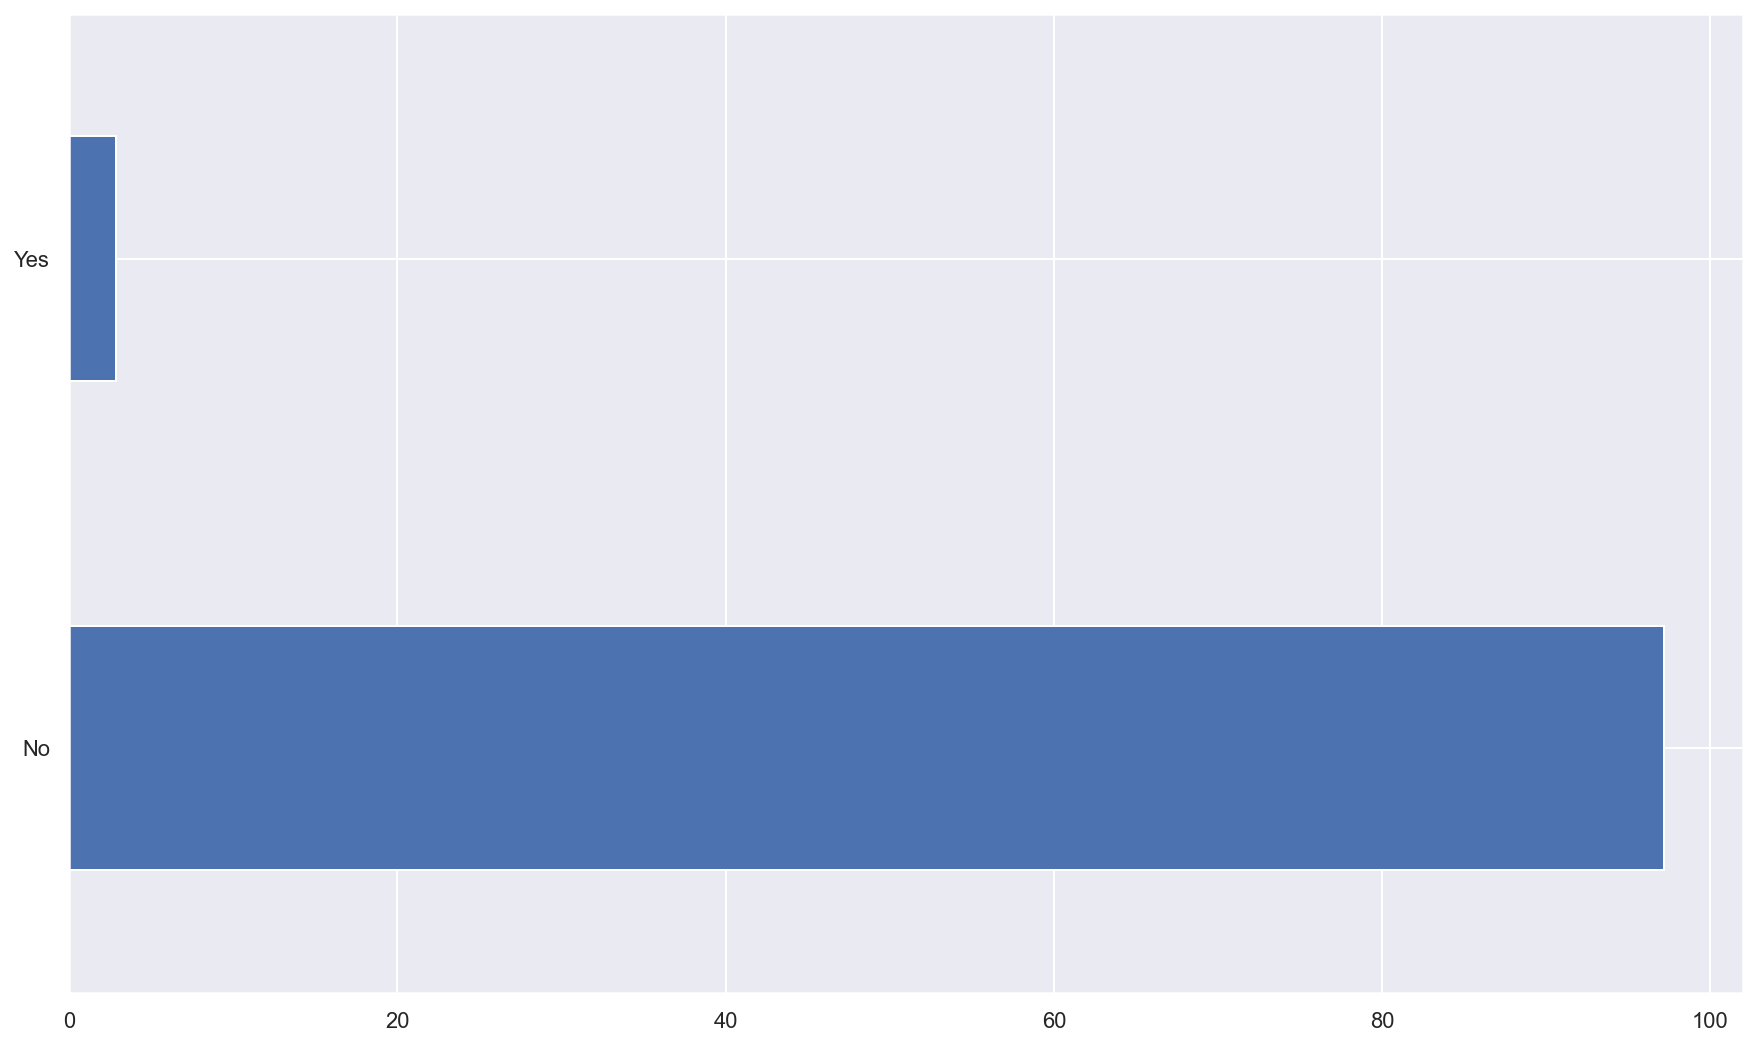

In [151]:
#Checking Balance of the data
churncol = data5['Churn'].value_counts(normalize = True)*100
print(churncol)
churncol.plot(kind = 'barh',)


In [152]:
#Checking association between churn and other independent variables

Ttest_indResult(statistic=1.6656577911077497, pvalue=0.09596769742544183)


<AxesSubplot:xlabel='Churn', ylabel='tenure'>

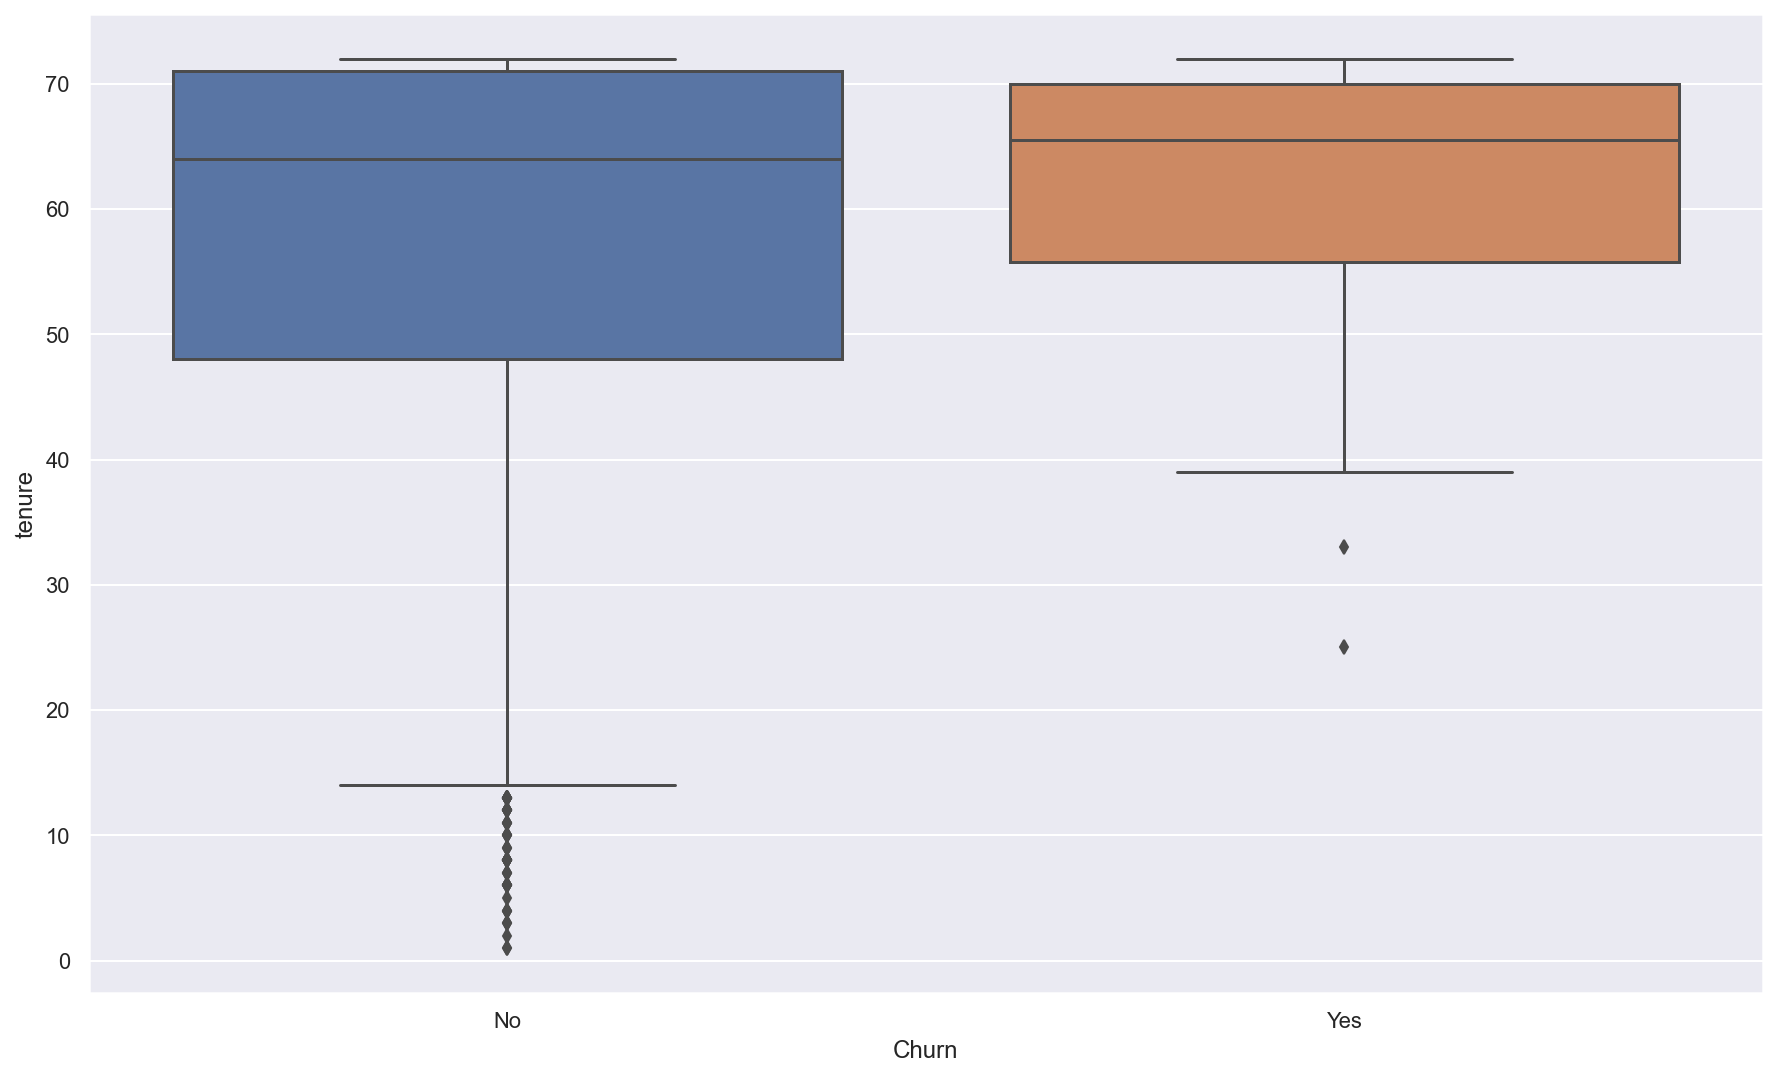

In [153]:
#Churn vs Tenure
#T-test for tenure with churn
from scipy.stats import ttest_ind
cat1 = data5[data5['Churn']=='Yes']
cat2 = data5[data5['Churn']=='No']
print(ttest_ind(cat1['tenure'], cat2['tenure']))
#There is no sigificant difference
sns.boxplot(x = data5.Churn, y = data5.tenure)


Ttest_indResult(statistic=5.287387357701177, pvalue=1.4030815881733132e-07)


<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

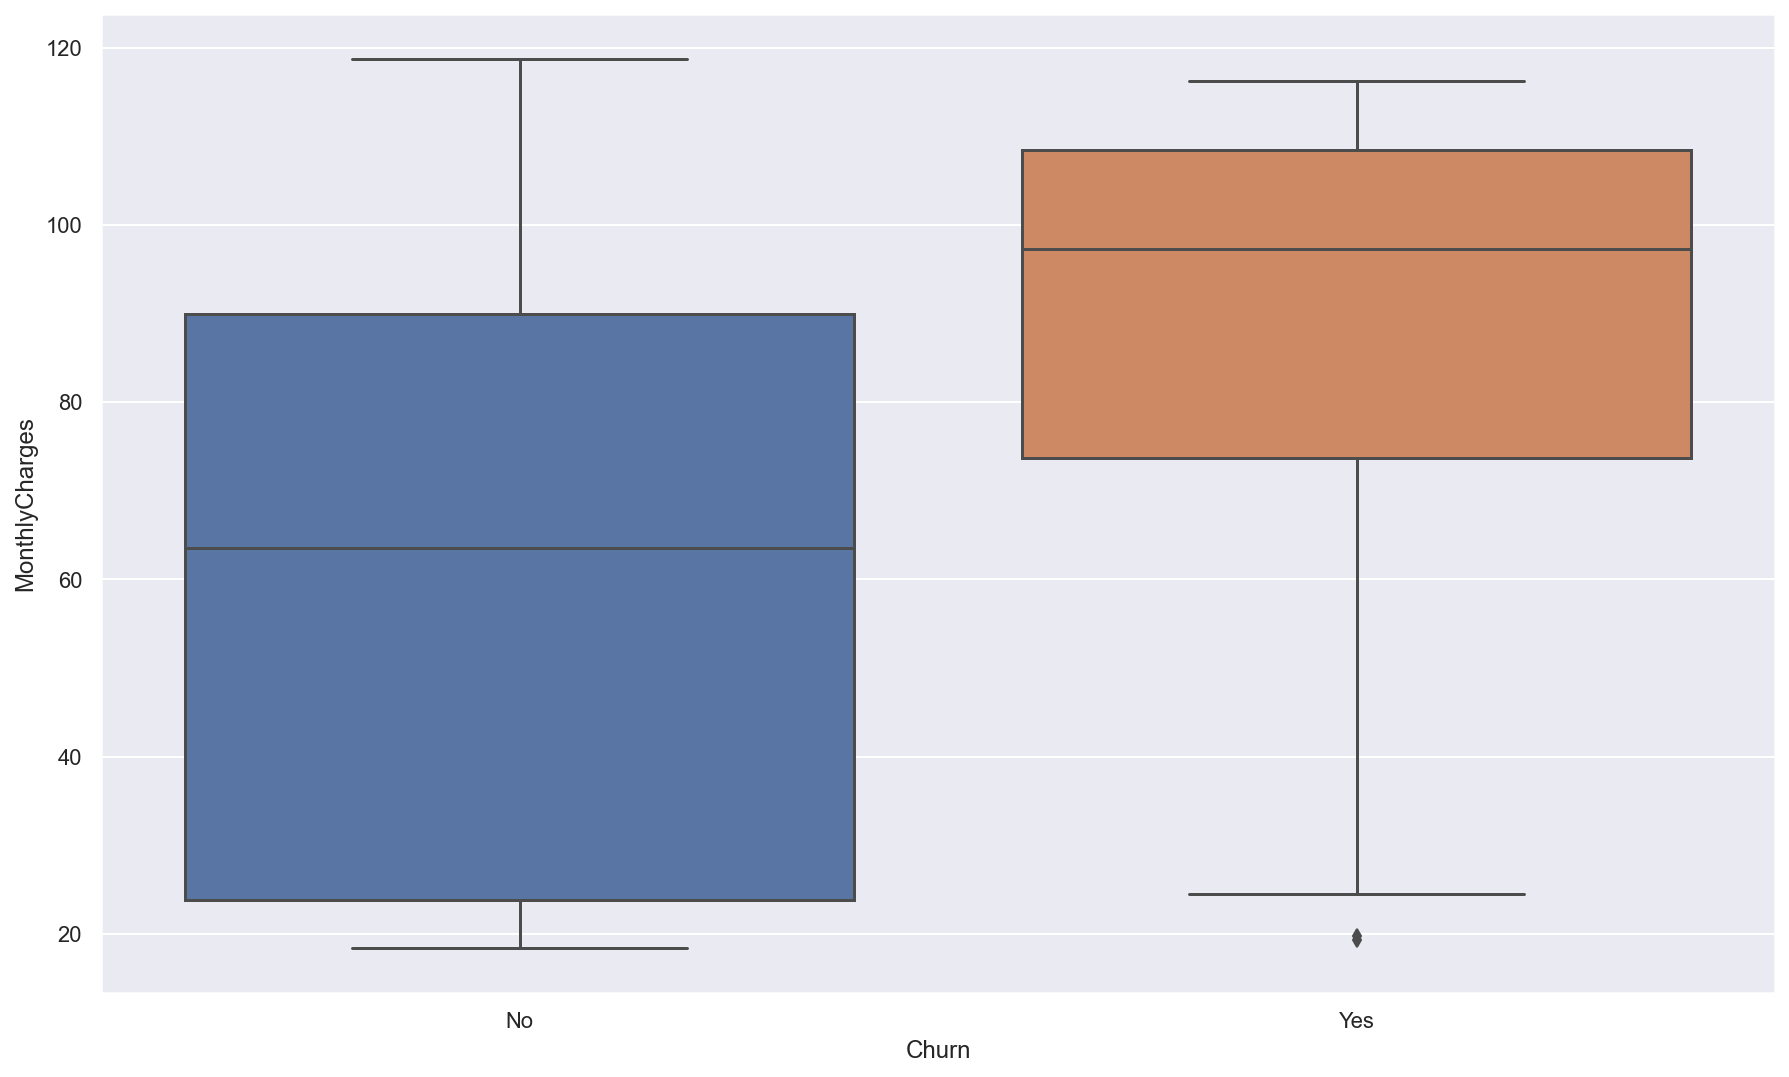

In [154]:
#Churn vsMonthly charges
#T-test for monthly charges with churn
cat1 = data5[data5['Churn']=='Yes']
cat2 = data5[data5['Churn']=='No']
print(ttest_ind(cat1['MonthlyCharges'], cat2['MonthlyCharges']))
#There is sigificant difference
sns.boxplot(x = data5.Churn, y = data5.MonthlyCharges)


             Churn    
Churn           No Yes
PhoneService          
No             156   3
Yes           1481  45
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    0.5869
1                    p-value =    0.4436
2               Cramer's phi =    0.0187
                    Churn           
Churn                  No        Yes
PhoneService                        
No             154.470623   4.529377
Yes           1482.529377  43.470623


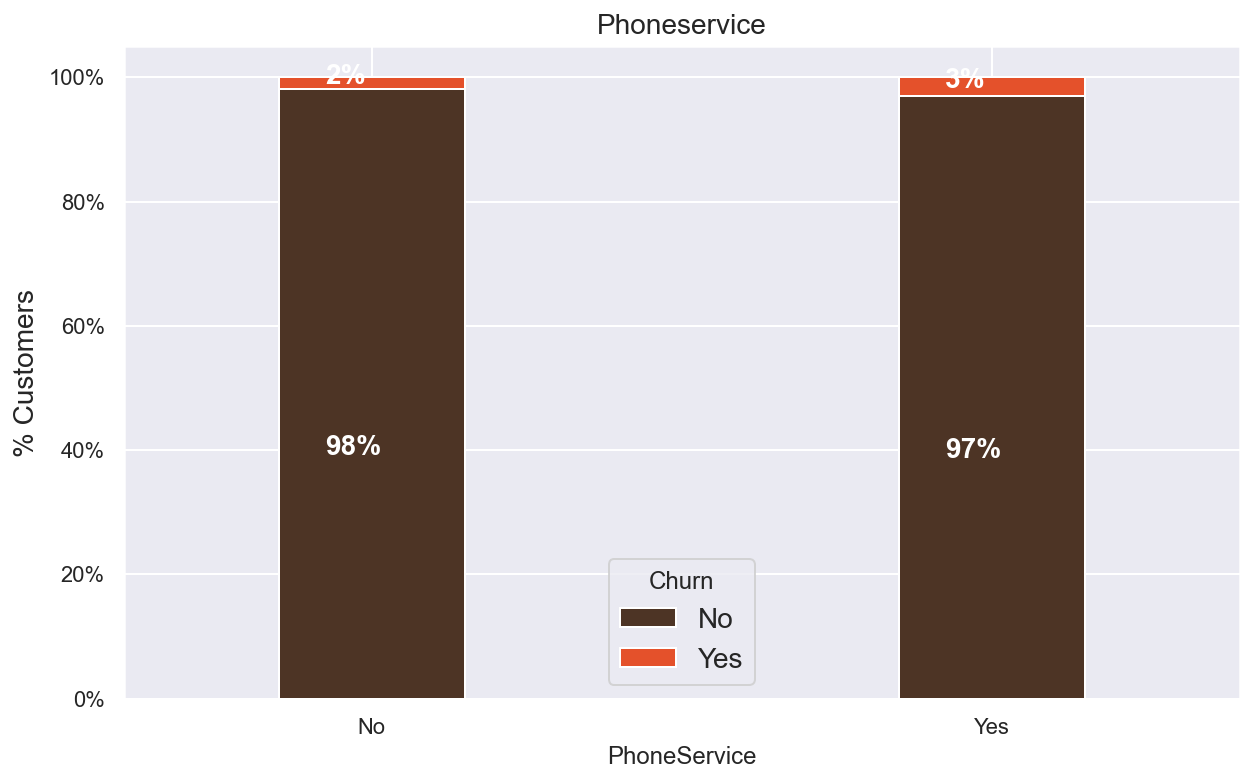

In [155]:
#Churn vs Phone service
#chisq for Phone service with churn
ctab5ii, chitest5ii, expected5ii = rp.crosstab(data5['PhoneService'],data5['Churn'],margins = False, test = "chi-square",expected_freqs= True)
print(ctab5ii)
print(chitest5ii)
print(expected5ii)


import matplotlib.ticker as mtick
colors = ['#4D3425','#E4512B']
contract_churn = data5.groupby(['PhoneService','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0, figsize = (10,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Phoneservice',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)
#There is no siginificant association between phone service and churn


                 Churn    
Churn               No Yes
PaperlessBilling          
No                 887  15
Yes                750  33
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    9.8605
1                    p-value =    0.0017
2               Cramer's phi =    0.0765
                       Churn           
Churn                     No        Yes
PaperlessBilling                       
No                876.305045  25.694955
Yes               760.694955  22.305045


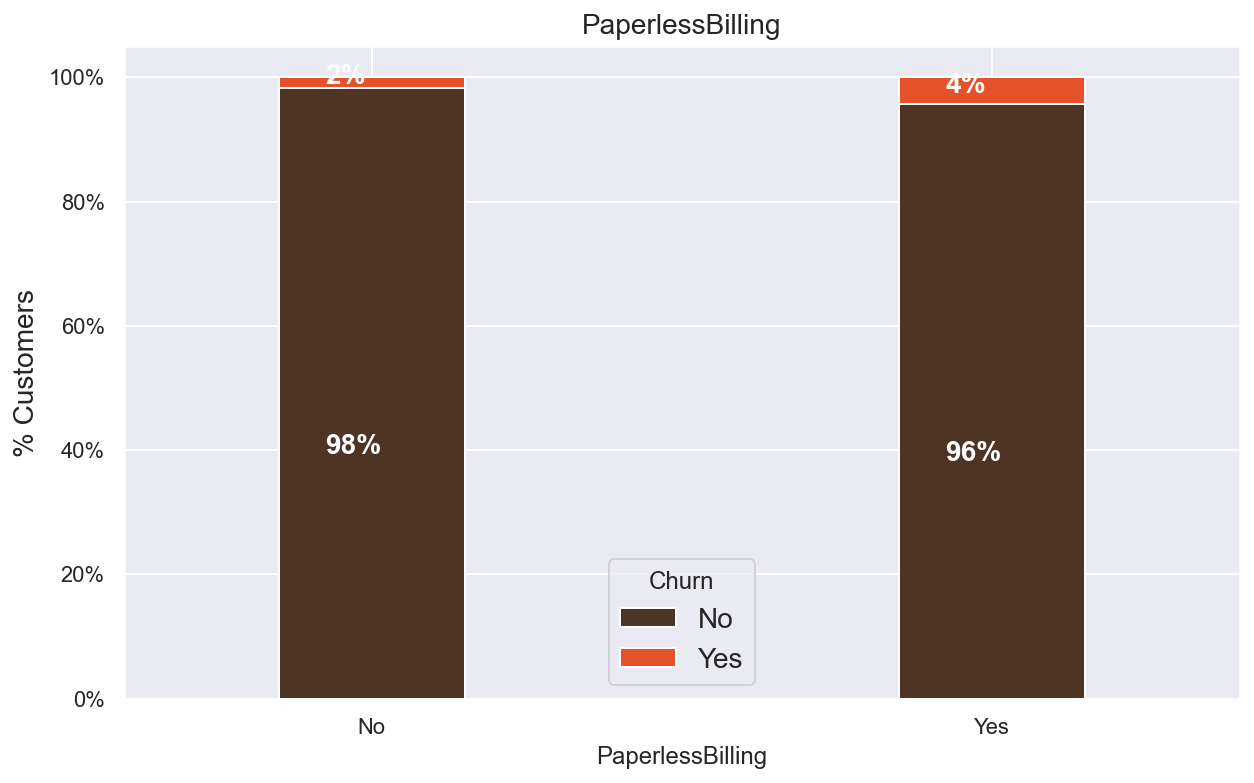

In [156]:
#Churn vs PaperlessBilling
#chisq for PaperlessBilling with churn
ctab5iii, chitest5iii, expected5iii = rp.crosstab(data5['PaperlessBilling'],data5['Churn'],margins = False, test = "chi-square",expected_freqs= True)
print(ctab5iii)
print(chitest5iii)
print(expected5iii)


import matplotlib.ticker as mtick
colors = ['#4D3425','#E4512B']
contract_churn = data5.groupby(['PaperlessBilling','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0, figsize = (10,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('PaperlessBilling',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)
#There is siginificant association between PaperlessBilling and churn


                          Churn    
Churn                        No Yes
PaymentMethod                      
Bank transfer (automatic)   543  19
Credit card (automatic)     567  13
Electronic check            155  13
Mailed check                372   3
                Chi-square test  results
0  Pearson Chi-square ( 3.0) =   21.5472
1                    p-value =    0.0001
2                 Cramer's V =    0.1131
                                Churn           
Churn                              No        Yes
PaymentMethod                                   
Bank transfer (automatic)  545.990504  16.009496
Credit card (automatic)    563.477745  16.522255
Electronic check           163.214243   4.785757
Mailed check               364.317507  10.682493


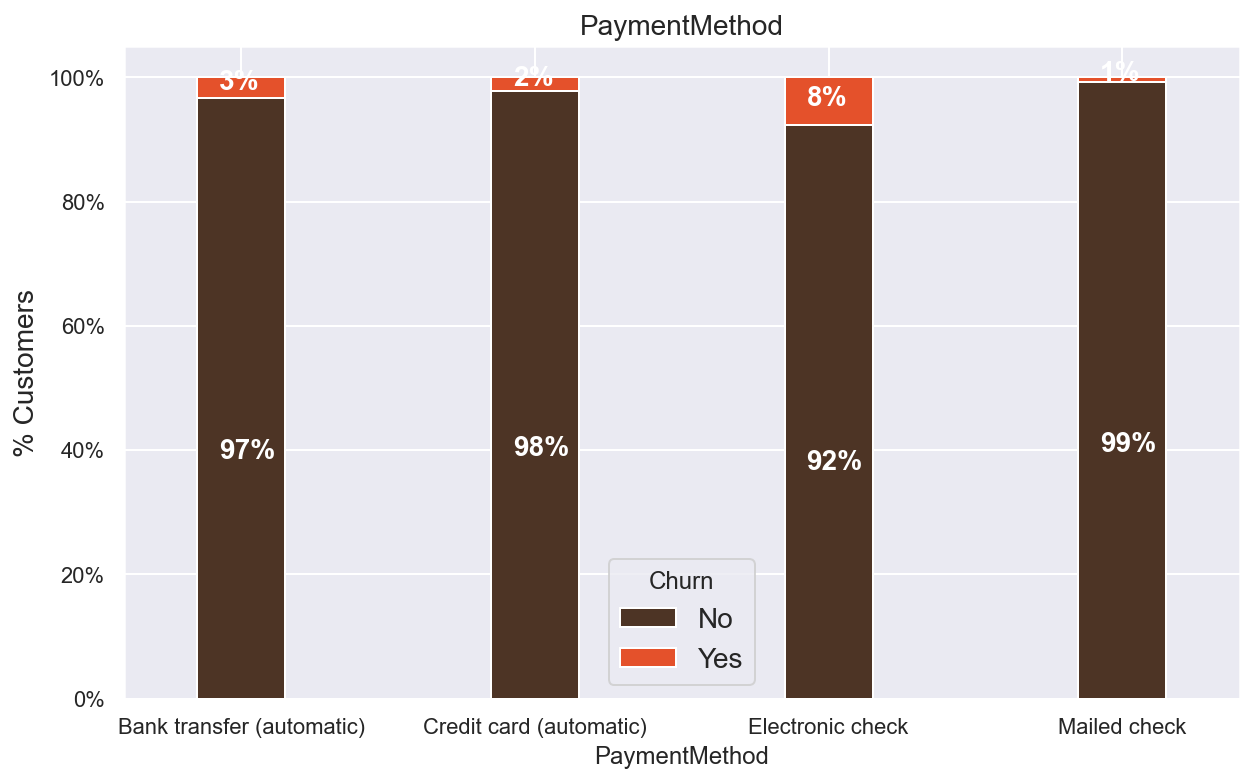

In [157]:
#Churn vs PaymentMethod
#chisq for PaymentMethod with churn
ctab5iv, chitest5iv, expected5iv = rp.crosstab(data5['PaymentMethod'],data5['Churn'],margins = False, test = "chi-square",expected_freqs= True)
print(ctab5iv)
print(chitest5iv)
print(expected5iv)


import matplotlib.ticker as mtick
colors = ['#4D3425','#E4512B']
contract_churn = data5.groupby(['PaymentMethod','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0, figsize = (10,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('PaymentMethod',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)
#There is siginificant association between PaymentMethod and churn


                     Churn    
Churn                   No Yes
customer_data.gender          
Female                 818  22
Male                   819  26
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    0.3191
1                    p-value =    0.5721
2               Cramer's phi =    0.0138
                           Churn           
Churn                         No        Yes
customer_data.gender                       
Female                816.071217  23.928783
Male                  820.928783  24.071217


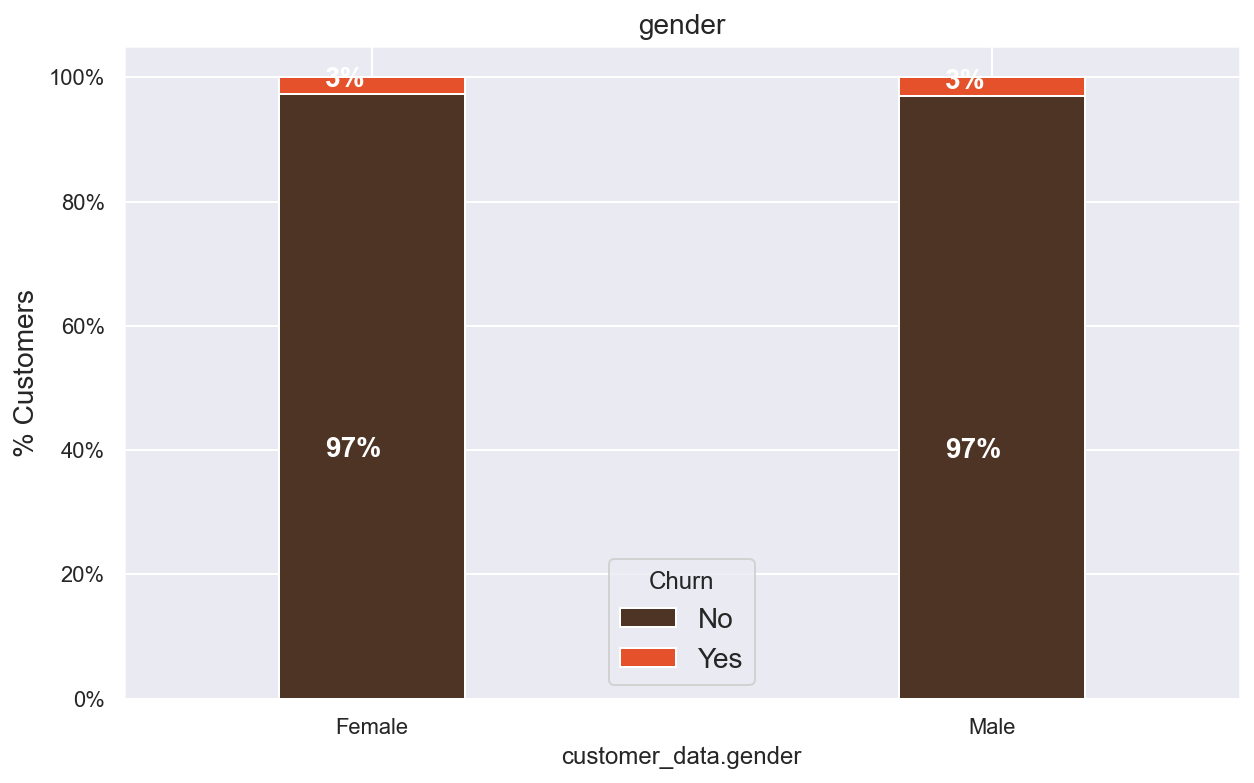

In [158]:
#Churn vs gender 
#chisq for gender with churn
ctab5v, chitest5v, expected5v = rp.crosstab(data5['customer_data.gender'],data5['Churn'],margins = False, test = "chi-square",expected_freqs= True)
print(ctab5v)
print(chitest5v)
print(expected5v)


import matplotlib.ticker as mtick
colors = ['#4D3425','#E4512B']
contract_churn = data5.groupby(['customer_data.gender','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0, figsize = (10,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('gender',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)
#There is no siginificant association between gender and churn


                      Churn    
Churn                    No Yes
customer_data.Partner          
No                      484  17
Yes                    1153  31
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    0.7640
1                    p-value =    0.3821
2               Cramer's phi =    0.0213
                            Churn          
Churn                          No       Yes
customer_data.Partner                      
No                      486.72819  14.27181
Yes                    1150.27181  33.72819


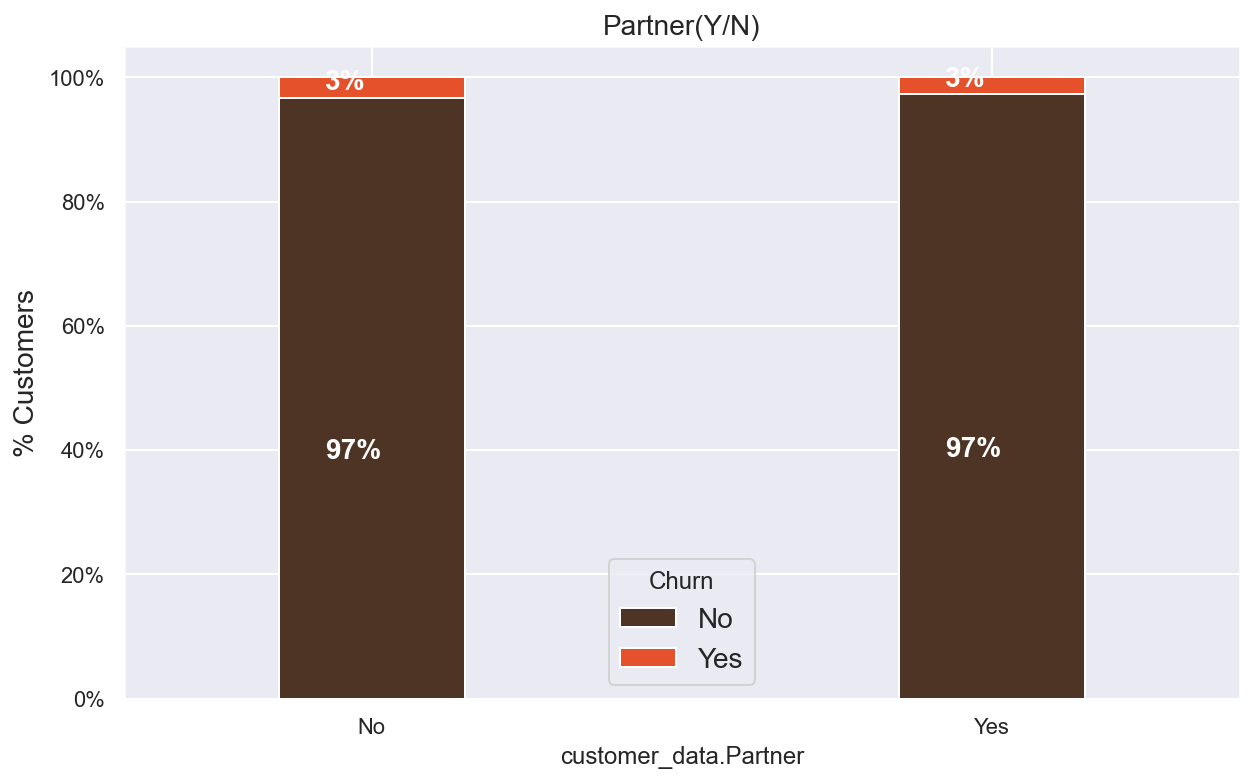

In [159]:
#Churn vs customer_data.Partner
#chisq for customer_data.Partner with churn
ctab5vi, chitest5vi, expected5vi = rp.crosstab(data5['customer_data.Partner'],data5['Churn'],margins = False, test = "chi-square",expected_freqs= True)
print(ctab5vi)
print(chitest5vi)
print(expected5vi)


import matplotlib.ticker as mtick
colors = ['#4D3425','#E4512B']
contract_churn = data5.groupby(['customer_data.Partner','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0, figsize = (10,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Partner(Y/N)',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)
#There is no siginificant association between Partner(Y/N) and churn


                         Churn    
Churn                       No Yes
customer_data.Dependents          
No                         875  30
Yes                        762  18
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    1.5357
1                    p-value =    0.2153
2               Cramer's phi =    0.0302
                               Churn           
Churn                             No        Yes
customer_data.Dependents                       
No                        879.219585  25.780415
Yes                       757.780415  22.219585


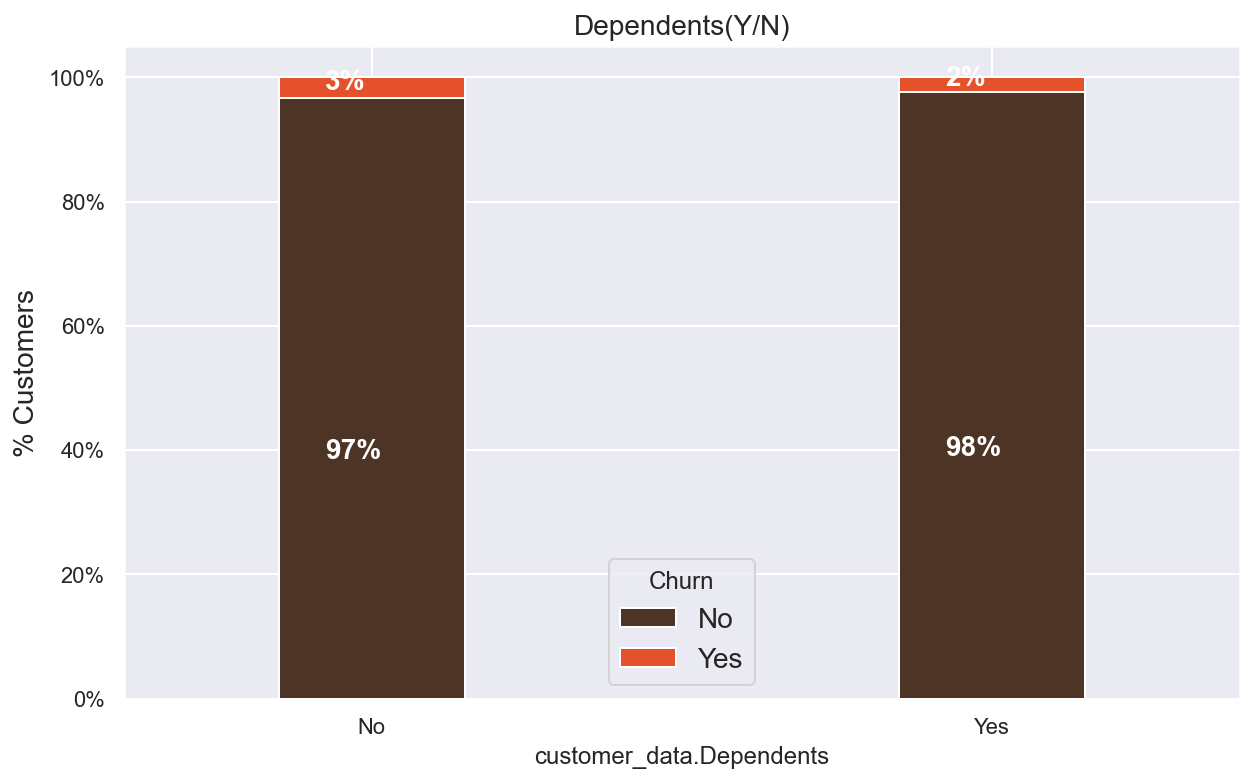

In [160]:
#customer_data.Dependents
#Churn vs customer_data.Dependents
#chisq for customer_data.Dependents with churn
ctab5vii, chitest5vii, expected5vii = rp.crosstab(data5['customer_data.Dependents'],data5['Churn'],margins = False, test = "chi-square",expected_freqs= True)
print(ctab5vii)
print(chitest5vii)
print(expected5vii)


import matplotlib.ticker as mtick
colors = ['#4D3425','#E4512B']
contract_churn = data5.groupby(['customer_data.Dependents','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0, figsize = (10,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Dependents(Y/N)',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)
#There is no siginificant association between Dependents(Y/N) and churn


                                Churn    
Churn                              No Yes
internet_data (2).MultipleLines          
No                                647  10
No phone service                  156   3
Yes                               834  35
                Chi-square test  results
0  Pearson Chi-square ( 2.0) =    9.0738
1                    p-value =    0.0107
2                 Cramer's V =    0.0734
                                      Churn           
Churn                                    No        Yes
internet_data (2).MultipleLines                       
No                               638.284273  18.715727
No phone service                 154.470623   4.529377
Yes                              844.245104  24.754896


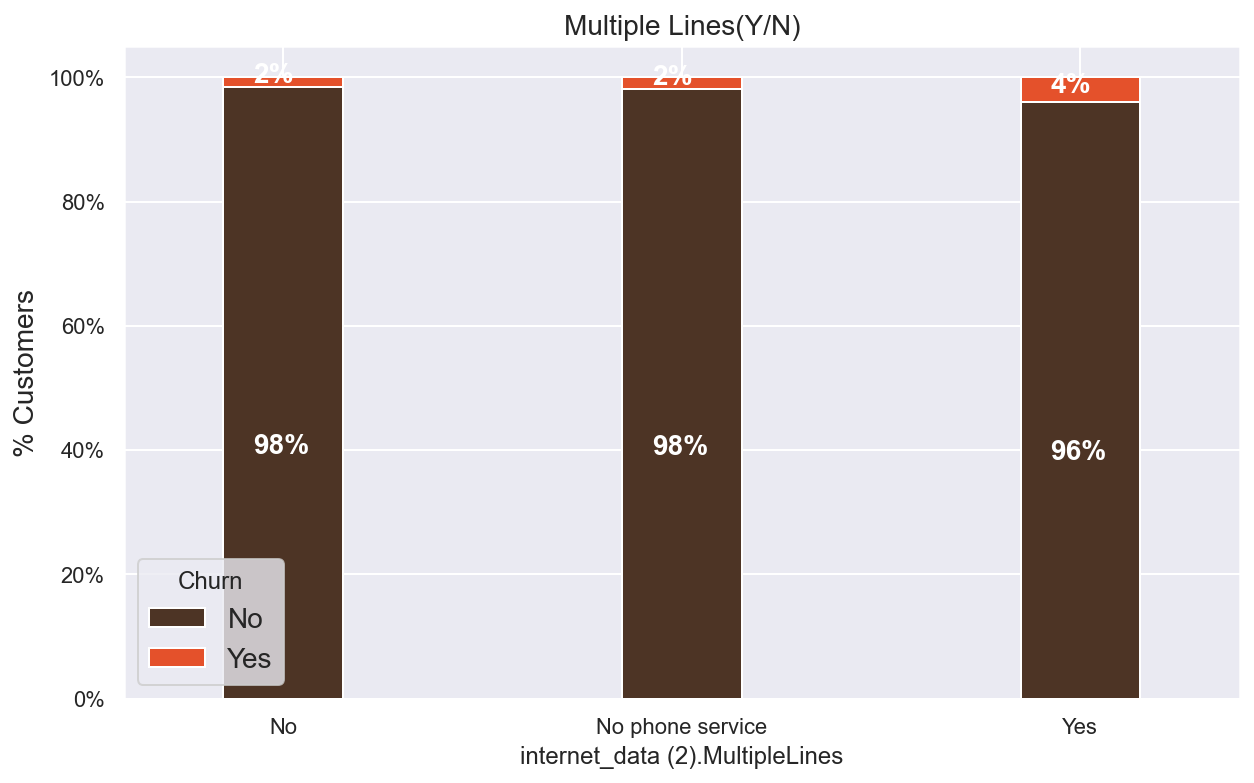

In [161]:
#internet_data (2).MultipleLines
#Churn vs internet_data (2).MultipleLines
#chisq for internet_data (2).MultipleLines with churn
ctab5viii, chitest5viii, expected5viii = rp.crosstab(data5['internet_data (2).MultipleLines'],data5['Churn'],margins = False, test = "chi-square",expected_freqs= True)
print(ctab5viii)
print(chitest5viii)
print(expected5viii)


import matplotlib.ticker as mtick
colors = ['#4D3425','#E4512B']
contract_churn = data5.groupby(['internet_data (2).MultipleLines','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0, figsize = (10,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Multiple Lines(Y/N)',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)
#There is siginificant association between Multiple Lines(Y/N) and churn


                                  Churn    
Churn                                No Yes
internet_data (2).InternetService          
DSL                                 611  12
Fiber optic                         398  31
No                                  628   5
                Chi-square test  results
0  Pearson Chi-square ( 2.0) =   41.3139
1                    p-value =    0.0000
2                 Cramer's V =    0.1566
                                        Churn           
Churn                                      No        Yes
internet_data (2).InternetService                       
DSL                                605.252819  17.747181
Fiber optic                        416.779228  12.220772
No                                 614.967953  18.032047


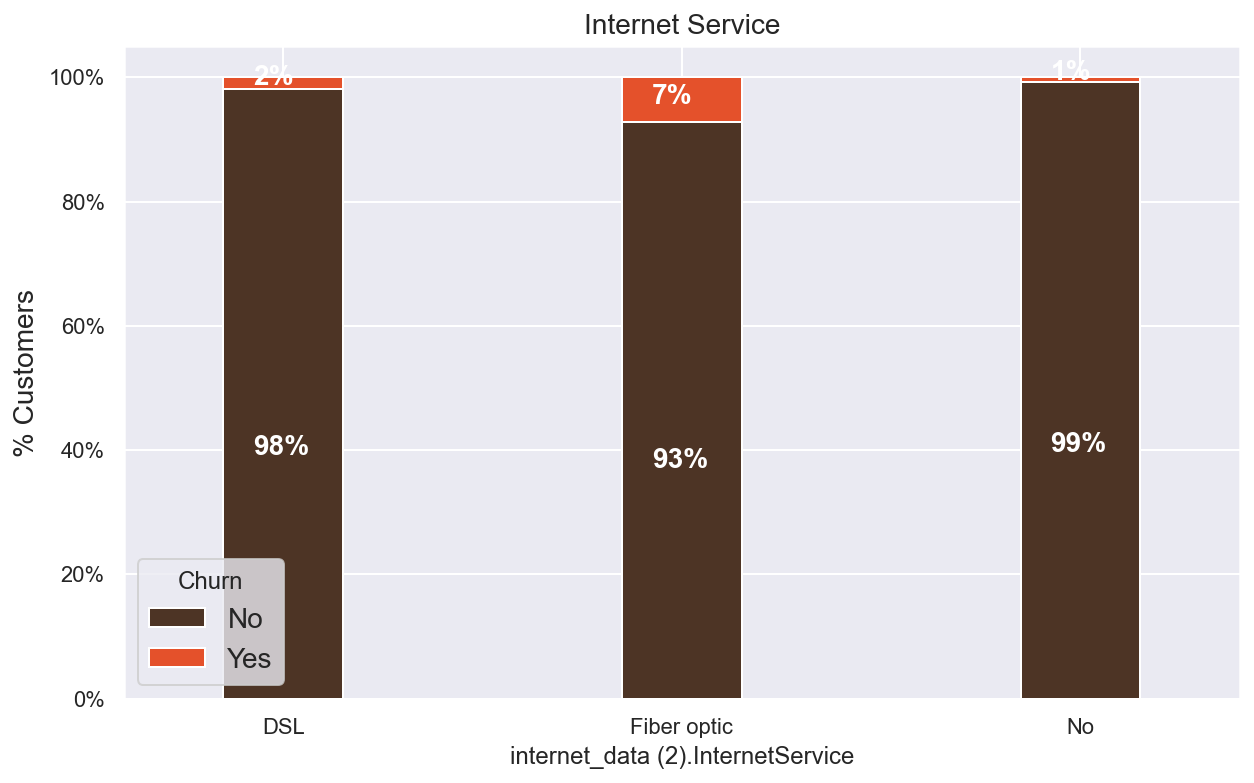

In [162]:
#internet_data (2).InternetService
#Churn vs internet_data (2).InternetService
#chisq for internet_data (2).InternetService
ctab5ix, chitest5ix, expected5ix = rp.crosstab(data5['internet_data (2).InternetService'],data5['Churn'],margins = False, test = "chi-square",expected_freqs= True)
print(ctab5ix)
print(chitest5ix)
print(expected5ix)


import matplotlib.ticker as mtick
colors = ['#4D3425','#E4512B']
contract_churn = data5.groupby(['internet_data (2).InternetService','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0, figsize = (10,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Internet Service',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)
#There is siginificant association between Internet Service and churn


In [163]:
##################################################### we have to segment data based on whether the user has internet service or not###################################

In [164]:
############ Not Having Internet service

In [165]:
#dataN = pd.read_excel(r"C:\Users\Heswanth Soor\Documents\Python Scripts\APAUR\telecom churn.xlsx", sheet_name= 'Final sheet')
#dataN = dataN[dataN['tenure']!=0]
#dataN = dataN[dataN['Contract']== 'Two year']
#data_no_int = dataN[dataN['internet_data (2).InternetService']=="No"]
#data_no_int = data_no_int.iloc[:,1:14]
#data_no_int = pd.get_dummies(data_no_int,columns=['PhoneService','PaperlessBilling','PaymentMethod','customer_data.gender','customer_data.Partner','customer_data.Dependents','internet_data (2).MultipleLines'],drop_first=True)
#data5 = pd.get_dummies(data5,columns=['PhoneService','Contract','PaperlessBilling','PaymentMethod','customer_data.gender','customer_data.SeniorCitizen','customer_data.Partner','customer_data.Dependents','internet_data (2).MultipleLines','internet_data (2).InternetService'],drop_first=True)
#data_no_int['Churn'].replace(to_replace='Yes', value=1, inplace=True)
#data_no_int['Churn'].replace(to_replace='No',  value=0, inplace=True)
#data_no_int.tail()


In [166]:
#remove totalcharges column
#data_no_int = data_no_int.drop(['TotalCharges','Contract'],axis=1)
#data_no_int.head()


In [167]:
#Defining variables for logistic regression
#X = pd.DataFrame(data_no_int[['tenure','MonthlyCharges','customer_data.SeniorCitizen','PaperlessBilling_Yes','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check','customer_data.gender_Male','customer_data.Partner_Yes','customer_data.Dependents_Yes','internet_data (2).MultipleLines_Yes']])
#y = pd.DataFrame(data_no_int[['Churn']])

#print(X.head())
#print(y.head())


In [168]:
#Model fitting
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
#from sklearn import metrics
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=307)
#logreg = LogisticRegression()
#logreg.fit(X_train, y_train)
#logreg.coef_

#y_pred = logreg.predict(X_test)
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


In [169]:
#print(y_train['Churn'].value_counts())
#print(y_test['Churn'].value_counts())


In [170]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix)

#Overfitting problem due to class imbalance in the dataset


In [171]:
#too low data and count/% churn is low

In [172]:
############ Having Internet service

In [173]:
dataN = pd.read_excel(r"C:\Users\Heswanth Soor\Documents\Python Scripts\APAUR\telecom churn.xlsx", sheet_name= 'Final sheet')
dataN = dataN[dataN['tenure']!=0]
dataN = dataN[dataN['Contract']== 'Two year']
data_yes_int = dataN[dataN['internet_data (2).InternetService']!="No"]
data_yes_int = data_yes_int.iloc[:,1:]
data_yes_int = pd.get_dummies(data_yes_int,columns=['PaperlessBilling','PaymentMethod','customer_data.gender','customer_data.Partner','customer_data.Dependents','internet_data (2).MultipleLines','internet_data (2).InternetService','internet_data (2).OnlineSecurity','internet_data (2).OnlineBackup','internet_data (2).DeviceProtection','internet_data (2).TechSupport','internet_data (2).StreamingTV','internet_data (2).StreamingMovies'],drop_first=True)
data_yes_int['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data_yes_int['Churn'].replace(to_replace='No',  value=0, inplace=True)
data_yes_int.head()


,tenure,PhoneService,Contract,MonthlyCharges,TotalCharges,Churn,customer_data.SeniorCitizen,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,customer_data.Dependents_Yes,internet_data (2).MultipleLines_No phone service,internet_data (2).MultipleLines_Yes,internet_data (2).InternetService_Fiber optic,internet_data (2).OnlineSecurity_Yes,internet_data (2).OnlineBackup_Yes,internet_data (2).DeviceProtection_Yes,internet_data (2).TechSupport_Yes,internet_data (2).StreamingTV_Yes,internet_data (2).StreamingMovies_Yes
746,2,Yes,Two year,59.50,130.50,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0
1050,3,Yes,Two year,71.10,213.35,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,1
1400,6,No,Two year,63.40,348.80,0,0,1,0,0,...,0,1,0,0,1,1,1,1,1,1
1430,6,No,Two year,40.55,217.50,0,0,0,0,0,...,1,1,0,0,0,1,1,1,0,0
1448,6,Yes,Two year,80.25,493.40,0,0,1,0,0,...,0,0,0,0,1,0,1,1,1,1


In [174]:
#remove totalcharges column
data_yes_int = data_yes_int.drop(['TotalCharges','PhoneService','Contract'],axis=1)
data_yes_int.head()


,tenure,MonthlyCharges,Churn,customer_data.SeniorCitizen,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customer_data.gender_Male,customer_data.Partner_Yes,customer_data.Dependents_Yes,internet_data (2).MultipleLines_No phone service,internet_data (2).MultipleLines_Yes,internet_data (2).InternetService_Fiber optic,internet_data (2).OnlineSecurity_Yes,internet_data (2).OnlineBackup_Yes,internet_data (2).DeviceProtection_Yes,internet_data (2).TechSupport_Yes,internet_data (2).StreamingTV_Yes,internet_data (2).StreamingMovies_Yes
746,2,59.50,0,0,0,0,0,1,1,1,1,0,0,0,1,1,0,1,0,0
1050,3,71.10,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1
1400,6,63.40,0,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,1,1
1430,6,40.55,0,0,0,0,0,1,0,1,1,1,0,0,0,1,1,1,0,0
1448,6,80.25,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,1,1,1


In [175]:
#Defining variables for logistic regression
X1 = pd.DataFrame(data_yes_int[['tenure','MonthlyCharges','customer_data.SeniorCitizen','PaperlessBilling_Yes','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check','customer_data.gender_Male','customer_data.Partner_Yes','customer_data.Dependents_Yes','internet_data (2).MultipleLines_No phone service','internet_data (2).MultipleLines_Yes','internet_data (2).InternetService_Fiber optic','internet_data (2).OnlineSecurity_Yes','internet_data (2).OnlineBackup_Yes','internet_data (2).DeviceProtection_Yes','internet_data (2).TechSupport_Yes','internet_data (2).StreamingTV_Yes','internet_data (2).StreamingMovies_Yes']])
y1 = pd.DataFrame(data_yes_int[['Churn']])

print(X1.head())
print(y1.head())


      tenure  MonthlyCharges  customer_data.SeniorCitizen  \
746        2           59.50                            0   
1050       3           71.10                            0   
1400       6           63.40                            0   
1430       6           40.55                            0   
1448       6           80.25                            0   

      PaperlessBilling_Yes  PaymentMethod_Credit card (automatic)  \
746                      0                                      0   
1050                     0                                      0   
1400                     1                                      0   
1430                     0                                      0   
1448                     1                                      0   

      PaymentMethod_Electronic check  PaymentMethod_Mailed check  \
746                                0                           1   
1050                               0                           1   
1400          

In [176]:
#Model fitting
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X1_train, y1_train)
logreg.coef_

y1_pred = logreg.predict(X1_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X1_test, y1_test)))


Accuracy of logistic regression classifier on test set: 0.96


C:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [177]:
print(y1_train['Churn'].value_counts())
print(y1_test['Churn'].value_counts())


0    707
1     29
Name: Churn, dtype: int64
0    302
1     14
Name: Churn, dtype: int64


In [178]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y1_test, y1_pred)
print(confusion_matrix)


[[302   0]
 [ 14   0]]


In [179]:
#Doing Oversampling technique (SMOTE) for oversampling the data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 307)
X1_train_new,y1_train_new = sm.fit_resample(X1_train,y1_train)


In [180]:
logreg.fit(X1_train_new, y1_train_new)
y1_pred = logreg.predict(X1_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X1_test, y1_test)))


Accuracy of logistic regression classifier on test set: 0.84


C:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[265  37]
 [ 13   1]]
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       302
           1       0.03      0.07      0.04        14

    accuracy                           0.84       316
   macro avg       0.49      0.47      0.48       316
weighted avg       0.91      0.84      0.88       316



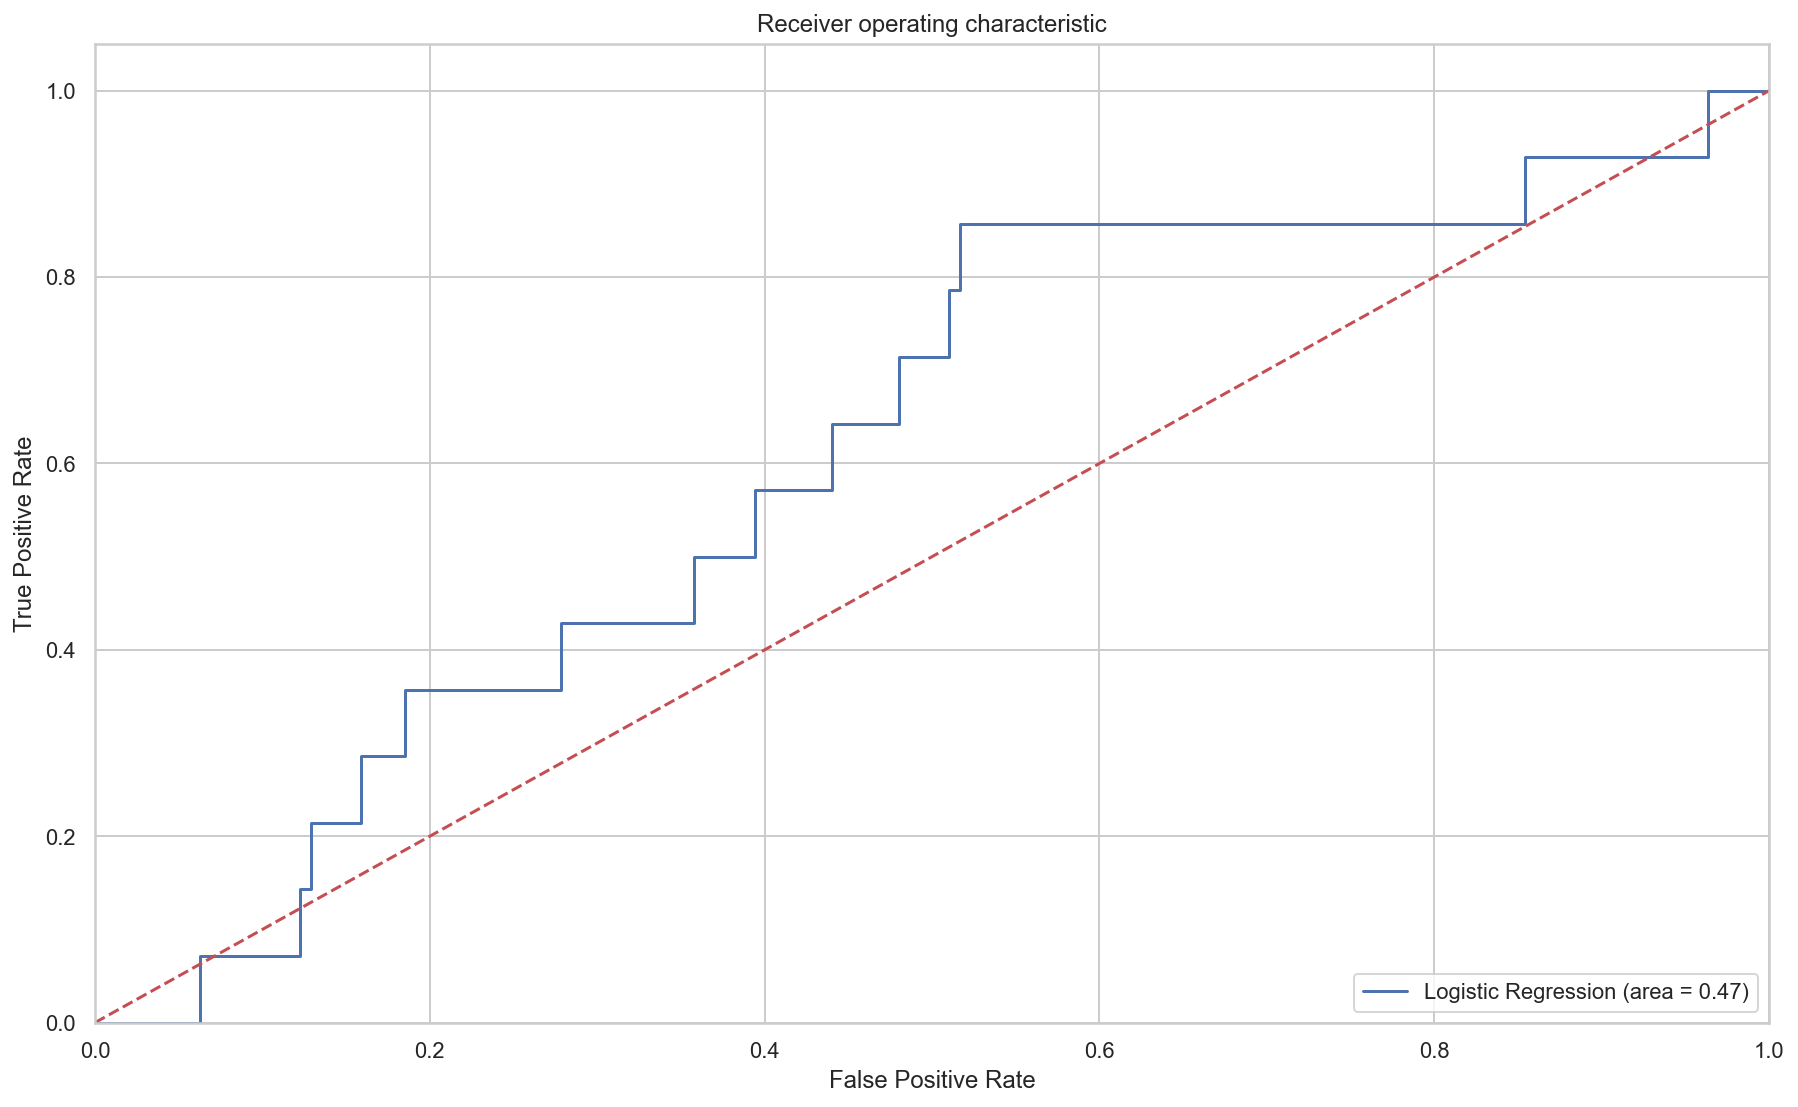

In [181]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y1_test, y1_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y1_test, y1_pred))
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y1_test, logreg.predict(X1_test))
fpr, tpr, thresholds = roc_curve(y1_test, logreg.predict_proba(X1_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [182]:
#Regression Model Output
import numpy as np
import statsmodels.api as sm

X1 = sm.add_constant(X1)

model = sm.Logit(y1, X1)
result = model.fit(method='newton')
result.summary()


Optimization terminated successfully.
         Current function value: 0.154282
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 1052
Model:                          Logit   Df Residuals:                     1032
Method:                           MLE   Df Model:                           19
Date:                Thu, 22 Dec 2022   Pseudo R-squ.:                 0.09625
Time:                        05:37:48   Log-Likelihood:                -162.31
converged:                       True   LL-Null:                       -179.59
Covariance Type:            nonrobust   LLR p-value:                   0.01572
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                2.9842      5.570      0.536      0.592      -7.932      13.901
tenure                                               0.0010      0.016      0.063      0.950      -0.031       0.033
MonthlyCharges                                      -0.1392      0.122     -1.138      0.255      -0.379       0.100
customer_data.SeniorCitizen                          0.0457      0.476      0.096      0.924      -0.887       0.978
PaperlessBilling_Yes                                 0.2745      0.364      0.754      0.451      -0.439       0.988
PaymentMethod_Credit card (automatic)               -0.4548      0.397     -1.144      0.252      -1.234       0.324
PaymentMethod_Electronic check                       0.3228      0.397      0.814      0.416      -0.454       1.100
PaymentMethod_Mailed check                          -1.3600      1.062     -1.280      0.200      -3.442       0.722
customer_data.gender_Male                            0.0633      0.321      0.197      0.844      -0.566       0.692
customer_data.Partner_Yes                           -0.2543      0.391     -0.651      0.515      -1.020       0.511
customer_data.Dependents_Yes                         0.0833      0.373      0.223      0.823      -0.648       0.814
internet_data (2).MultipleLines_No phone service    -2.7218      2.578     -1.056      0.291      -7.774       2.331
internet_data (2).MultipleLines_Yes                  0.9114      0.749      1.217      0.224      -0.556       2.379
internet_data (2).InternetService_Fiber optic        4.4253      3.063      1.445      0.148      -1.577      10.428
internet_data (2).OnlineSecurity_Yes                 0.2044      0.696      0.294      0.769      -1.161       1.569
internet_data (2).OnlineBackup_Yes                   0.1912      0.683      0.280      0.779      -1.146       1.529
internet_data (2).DeviceProtection_Yes               0.7537      0.772      0.976      0.329      -0.759       2.267
internet_data (2).TechSupport_Yes                    0.4945      0.714      0.692      0.489      -0.905       1.894
internet_data (2).StreamingTV_Yes                    1.7575      1.290      1.362      0.173      -0.772       4.287
internet_data (2).StreamingMovies_Yes                1.2480      1.303      0.957      0.338      -1.307       3.803
====================================================================================================================
"""

In [183]:
def stepwise_selection(X1, y1,SL_in=0.05,SL_out = 0.05):
    initial_features = X1.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.Logit(y1, X1[best_features+[new_column]]).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = X1[best_features]
                p_values = sm.Logit(y1, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

stepwise_selection(X1,y1)


Optimization terminated successfully.
         Current function value: 0.636343
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.392841
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.312607
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273936
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.602531
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.290465
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.334445
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.516287
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.321317
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.407122
  

<ipython-input-183-2452c1fe0cde>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-183-2452c1fe0cde>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-183-2452c1fe0cde>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Optimization terminated successfully.
         Current function value: 0.170414
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.170654
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.170594
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.167968
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.170501
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.162151
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.160187
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.162072
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.161020
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.161593
  

<ipython-input-183-2452c1fe0cde>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


['const',
 'internet_data (2).InternetService_Fiber optic',
 'PaymentMethod_Electronic check']

In [184]:
#Refitting
#Defining variables for logistic regression
X1 = pd.DataFrame(data_yes_int[['PaymentMethod_Electronic check','internet_data (2).InternetService_Fiber optic']])
y1 = pd.DataFrame(data_yes_int[['Churn']])

print(X1.head())
print(y1.head())


      PaymentMethod_Electronic check  \
746                                0   
1050                               0   
1400                               0   
1430                               0   
1448                               0   

      internet_data (2).InternetService_Fiber optic  
746                                               0  
1050                                              0  
1400                                              0  
1430                                              0  
1448                                              0  
      Churn
746       0
1050      0
1400      0
1430      0
1448      0


In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X1_train, y1_train)
logreg.coef_

y1_pred = logreg.predict(X1_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X1_test, y1_test)))


Accuracy of logistic regression classifier on test set: 0.96


C:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [186]:
print(y1_train['Churn'].value_counts())
print(y1_test['Churn'].value_counts())


0    707
1     29
Name: Churn, dtype: int64
0    302
1     14
Name: Churn, dtype: int64


In [187]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y1_test, y1_pred)
print(confusion_matrix)


[[302   0]
 [ 14   0]]


In [188]:
#Doing Oversampling technique (SMOTE) for oversampling the data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 307)
X1_train_new,y1_train_new = sm.fit_resample(X1_train,y1_train)


In [189]:
logreg.fit(X1_train_new, y1_train_new)
y1_pred = logreg.predict(X1_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X1_test, y1_test)))


Accuracy of logistic regression classifier on test set: 0.61


C:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[182 120]
 [  4  10]]
              precision    recall  f1-score   support

           0       0.98      0.60      0.75       302
           1       0.08      0.71      0.14        14

    accuracy                           0.61       316
   macro avg       0.53      0.66      0.44       316
weighted avg       0.94      0.61      0.72       316



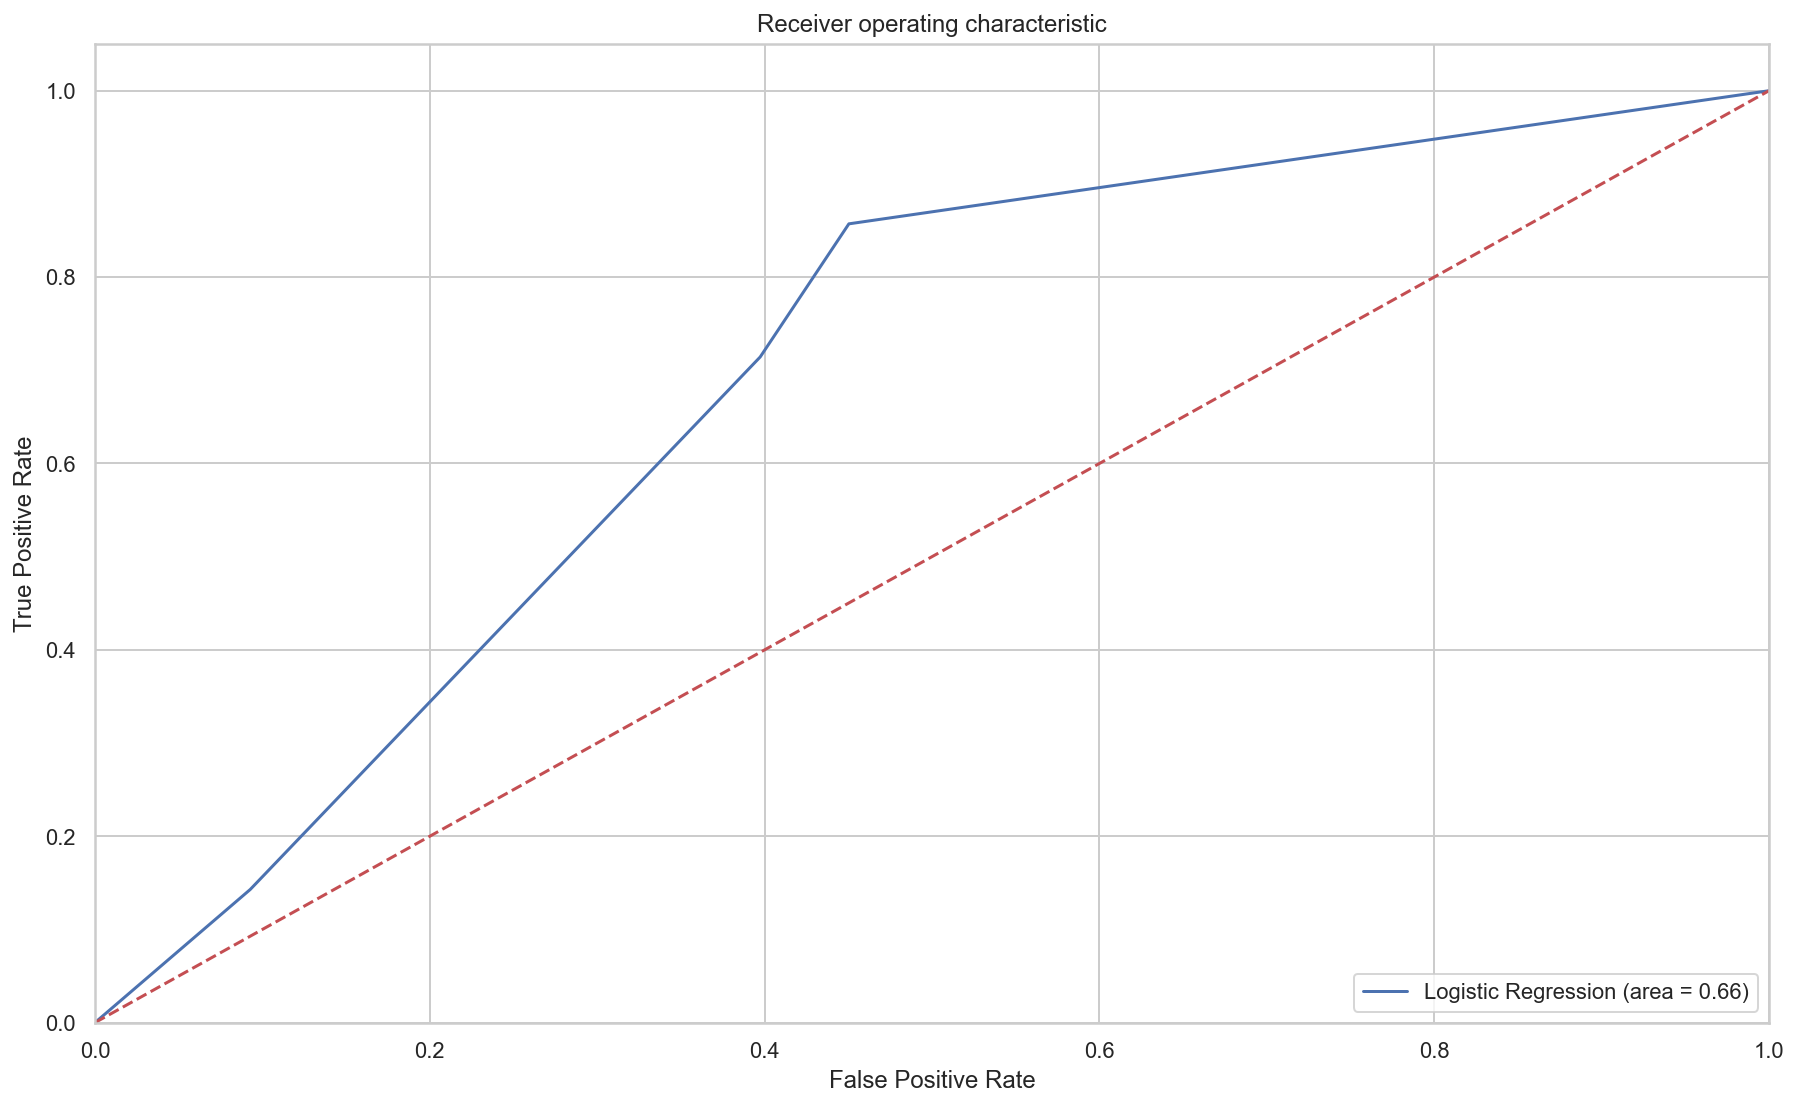

In [190]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y1_test, y1_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y1_test, y1_pred))
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y1_test, logreg.predict(X1_test))
fpr, tpr, thresholds = roc_curve(y1_test, logreg.predict_proba(X1_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [191]:
#Regression Model Output
import numpy as np
import statsmodels.api as sm

X1 = sm.add_constant(X1)

model = sm.Logit(y1, X1)
result = model.fit(method='newton')
result.summary()


Optimization terminated successfully.
         Current function value: 0.160187
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 1052
Model:                          Logit   Df Residuals:                     1049
Method:                           MLE   Df Model:                            2
Date:                Thu, 22 Dec 2022   Pseudo R-squ.:                 0.06166
Time:                        05:37:49   Log-Likelihood:                -168.52
converged:                       True   LL-Null:                       -179.59
Covariance Type:            nonrobust   LLR p-value:                 1.550e-05
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -4.0274      0.298    -13.514      0.000      -4.612      -3.443
PaymentMethod_Electronic check                    0.7497      0.352      2.127      0.033       0.059       1.441
internet_data (2).InternetService_Fiber optic     1.2700      0.351      3.614      0.000       0.581       1.959
=================================================================================================================
"""

In [192]:
#Consolidating customers who doesnot have an internet service

In [193]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)
data5 = pd.read_excel(r"C:\Users\Heswanth Soor\Documents\Python Scripts\APAUR\telecom churn.xlsx", sheet_name= 'Final sheet')
data5 = data5[data5['tenure']!=0]
data_no_int = data5[data5['internet_data (2).InternetService']== 'No']
data_no_int = data_no_int.iloc[:,1:14]
data_no_int.head()


,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customer_data.gender,customer_data.SeniorCitizen,customer_data.Partner,customer_data.Dependents,internet_data (2).MultipleLines
13,1,Yes,Month-to-month,No,Mailed check,20.15,20.15,Yes,Male,0,No,No,No
15,1,Yes,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No,Male,0,No,No,No
20,1,Yes,Month-to-month,No,Mailed check,20.20,20.20,No,Male,0,No,No,No
21,1,Yes,Month-to-month,No,Electronic check,19.45,19.45,No,Female,0,Yes,Yes,No
22,1,Yes,Month-to-month,No,Mailed check,19.75,19.75,No,Male,0,No,No,No


In [194]:
data_no_int.shape[0]

1520

No     92.565789
Yes     7.434211
Name: Churn, dtype: float64


<AxesSubplot:>

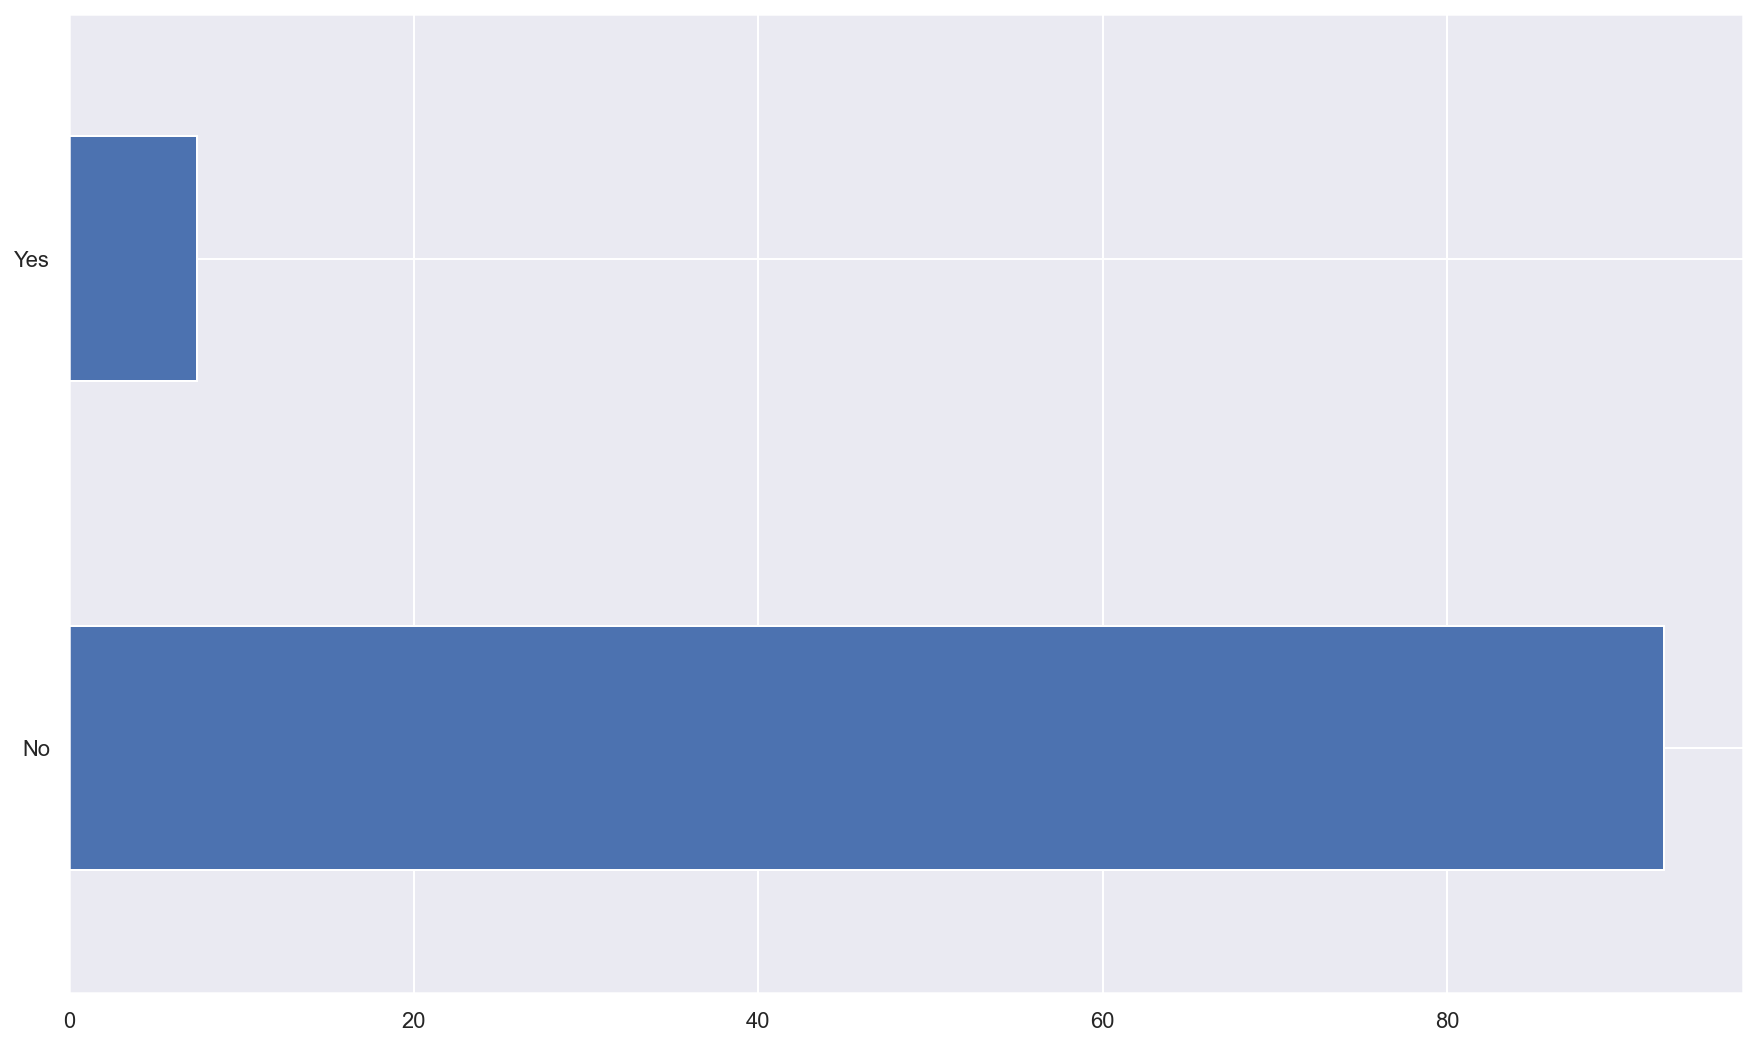

In [195]:
churncol = data_no_int['Churn'].value_counts(normalize = True)*100
print(churncol)
churncol.plot(kind = 'barh',)


In [196]:
data_no_int = pd.get_dummies(data_no_int,columns=['Contract','PhoneService','PaperlessBilling','PaymentMethod','customer_data.gender','customer_data.Partner','customer_data.Dependents','internet_data (2).MultipleLines'],drop_first=True)
#data5 = pd.get_dummies(data5,columns=['PhoneService','Contract','PaperlessBilling','PaymentMethod','customer_data.gender','customer_data.SeniorCitizen','customer_data.Partner','customer_data.Dependents','internet_data (2).MultipleLines','internet_data (2).InternetService'],drop_first=True)
data_no_int['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data_no_int['Churn'].replace(to_replace='No',  value=0, inplace=True)
data_no_int.tail()


,tenure,MonthlyCharges,TotalCharges,Churn,customer_data.SeniorCitizen,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customer_data.gender_Male,customer_data.Partner_Yes,customer_data.Dependents_Yes,internet_data (2).MultipleLines_Yes
7027,72,25.75,1864.20,0,0,0,1,0,1,0,0,1,1,0,1
7030,72,19.75,1567.00,0,0,0,1,1,0,0,1,0,0,1,0
7033,72,25.85,1872.20,0,0,0,1,0,1,0,0,1,1,0,1
7034,72,25.20,1787.35,0,0,0,1,0,0,0,0,0,1,1,1
7041,72,21.15,1419.40,0,0,0,1,1,0,0,0,0,0,0,0


In [197]:
#remove totalcharges column
data_no_int = data_no_int.drop(['TotalCharges'],axis=1)
data_no_int.head()


,tenure,MonthlyCharges,Churn,customer_data.SeniorCitizen,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customer_data.gender_Male,customer_data.Partner_Yes,customer_data.Dependents_Yes,internet_data (2).MultipleLines_Yes
13,1,20.15,1,0,0,0,0,0,0,1,1,0,0,0
15,1,20.20,0,0,0,0,0,0,0,0,1,0,0,0
20,1,20.20,0,0,0,0,0,0,0,1,1,0,0,0
21,1,19.45,0,0,0,0,0,0,1,0,0,1,1,0
22,1,19.75,0,0,0,0,0,0,0,1,1,0,0,0


In [198]:
#Defining variables for logistic regression
X = pd.DataFrame(data_no_int[['tenure','Contract_One year','Contract_Two year']])
y = pd.DataFrame(data_no_int[['Churn']])


print(X.head())
print(y.head())


    tenure  Contract_One year  Contract_Two year
13       1                  0                  0
15       1                  0                  0
20       1                  0                  0
21       1                  0                  0
22       1                  0                  0
    Churn
13      1
15      0
20      0
21      0
22      0


In [199]:
#Model fitting
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=307)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.coef_

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.93


C:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [200]:
print(y_train['Churn'].value_counts())
print(y_test['Churn'].value_counts())


0    984
1     80
Name: Churn, dtype: int64
0    423
1     33
Name: Churn, dtype: int64


In [201]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[423   0]
 [ 33   0]]


In [202]:
#Doing Oversampling technique (SMOTE) for oversampling the data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 307)
X_train_new,y_train_new = sm.fit_resample(X_train,y_train)


In [203]:
logreg.fit(X_train_new, y_train_new)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.71


C:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [204]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[295 128]
 [  4  29]]


In [205]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.70      0.82       423
           1       0.18      0.88      0.31        33

    accuracy                           0.71       456
   macro avg       0.59      0.79      0.56       456
weighted avg       0.93      0.71      0.78       456



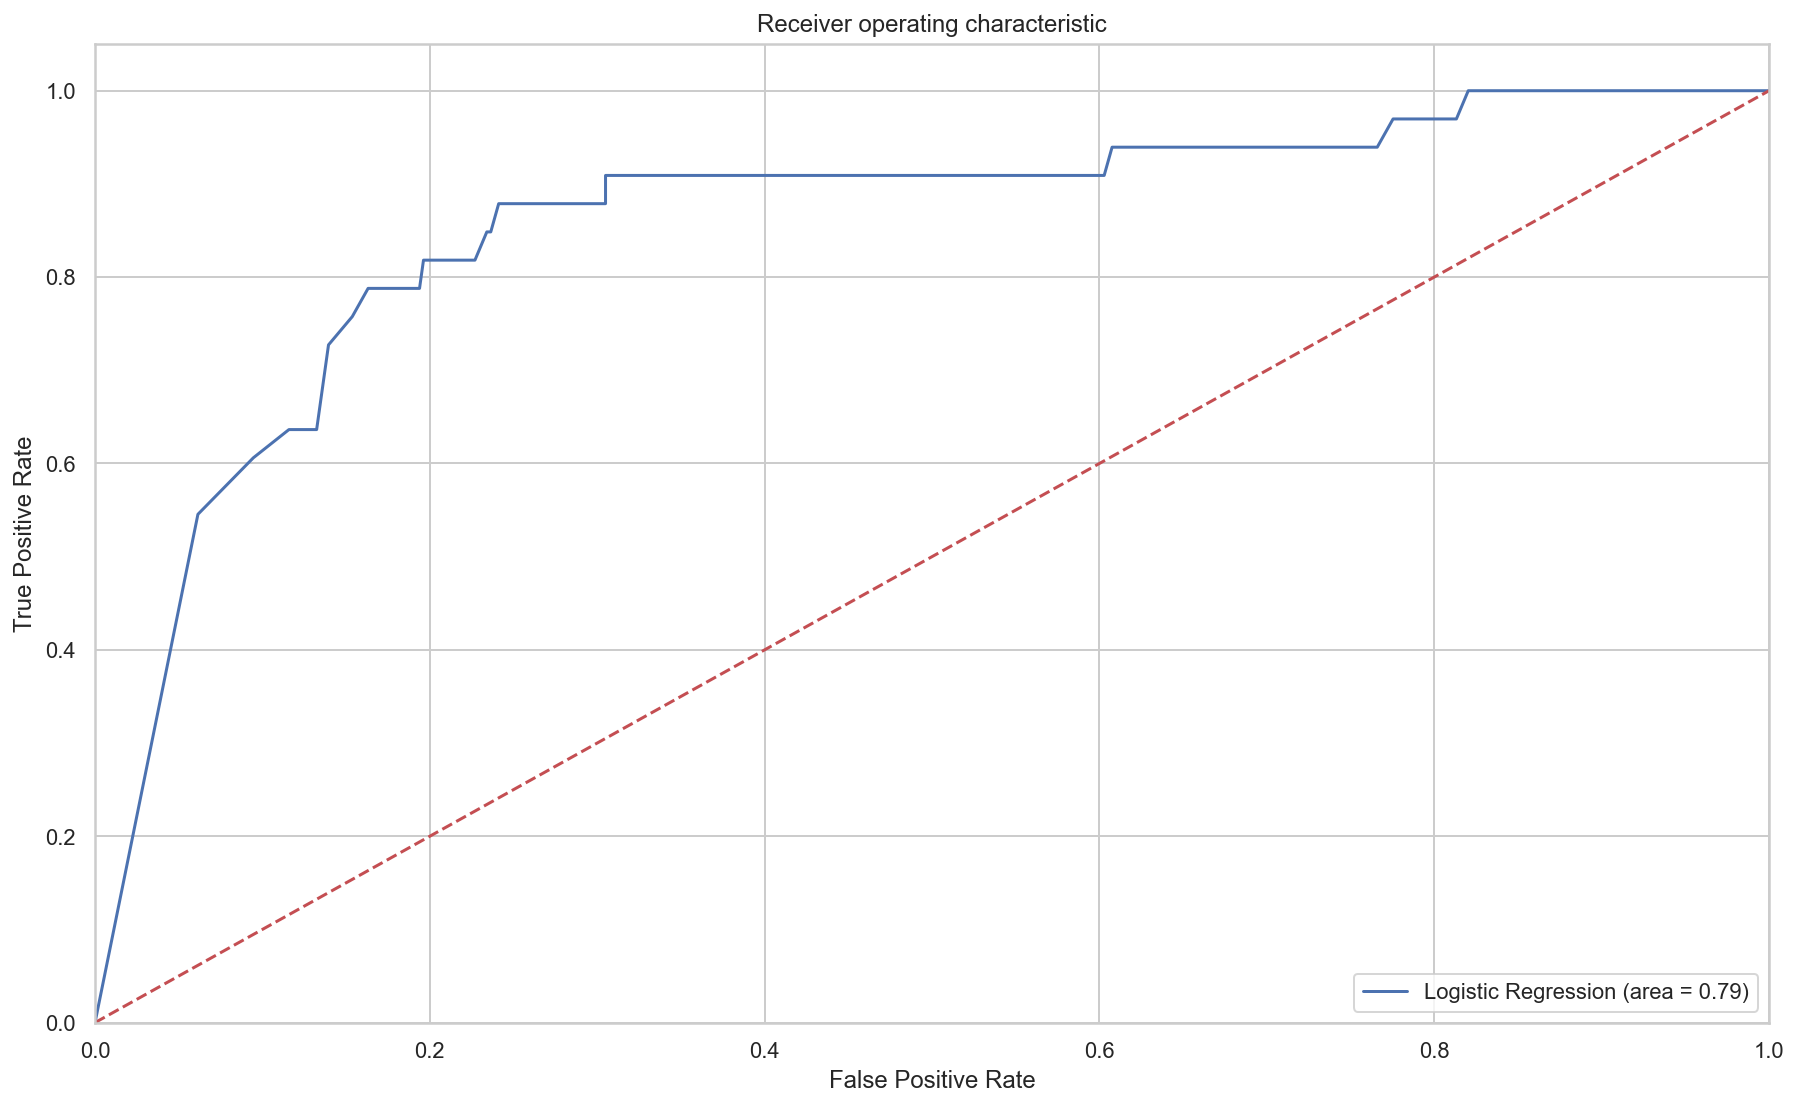

In [206]:
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [207]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
y_pred1 = model.predict(X_test)
metrics.accuracy_score(y_test, y_pred1)


C:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9276315789473685

In [208]:
#Regression Model Output
#import numpy as np
import statsmodels.api as sm

X = sm.add_constant(X)

model = sm.Logit(y, X)
result = model.fit(method='newton')
result.summary()


Optimization terminated successfully.
         Current function value: 0.207781
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 1520
Model:                          Logit   Df Residuals:                     1516
Method:                           MLE   Df Model:                            3
Date:                Thu, 22 Dec 2022   Pseudo R-squ.:                  0.2151
Time:                        05:37:53   Log-Likelihood:                -315.83
converged:                       True   LL-Null:                       -402.39
Covariance Type:            nonrobust   LLR p-value:                 2.699e-37
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.1282      0.133     -8.506      0.000      -1.388      -0.868
tenure               -0.0422      0.011     -3.983      0.000      -0.063      -0.021
Contract_One year    -1.5399      0.380     -4.050      0.000      -2.285      -0.795
Contract_Two year    -2.0340      0.527     -3.860      0.000      -3.067      -1.001
=====================================================================================
"""